OPERATING SYSTEMS REPORT: STUDENT ID 252719

                                               Experiment Setup Procedure

To facilitate the execution of all experiments seamlessly, the utilization of the run.sh bash script is imperative. This script orchestrates the entire experimental process with precision and efficiency. Executing bash run.sh > run.log initiates a meticulously organized sequence of events, meticulously crafted to streamline experimentation.

In [184]:
!pip install pickleshare

%cd /Users/rafiksongoku/Desktop/os-coursework1/src
!chmod +x run.sh
!./run.sh > run.log 2>&1



/Users/rafiksongoku/Desktop/os-coursework1/src



Upon execution, a dedicated directory is dynamically generated for each experiment, denoted as experiment<number>. Within this directory, 
an intricate ecosystem is structured, comprising three distinct subdirectories:

1- input_files: This repository houses the essential input data (input_seed_<seed>) requisite for each experiment.

2- input_parameters: Crucial parameters (input_parameters_<seed>) vital for the experimentation process are meticulously organized within this repository.

3- schedulers: Comprehensive output files, meticulously curated from each scheduler, are nested under schedulers/<scheduler>, 
                ensuring meticulous segregation and organization.

4- simulator_parameters: Under this directory, output files from the experiment from each scheduler are diligently cataloged under
                         simulator_parameters/<scheduler>_simulator_parameters.prp, providing a structured and comprehensive overview.

Throughout the subsequent experiments, a bespoke Experiment class, meticulously crafted and defined within experiment.py, is meticulously leveraged. 
This bespoke class serves as the cornerstone, orchestrating the seamless execution and encapsulating the essence of each experimentation endeavor.

Introduction

This experiment aims to ascertain the most effective scheduling algorithm for minimizing average waiting time. The Multilevel Feedback Queue with Round Robin algorithm is hypothesized to excel in this regard due to its preemptive nature, allowing for context switching from longer processes upon exceeding the time quantum. Conversely, it is anticipated that Shortest Job First with Exponential Averaging will exhibit poorer performance compared to other algorithms owing to its non-preemptive nature.


Methodology

To evaluate the average waiting time across different scheduling algorithms, the experiment will be conducted using the run.sh script. This script facilitates the execution of the experiment for each scheduling algorithm, utilizing five distinct seeds to ensure stability in the average waiting time measurements. Inputs generated by the script are stored in /experiment1/input_files, while the simulator parameters are saved in /experiment1/simulator_parameters/. Outputs are stored in /experiment1/scheduler_outpus/[scheduler], with the only parameter variation being the scheduling algorithm employed.

Subsequently, the average waiting time will be calculated across all five seeds for each scheduling algorithm. By comparing the average waiting times for each algorithm, the most efficient scheduling algorithm in terms of minimizing waiting time will be determined.

In [186]:
%pwd

'/Users/rafiksongoku/Desktop/os-coursework1/src'

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

# Adding the path of the experiment.py file to the system path
# Assuming the notebook is in the src directory, and experiment.py is in the src/main/java directory
sys.path.append('main/java')

from experiment import Experiment

# Initialize the Experiment with the relative path to the experiment1 directory
# Assuming experiment1 is directly under the src directory
exp1 = Experiment('../experiment1')  # Going one level up from src/main/java to src, then to experiment1

# Print all the seeds used in Experiment 1
print(f"All the Seeds Used in Experiment 1: {exp1.all_seeds()}")


All the Seeds Used in Experiment 1: ['150', '50', '100', '200', '565']


In [190]:
exp1.input_parameters_seed[1][1]


value
param                   
numberOfProcesses     50
staticPriority         0
meanInterArrival      12
meanCpuBurst          10
meanIoBurst           10
meanNumberBursts       6
seed                  50

In [192]:
print("Simulation parameters of experiment: (note scheduler is missing,as it will be changing)")
exp1.simulator_parameters[0].drop(['scheduler'])

Simulation parameters of experiment: (note scheduler is missing,as it will be changing)


value
param                       
timeLimit             100000
interruptTime              1
timeQuantum                5
initialBurstEstimate       5
alphaBurstEstimate       0.5
periodic               false

NOTE: 
As evident from the description, an interrupt time of 1 unit and a time quantum of 5 units are utilized. These specific values are deliberately selected to induce context switches for processes employing Round Robin (RR) and Feedback Round Robin (FRR). By enforcing context switches within the defined time quantum, the algorithms are prevented from continuously running for the entire quantum duration. The chosen ratio of 1:5 is strategically employed to mitigate excessive system overhead, thereby ensuring a balanced and fair comparison between the scheduling algorithms.

RESULTS: 

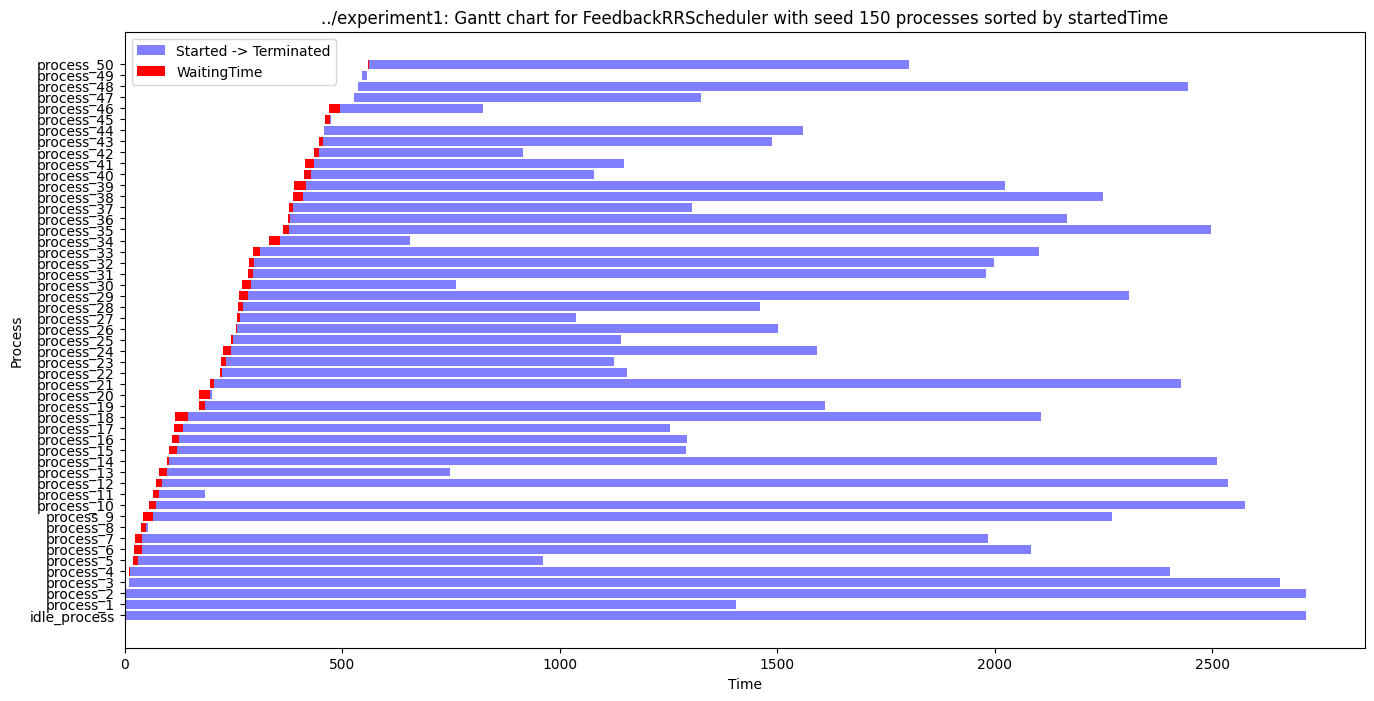

In [194]:
## Plotting and Comparing Gantt Charts for Different Schedulers 
exp1.plot_gantt('FeedbackRRScheduler', '150')

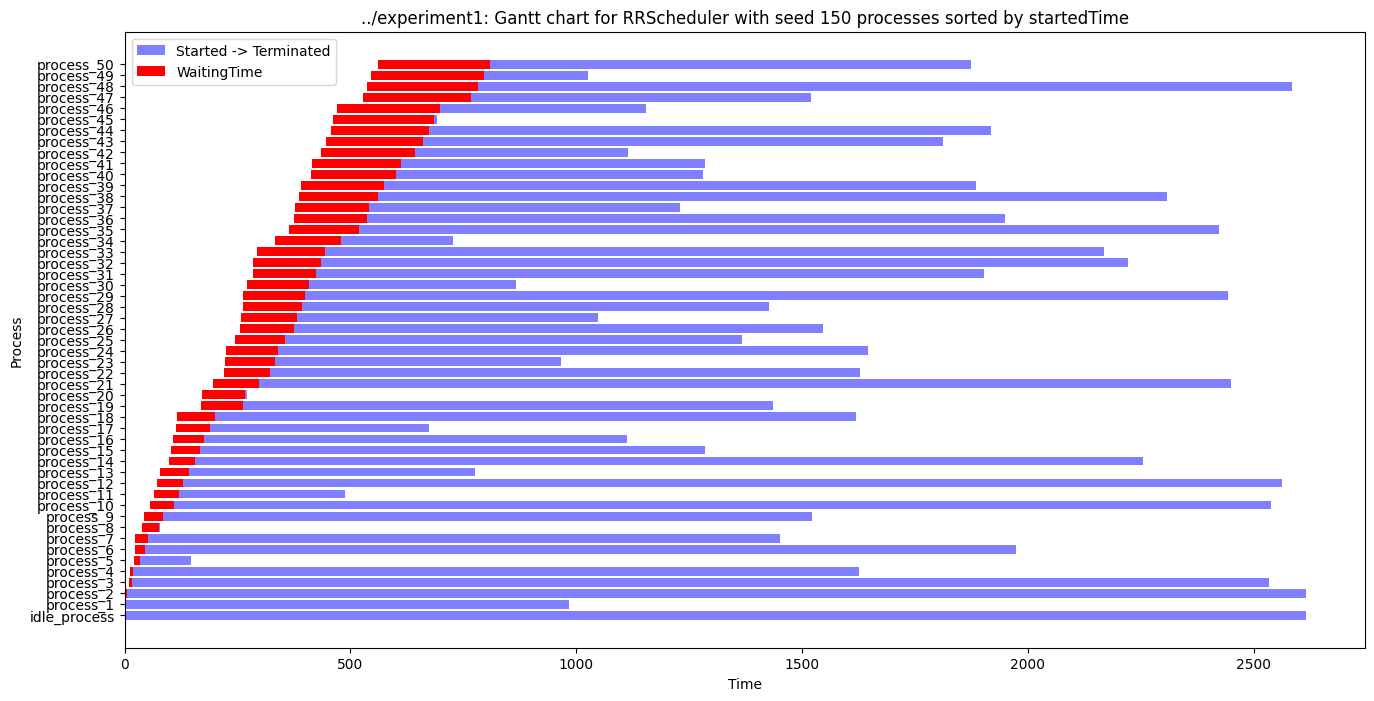

In [196]:
exp1.plot_gantt('RRScheduler', '150')

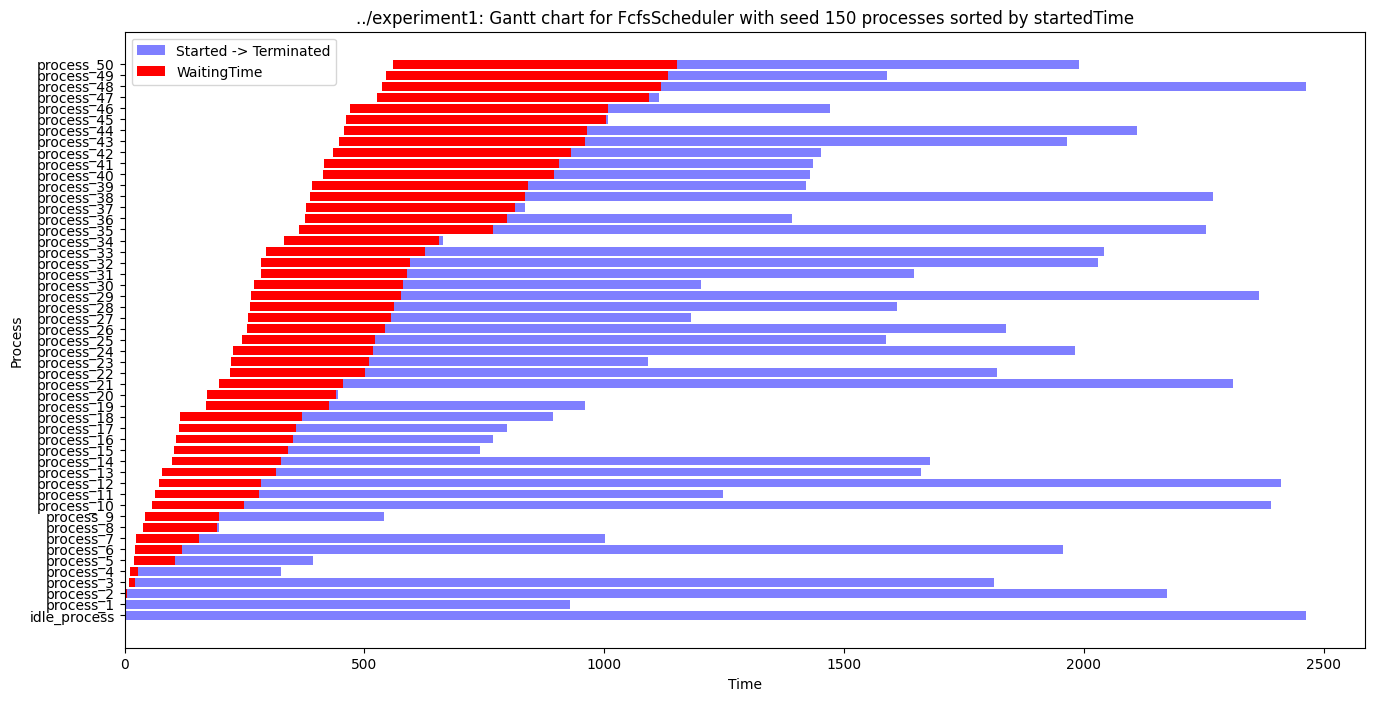

In [198]:
exp1.plot_gantt('FcfsScheduler', '150')

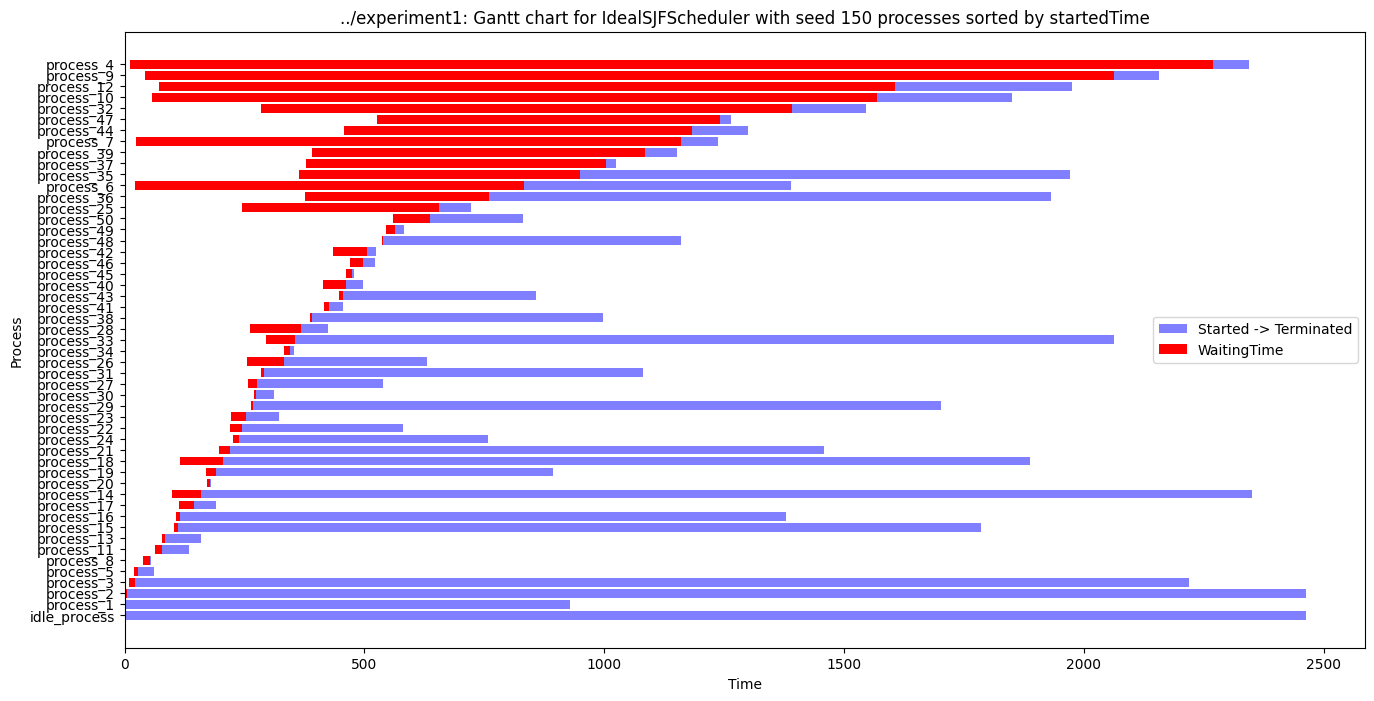

In [200]:
exp1.plot_gantt('IdealSJFScheduler', '150')

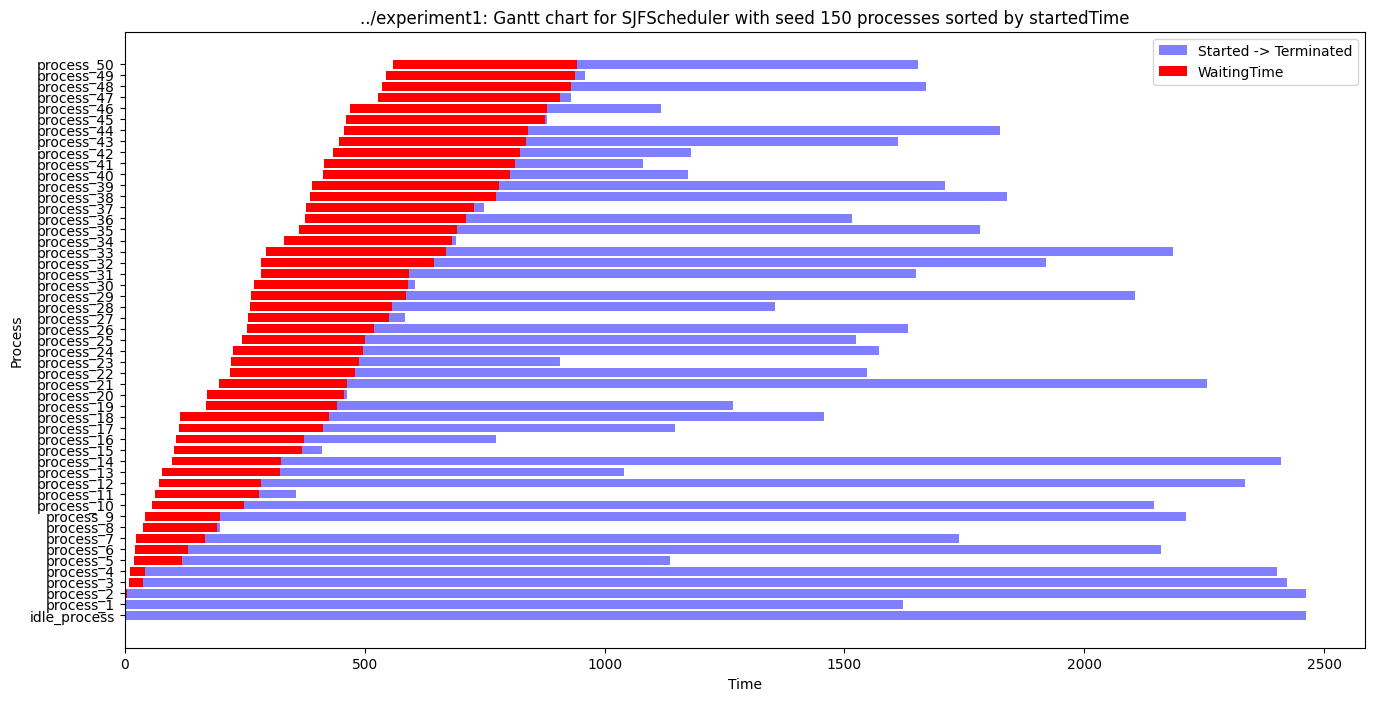

In [202]:
exp1.plot_gantt('SJFScheduler', '150')

Notice:

FeedbackRRScheduler: This scheduler provides dynamic prioritization, which can be advantageous for workloads with a mix of interactive and batch processes. It is likely to give better response times for shorter processes while not starving longer ones completely. However, this may come at the cost of slightly increased waiting times for some processes.

RRScheduler: Exhibits fairness in process scheduling by allocating CPU time equally. Ideal for time-sharing systems but can lead to increased turnaround times for processes if the time quantum is not optimally set. Workloads with processes of similar lengths will benefit the most from this scheduler.

FcfsScheduler: Simple and predictable, this scheduler is easy to implement and understand. It performs best when the majority of the processes have similar lengths. However, if long processes arrive before shorter ones, it can significantly increase the waiting time for the latter, leading to poor performance in varied workloads.

IdealSJFScheduler: Theoretically optimal for minimizing the average waiting time and turnaround time, but it requires precise knowledge of the process execution time, which is impractical in most real-world scenarios. In a controlled environment with known job lengths, it offers excellent performance.

SJFScheduler: Tries to approximate the IdealSJF behavior without prior knowledge of process lengths. It may use heuristics or historical data to estimate job lengths, which can improve performance over FCFS but may not always be as efficient as IdealSJF.

So, To substantiate these findings, an extensive examination across various seeds will be conducted to analyze the average waiting times associated with each scheduling algorithm. This approach will ensure a comprehensive evaluation of the algorithms' performance, catering to a wide array of operating conditions.

In [204]:
meanWaitingTimes = exp1.get_output_col('waitingTime').mean()
meanWaitingTimes

newCols = list(set(meanWaitingTimes.index.map(lambda x: x.split('_')[0])))
stats = pd.DataFrame(index=newCols, columns=["MeanWaitingTime"])

# Calculating the means for each scheduler
for scheduler in newCols:
    matching = [col for col in meanWaitingTimes.index if col.startswith(scheduler + '_')]
    meanOfScheduler = meanWaitingTimes[matching].mean()

    stats.at[scheduler, 'MeanWaitingTime'] = meanOfScheduler

stats


MeanWaitingTime
FeedbackRRScheduler     1278.341176
IdealSJFScheduler        814.541176
SJFScheduler             1170.27451
FcfsScheduler                1154.8
RRScheduler             1225.576471

Text(0, 0.5, 'Scheduler')

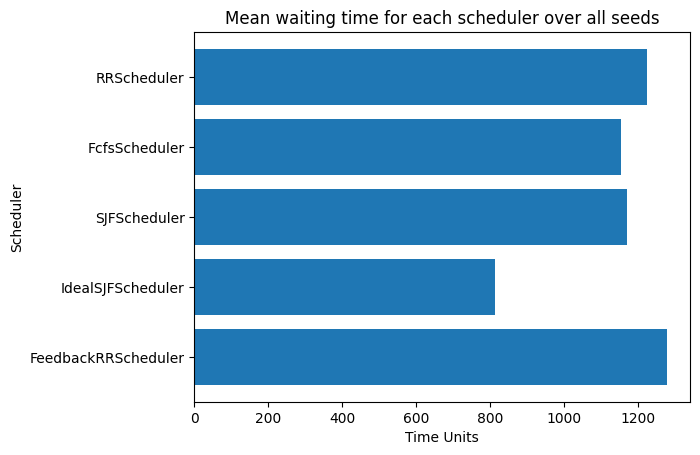

In [206]:
plt.barh(stats.index, stats['MeanWaitingTime'])
plt.title("Mean waiting time for each scheduler over all seeds")

plt.xlabel("Time Units")
plt.ylabel("Scheduler")

Based on the numerical data provided, the Ideal Shortest Job First (IdealSJFScheduler) algorithm exhibits the lowest mean waiting time across all seeds when compared to other scheduling algorithms. This result aligns with the theoretical understanding of the SJF approach, which prioritizes jobs with shorter durations to reduce the overall waiting time. The data indicates that Feedback Round Robin Scheduler (FeedbackRRScheduler) has the highest mean waiting time, which might be due to its time-slicing mechanism where processes are switched even if they are not complete, potentially leading to longer waiting times for individual processes.

The Gantt charts provided earlier also give a visual confirmation of these findings, where the processes under IdealSJFScheduler generally start sooner after creation, compared to the other schedulers. The longer bars of waiting time in red for the FeedbackRRScheduler suggest processes often wait longer before execution.

In summary, the analysis of both the quantitative data and the qualitative Gantt charts suggests that IdealSJFScheduler is the most efficient in terms of minimizing waiting times for processes, while FeedbackRRScheduler may not be as efficient in environments where reducing waiting time is a priority. This assessment is critical for environments where processing time is a critical performance metric, such as in real-time systems where process latency can significantly impact overall system performance

INTRODUCTION: 

In the realm of operating system design, the efficiency of CPU utilization and the minimization of process turnaround time are pivotal factors that significantly influence system performance. This investigation is meticulously designed to determine which scheduling algorithm stands superior in optimizing CPU utilization while concurrently curtailing the average turnaround time.
By dissecting the intricacies of each algorithm's operational mechanics, we aim to uncover a robust strategy that harmonizes the dual objectives of maximizing throughput and minimizing delay, thereby propelling the efficacy of computational operations.

In [208]:

exp2 = Experiment('../../experiment2')
print(f"All the Seeds Used in Experiment 2: {exp2.all_seeds()} ")


All the Seeds Used in Experiment 2: ['94111', '1222', '123422', '5669', '156555'] 


METHODOLOGY: 

The experiment aimed to evaluate different CPU scheduling algorithms for optimal performance. It involved simulating First-Come, First-Served (FCFS), Shortest Job First (SJF), Round Robin (RR), Feedback RR, and Ideal SJF algorithms using a series of tasks with varied computational needs.

Performance was measured by simulating each algorithm using diverse 'seed' sets to mimic various workload conditions, focusing on CPU utilization and average turnaround time. Key metrics were extracted, mean values calculated, and Gantt charts drawn for visual assessment.

The final analysis compared these metrics to determine the most effective algorithm for maximizing CPU usage while minimizing process turnaround time

INPUT PARAMETERS: 

    numberOfProcesses=25
    staticPriority=0
    meanInterArrival=12
    meanCpuBurst=4
    meanIoBurst=24
    meanNumberBursts=10


Note:

I've set the average IO burst time much higher than the CPU burst time to create a heavy and varied workload that makes the convoy effect more likely to happen.

SIMULATOR PARAMETERS: 

    timeLimit=5000
    interruptTime=10
    timeQuantum=4
    initialBurstEstimate=14
    alphaBurstEstimate=0.5
    periodic=false

Now mainly here,I selected these initial values to optimize the performance of the exponential averaging algorithm from the outset, setting the initial burst time at 14 and the alpha burst time at 0.5.

RESULT OUTPUT

In [210]:
Feedback_RR_Scheduler_output = [s[1] for s in exp2.get_output('FeedbackRRScheduler')]
print()
print("Feedback round robin output:")
print()
Feedback_RR_Scheduler_output[3]


Feedback round robin output:



id  priority  createdTime  startedTime  terminatedTime  cpuTime  \
process_id                                                                      
process_3      3         0           30           50              51        1   
process_16    16         0          196          282             858        2   
process_10    10         1          140          191            1528       10   
process_25    25         2          279          529            1877       18   
process_18    18         2          199          326            1974       29   
process_13    13         2          178          240            2073       12   
process_17    17         2          198          303            2099       10   
process_6      6         2           58          105            2200        6   
process_22    22         3          248          448            2756       35   
process_20    20         3          230          372            3034       31   
process_7      7         4           70          123            3411        6   
process_15    15         4          181          272            3449       31   
process_19    19         5          217          348            3498       22   
process_23    23         5          267          473            3685       33   
process_4      4         5           40           65            3720       21   
process_9      9         7          113          177            4191       14   
process_1      1         7            0           10            4520       28   
process_11    11         7          142          206            4547       26   
process_12    12         8          170          227            4611       54   
process_24    24         8          272          501            4622       75   
process_14    14         9          180          251            4972       49   
idle_process   0         0            0            0            5006     4985   

              blockedTime  turnaroundTime  waitingTime  responseTime  
process_id                                                            
process_3               0              21           20            20  
process_16              6             662          654            86  
process_10              2            1388         1376            51  
process_25              6            1598         1574           250  
process_18             13            1775         1733           127  
process_13              3            1895         1880            62  
process_17              3            1901         1888           105  
process_6               1            2142         2135            47  
process_22              9            2508         2464           200  
process_20             15            2804         2758           142  
process_7               2            3341         3333            53  
process_15             10            3268         3227            91  
process_19             11            3281         3248           131  
process_23             14            3418         3371           206  
process_4               1            3680         3658            25  
process_9               0            4078         4064            64  
process_1               9            4520         4483            10  
process_11              4            4405         4375            64  
process_12             16            4441         4371            57  
process_24             32            4350         4243           229  
process_14             17            4792         4726            71  
idle_process            0            5006           21             0

In [212]:
shortest_job_first_output = [s[1] for s in exp2.get_output('SJFScheduler')]
print()
print("shortest job first output:")
print()
shortest_job_first_output[3]


shortest job first output:



id  priority  createdTime  startedTime  terminatedTime  cpuTime  \
process_id                                                                      
process_3      3        14           30          343             364       21   
process_1      1         8            0           10             540      278   
process_6      6         9           58          743             860       46   
process_5      5         4           55          562             949       94   
process_7      7         5           70          959            1065       36   
process_9      9        14          113         1272            1296       24   
process_10    10         6          140         1317            1570       40   
process_11    11         8          142         1354            1594       76   
process_2      2         2           29          104            1936      354   
process_13    13         8          178         1651            1959       52   
process_12    12         6          170         1617            2285      164   
process_14    14         3          180         1969            2485      109   
process_16    16         7          196         2453            2519       22   
process_15    15         3          181         2029            2564      121   
process_17    17         4          198         2529            2682       30   
process_18    18         1          199         2587            2974       69   
process_19    19         5          217         2598            2985       92   
process_20    20         3          230         2826            3286      121   
process_22    22         3          248         3022            3539      135   
process_21    21         4          235         3010            3849      153   
process_23    23         5          267         3342            3887      103   
process_4      4        15           40          401            3944       61   
process_8      8        16          100         1104            4031       97   
process_25    25         6          279         3909            4111       48   
process_24    24         2          272         3629            4434      115   
idle_process   0         0            0            0            4434        3   

              blockedTime  turnaroundTime  waitingTime  responseTime  
process_id                                                            
process_3               0             334          313           313  
process_1               9             540          253            10  
process_6               1             802          755           685  
process_5               7             894          793           507  
process_7               2             995          957           889  
process_9               0            1183         1159          1159  
process_10              2            1430         1388          1177  
process_11              4            1452         1372          1212  
process_2              44            1907         1509            75  
process_13              3            1781         1726          1473  
process_12             16            2115         1935          1447  
process_14             17            2305         2179          1789  
process_16              6            2323         2295          2257  
process_15             10            2383         2252          1848  
process_17              3            2484         2451          2331  
process_18             13            2775         2693          2388  
process_19             11            2768         2665          2381  
process_20             15            3056         2920          2596  
process_22              9            3291         3147          2774  
process_21             20            3614         3441          2775  
process_23             14            3620         3503          3075  
process_4               1            3904         3842           361  
process_8               5            3931

I'll start by reviewing the Gantt Charts for each scheduling algorithm using the given parameters. To determine CPU utilization, I plan to apply the following formula (outlined in experiment.py):

CPU utilization (%) = 100 - ((sum of CPU times - sum of idle times) / total time)

In [214]:
def new_results():
	return pd.DataFrame(columns=["Seed", "Scheduler", "MeanWaitingTime", "MeanTurnaroundTime","MeanResponseTime", "CpuUtilization"])
	
results = new_results()

Result when using seed {123422}

CPU Utilization for FeedbackRRScheduler: 98.974%
CPU Utilization for RRScheduler: 98.987%
CPU Utilization for FcfsScheduler: 98.996%
CPU Utilization for IdealSJFScheduler: 98.992%
CPU Utilization for SJFScheduler: 98.996%


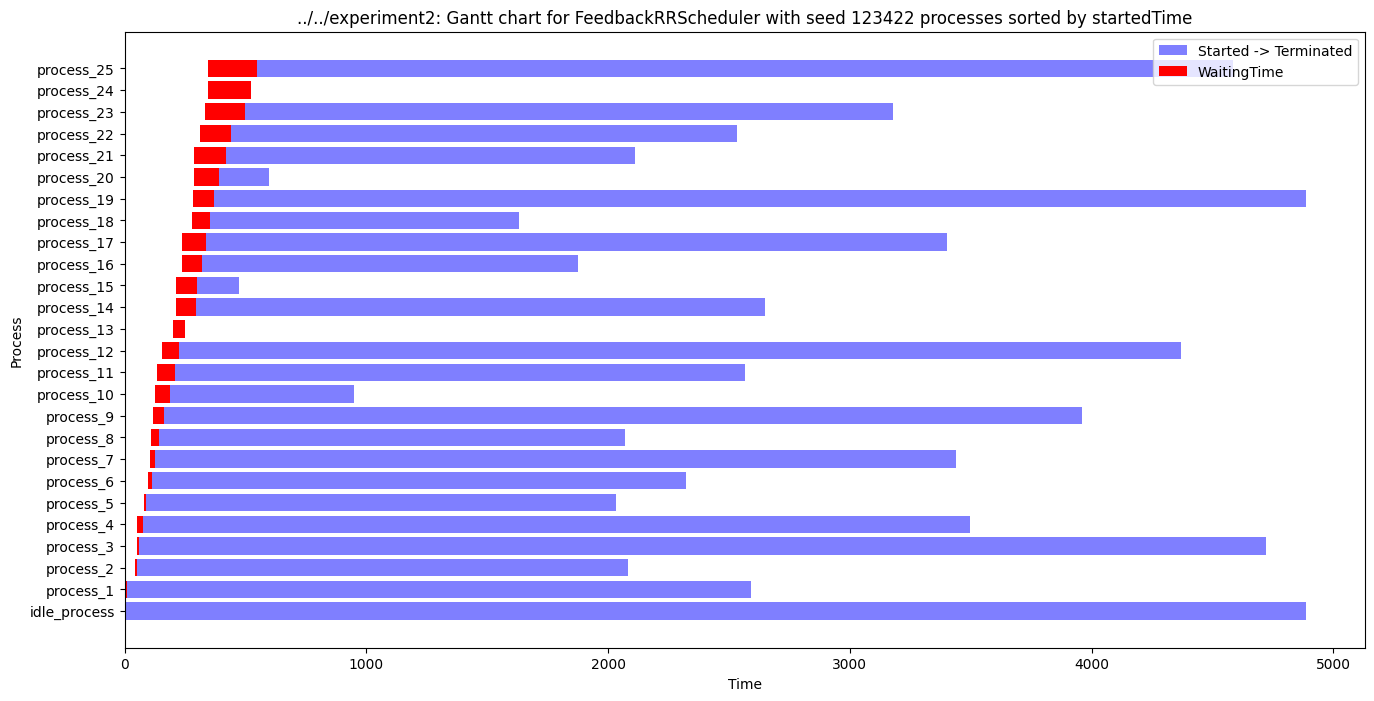

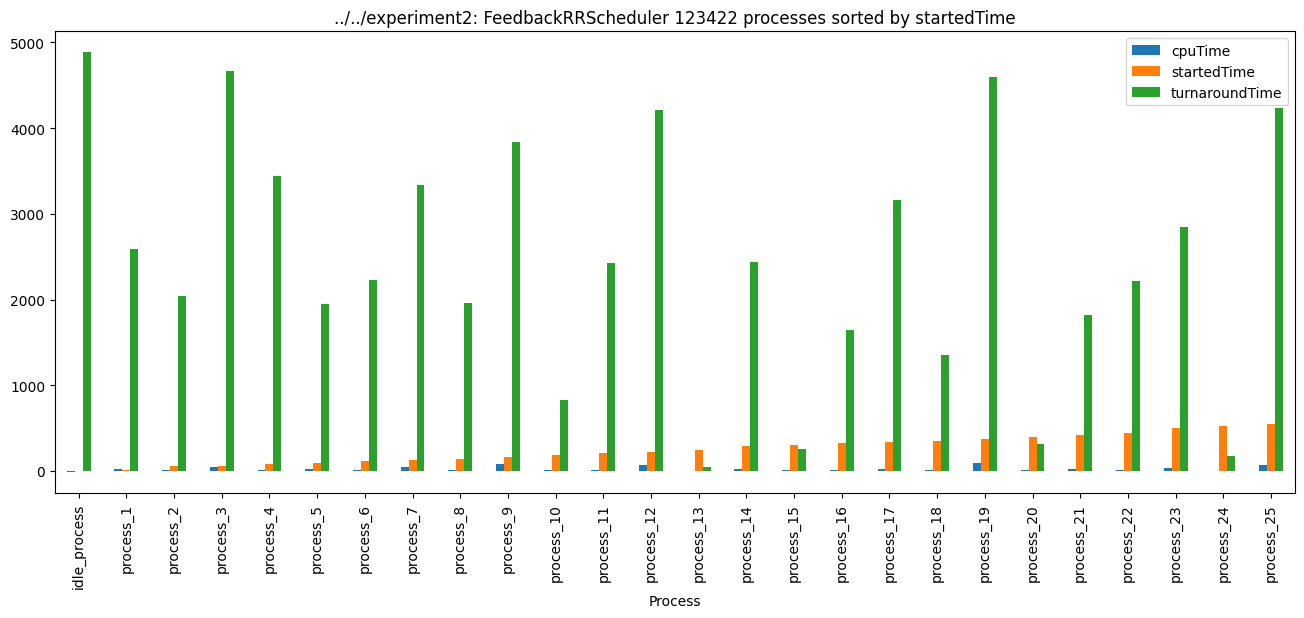

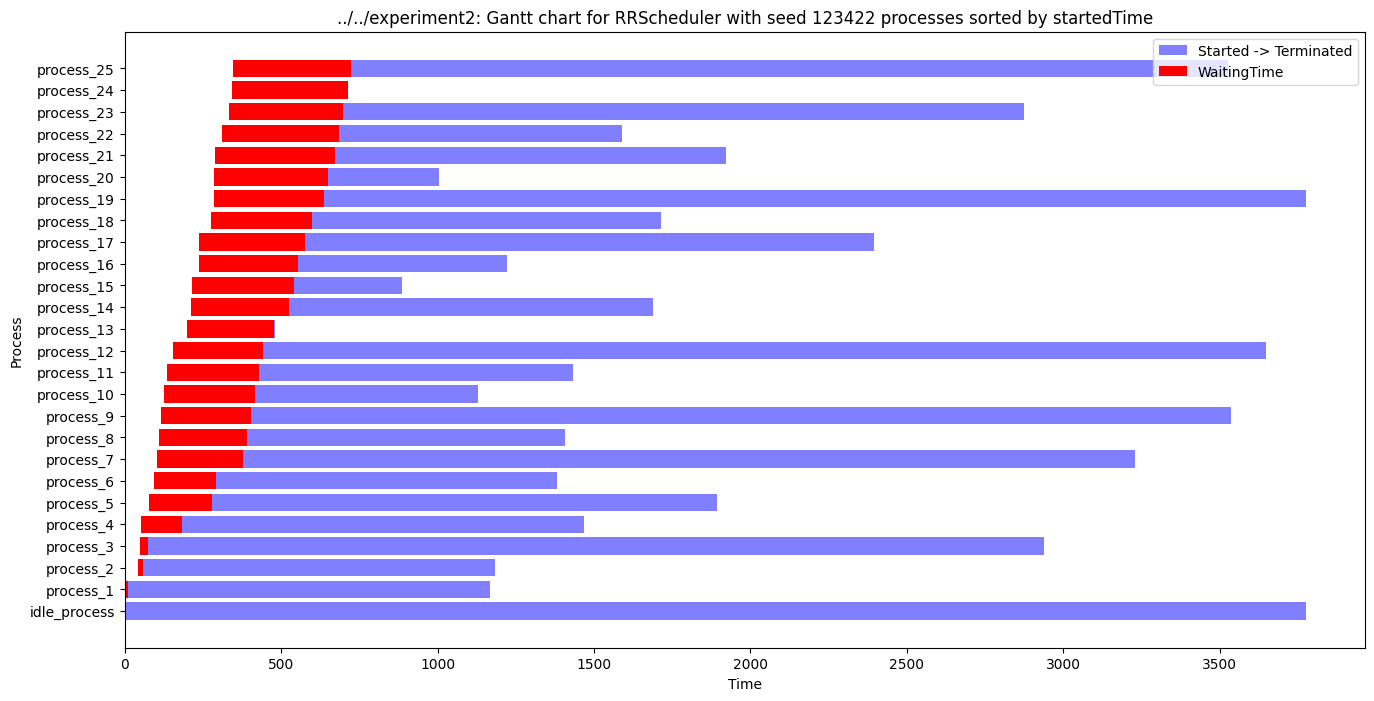

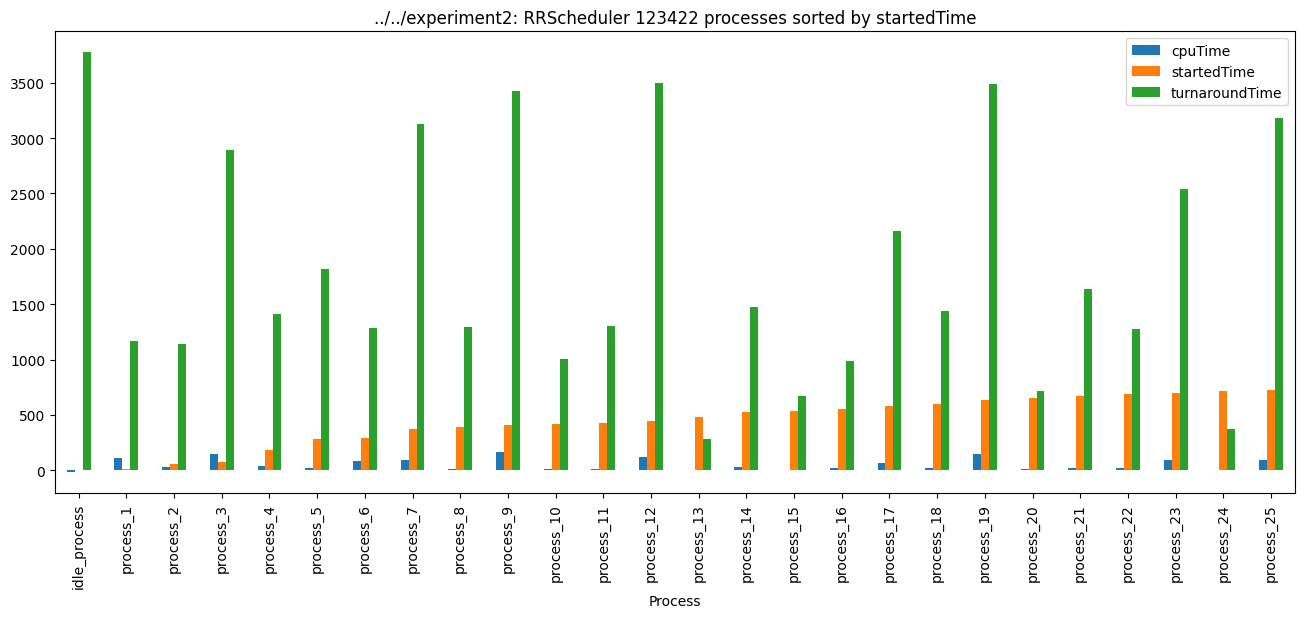

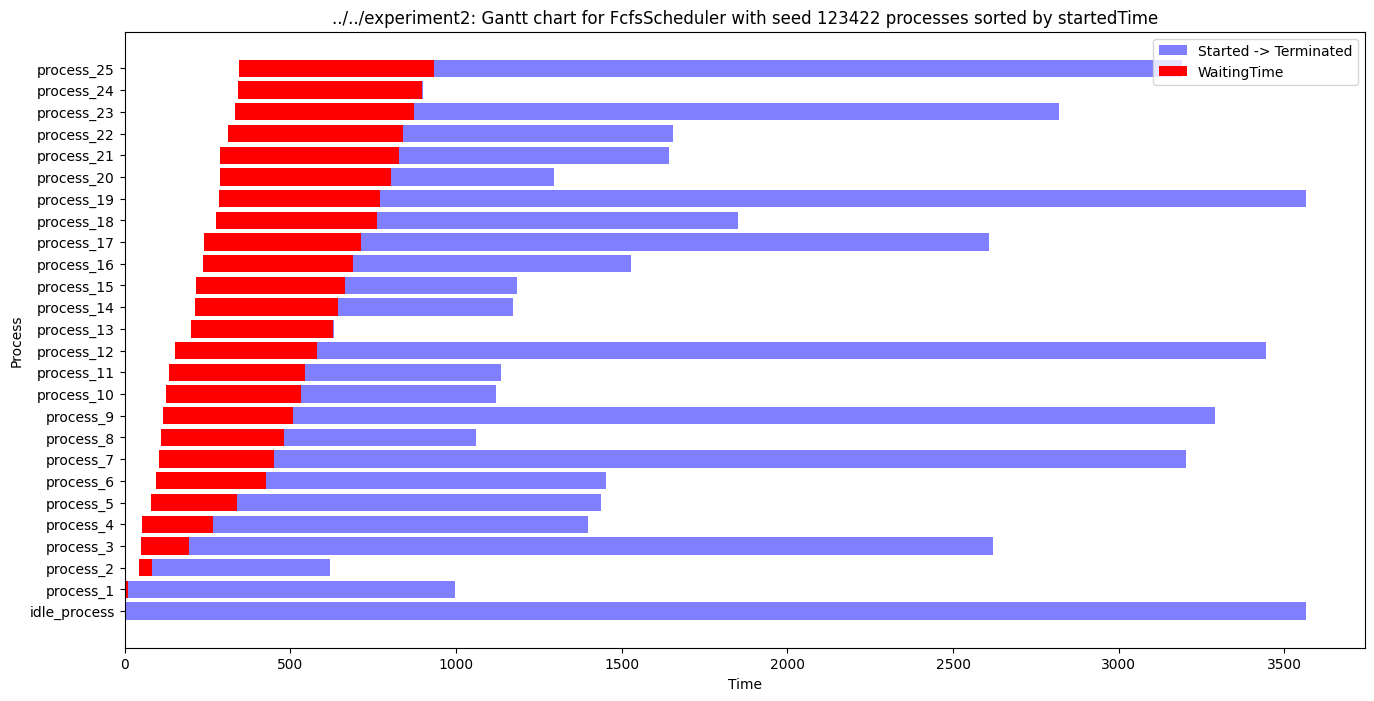

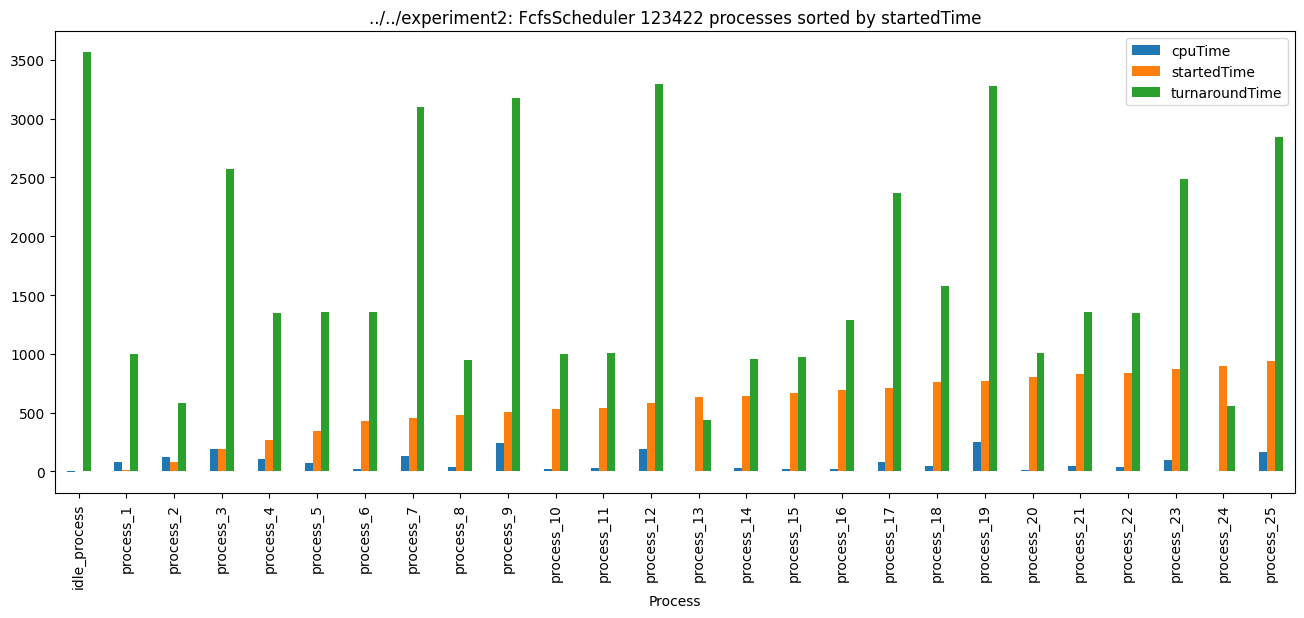

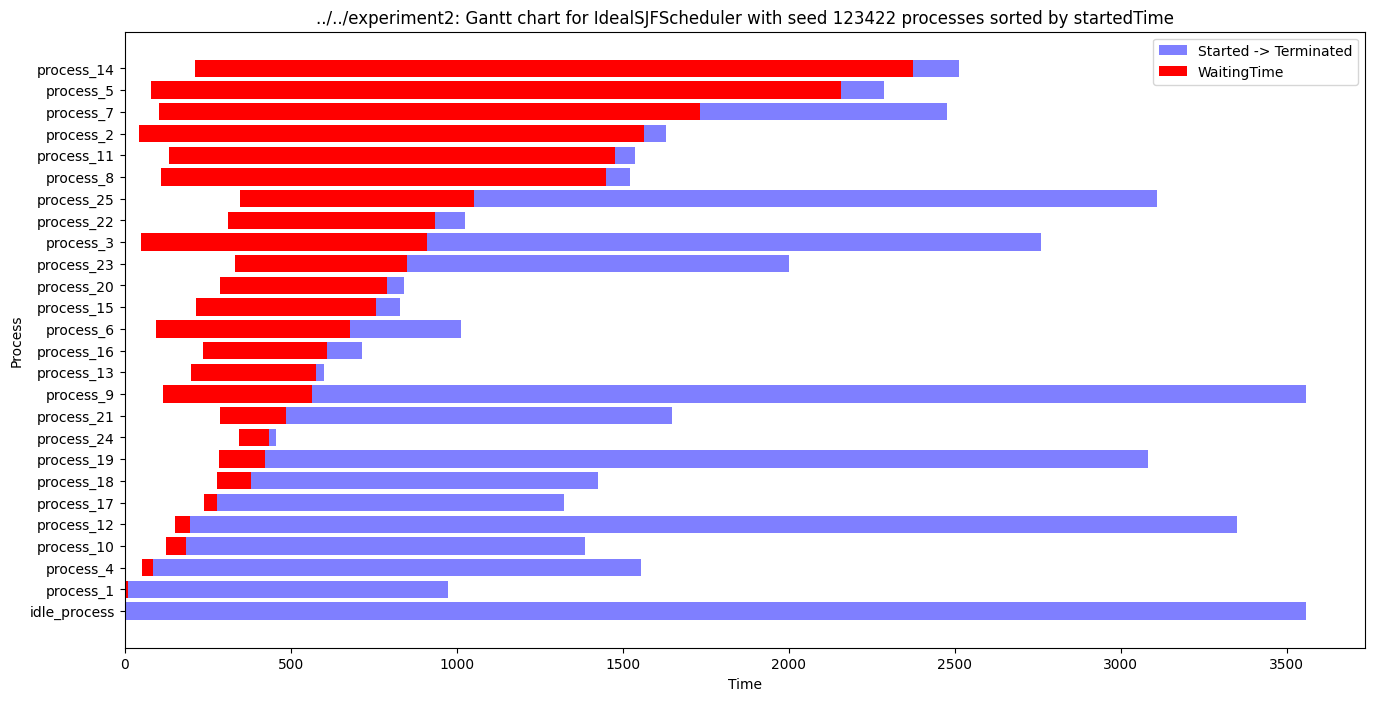

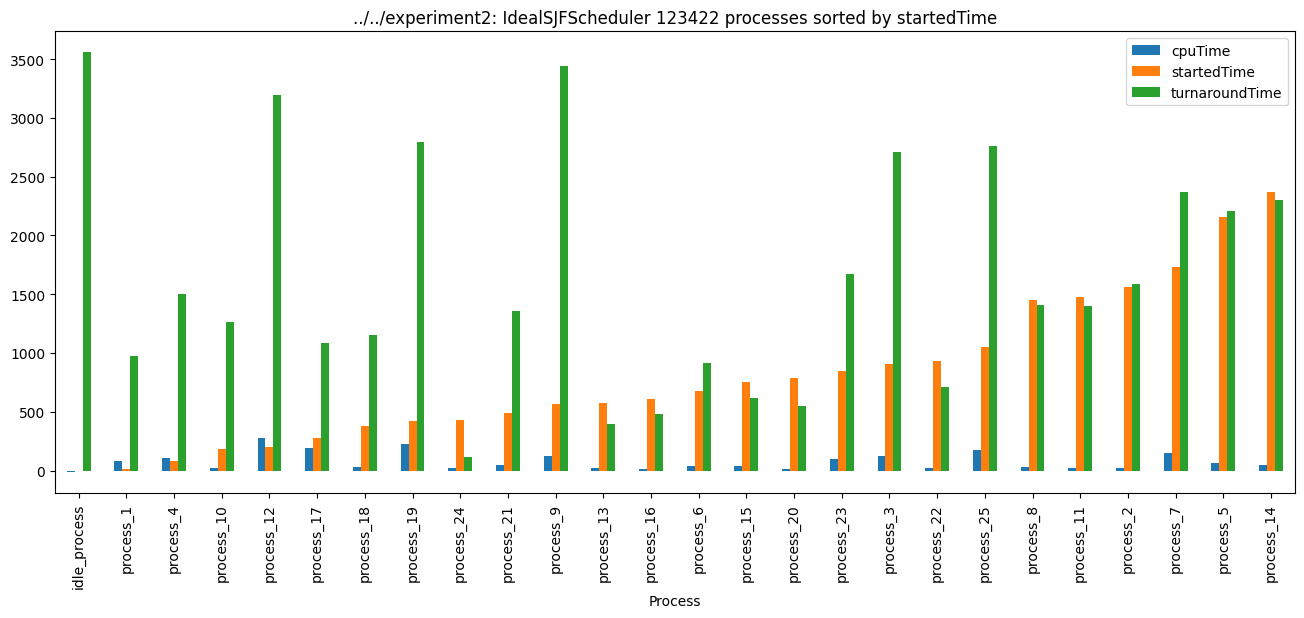

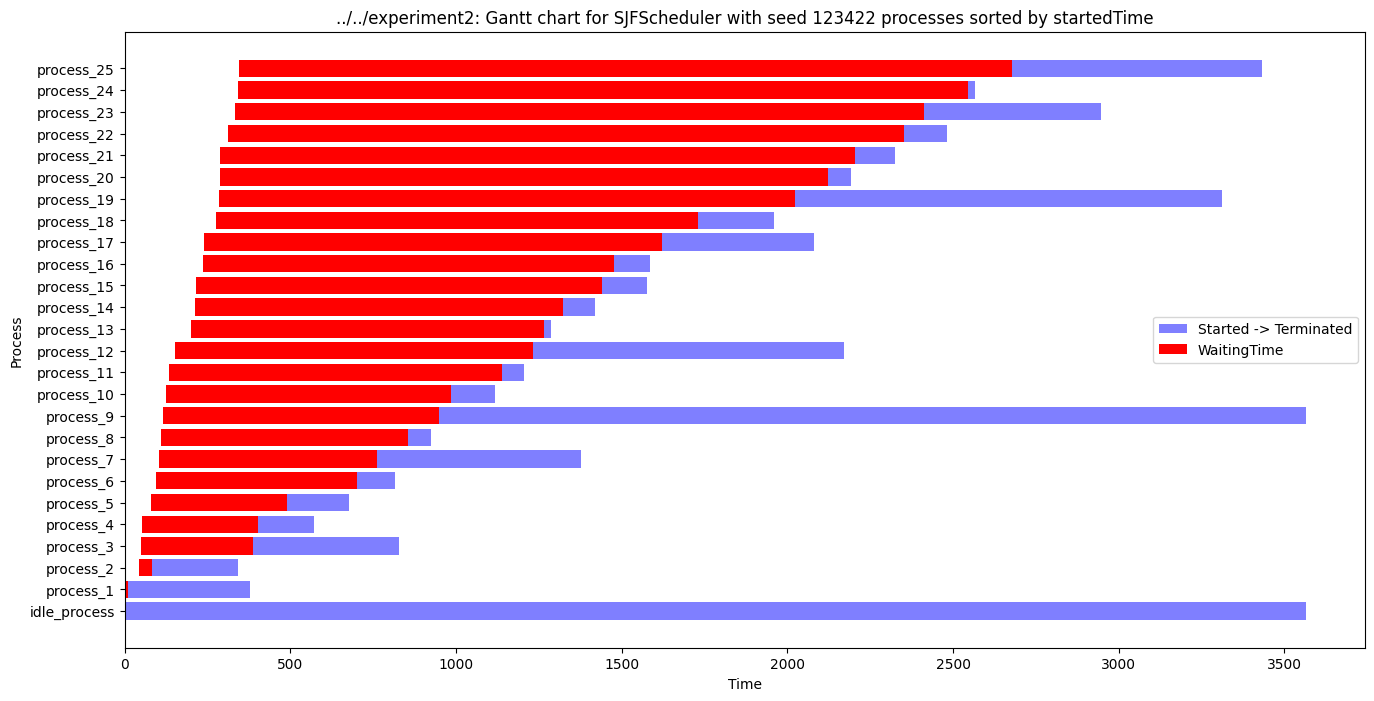

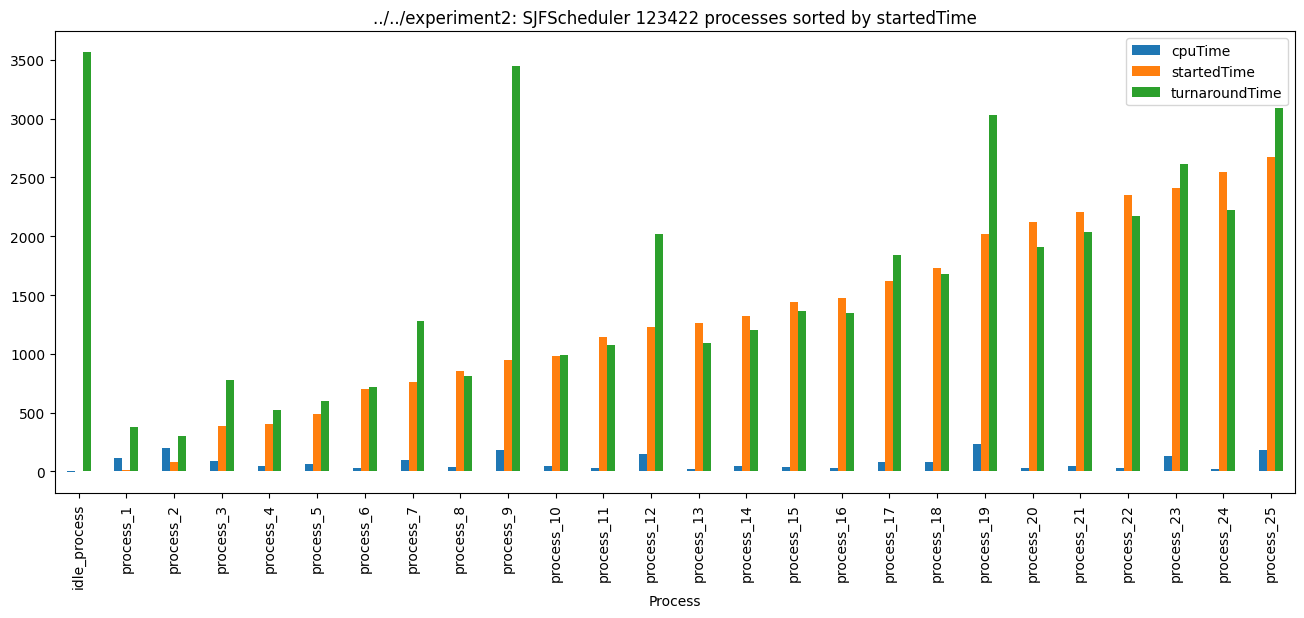

In [216]:
# Constants defined for analysis
seed_to_analyze = "123422"
schedulers = [
    'FeedbackRRScheduler',
    'RRScheduler',
    'FcfsScheduler',
    'IdealSJFScheduler',
    'SJFScheduler'
]

def analyze_and_display_results(experiment, scheduler_name, seed):
    """Runs analysis on specified experiment, scheduler, and seed, then displays results."""
    # Generate and display Gantt chart and output columns for the given scheduler and seed
    experiment.plot_gantt(scheduler_name, seed)
    experiment.plot_cols_for_output(scheduler_name, seed)
    
    # Calculate CPU utilization and gather output data
    cpu_utilization = experiment.calculate_cpu_utilization_for_output(scheduler_name, seed)
    scheduler_output = experiment.get_output_for_seed(scheduler_name, seed)
    
    # Record the results data
    results.loc[len(results)] = [
        seed, 
        scheduler_name,
        scheduler_output.waitingTime.mean(),
        scheduler_output.turnaroundTime.mean(),
        scheduler_output.responseTime.mean(),
        cpu_utilization
    ]
    
    # Print out CPU utilization statistics
    print(f"CPU Utilization for {scheduler_name}: {cpu_utilization.round(3)}%")

# Iterate through each scheduler and display the gathered results
for scheduler in schedulers:
    analyze_and_display_results(exp2, scheduler, seed_to_analyze)


RESULTS WHEN SEED {94111}

It's noteworthy that the FeedbackRRScheduler does not achieve the highest CPU utilization. This observation aligns with findings from the previous experiment, where the FeedbackRRScheduler exhibited significant fluctuations in CPU utilization relative to other algorithms, particularly under varying workloads.

<<t's noteworthy that the FeedbackRRScheduler does not achieve the highest CPU utilization. This observation aligns with findings from the previous experiment, where the FeedbackRRScheduler exhibited significant fluctuations in CPU utilization relative to other algorithms, particularly under varying workloads.>>

CPU Utilization for FeedbackRRScheduler: 98.989%
CPU Utilization for RRScheduler: 98.989%
CPU Utilization for FcfsScheduler: 98.991%
CPU Utilization for IdealSJFScheduler: 98.987%
CPU Utilization for SJFScheduler: 98.977%


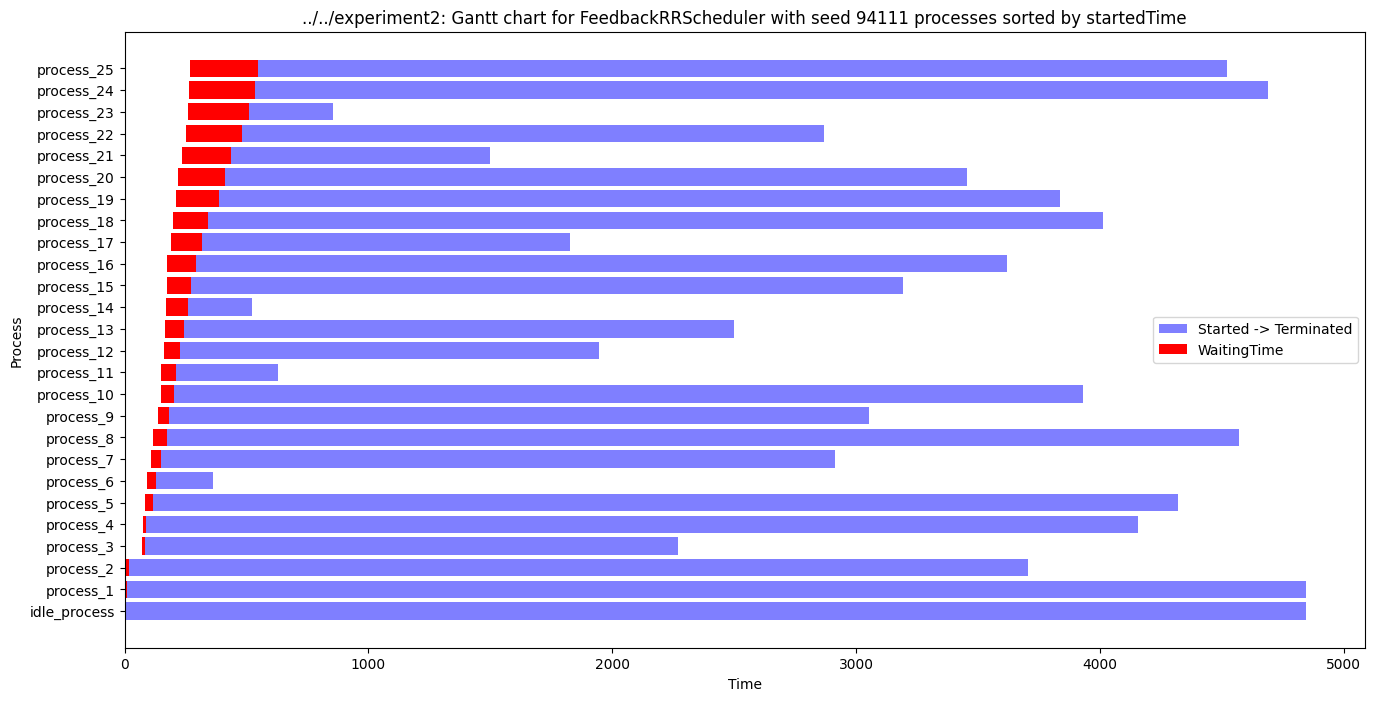

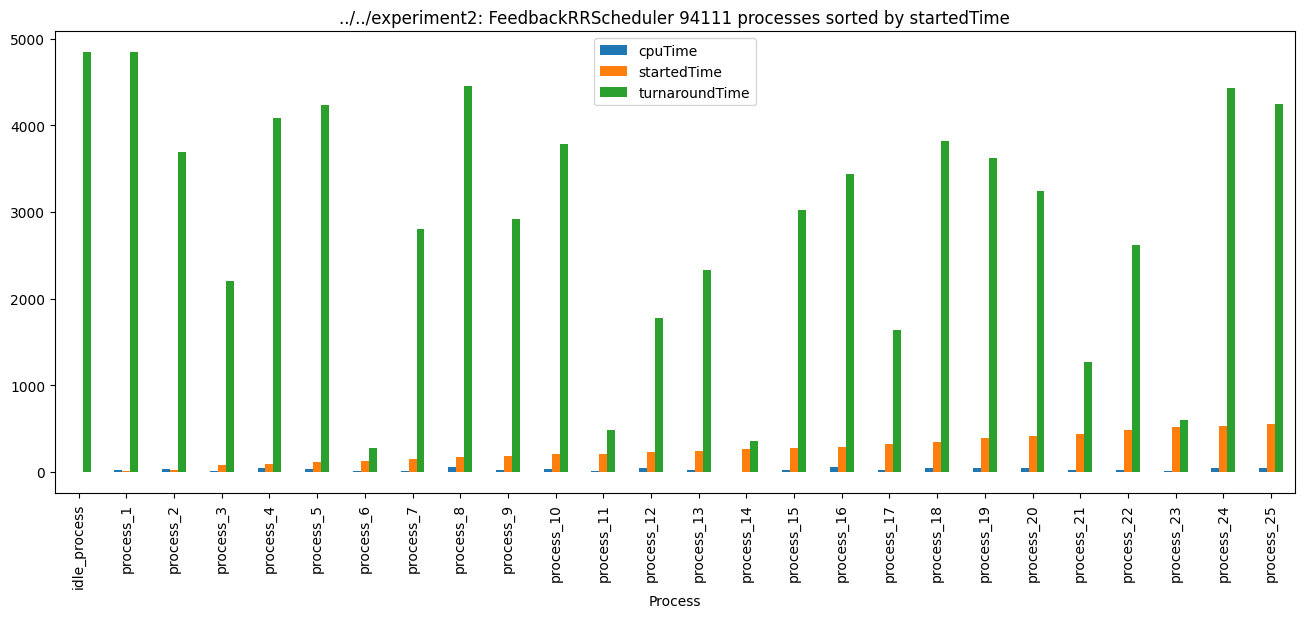

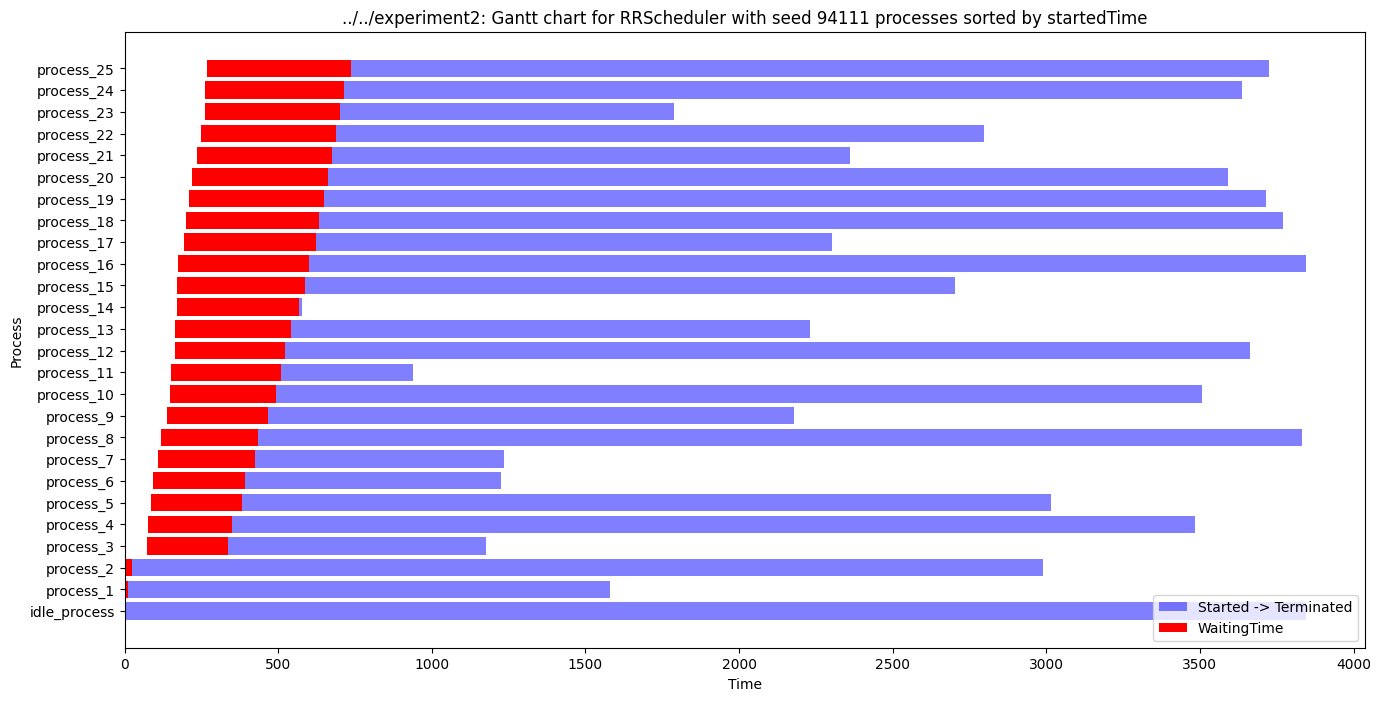

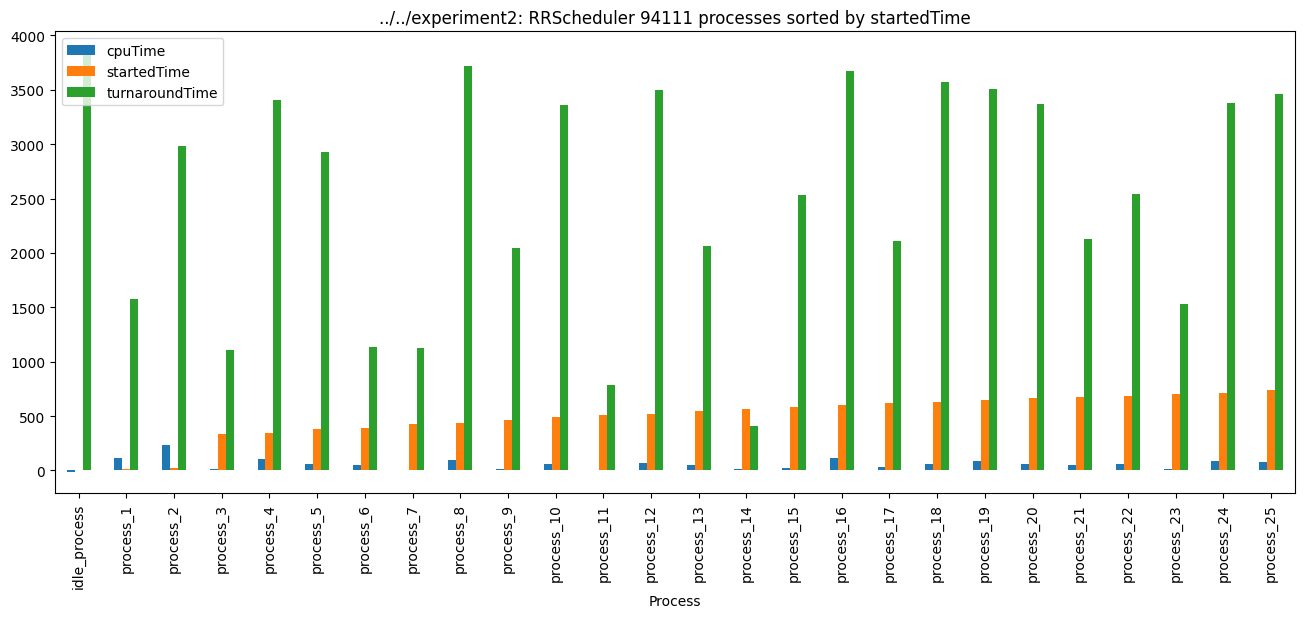

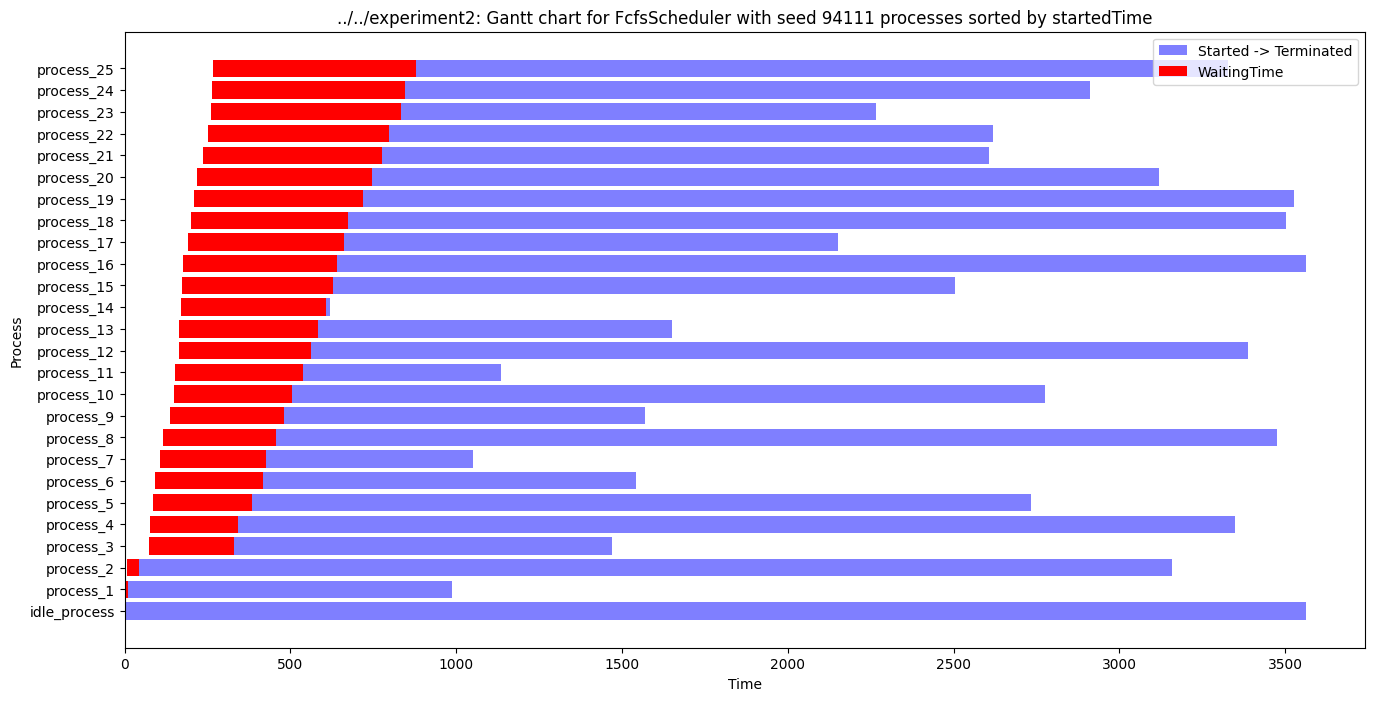

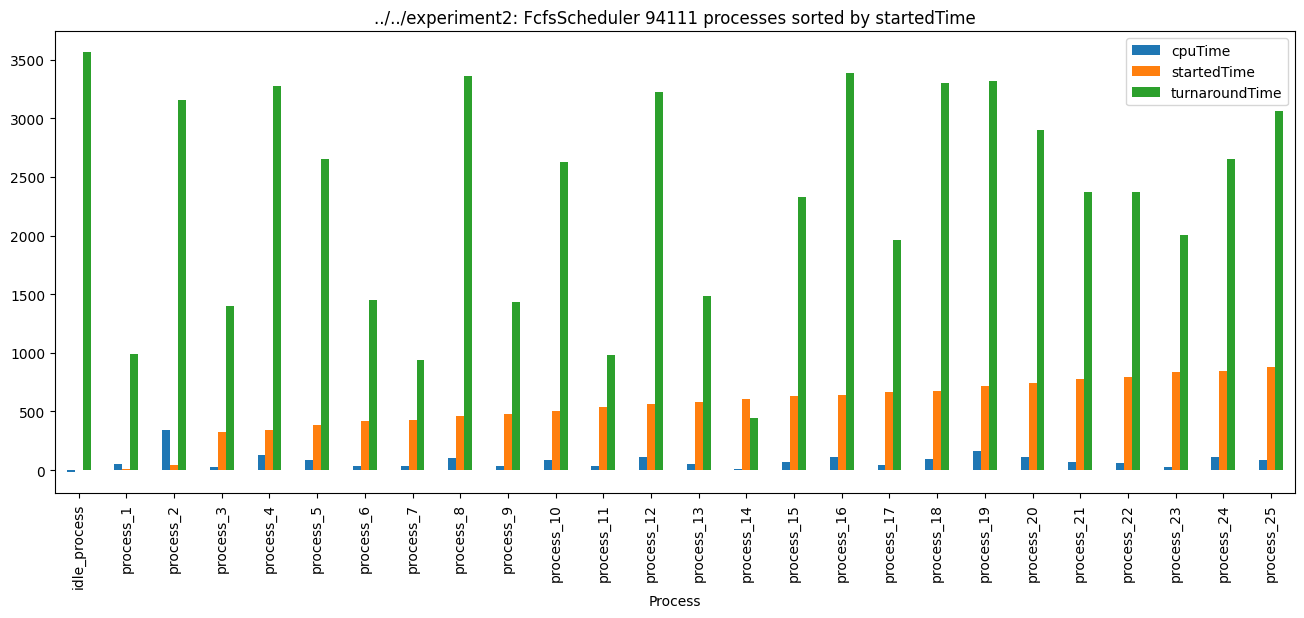

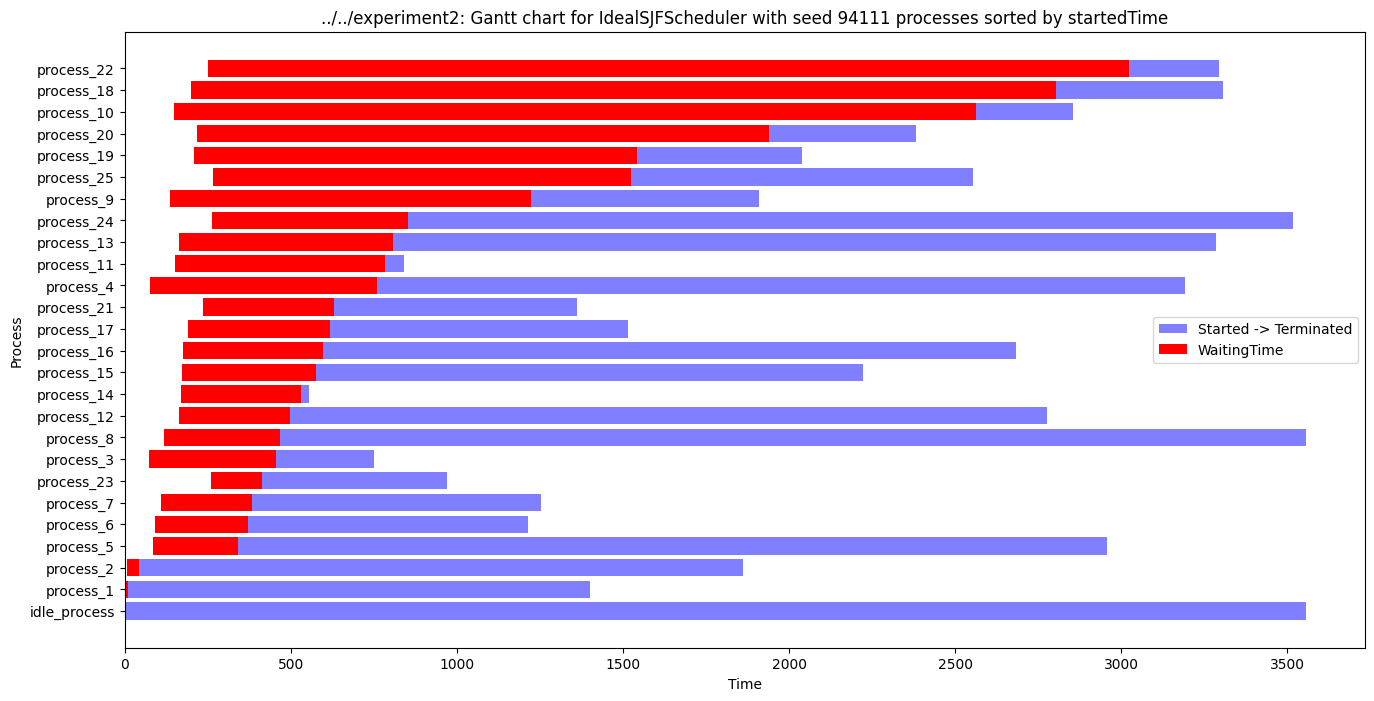

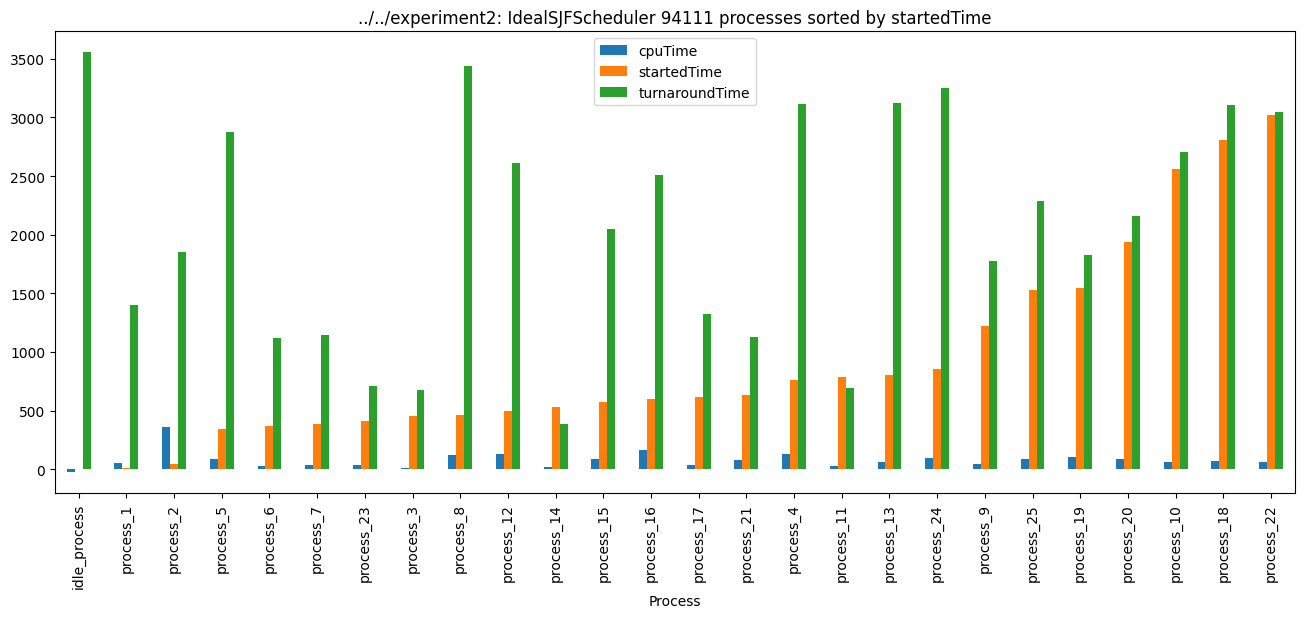

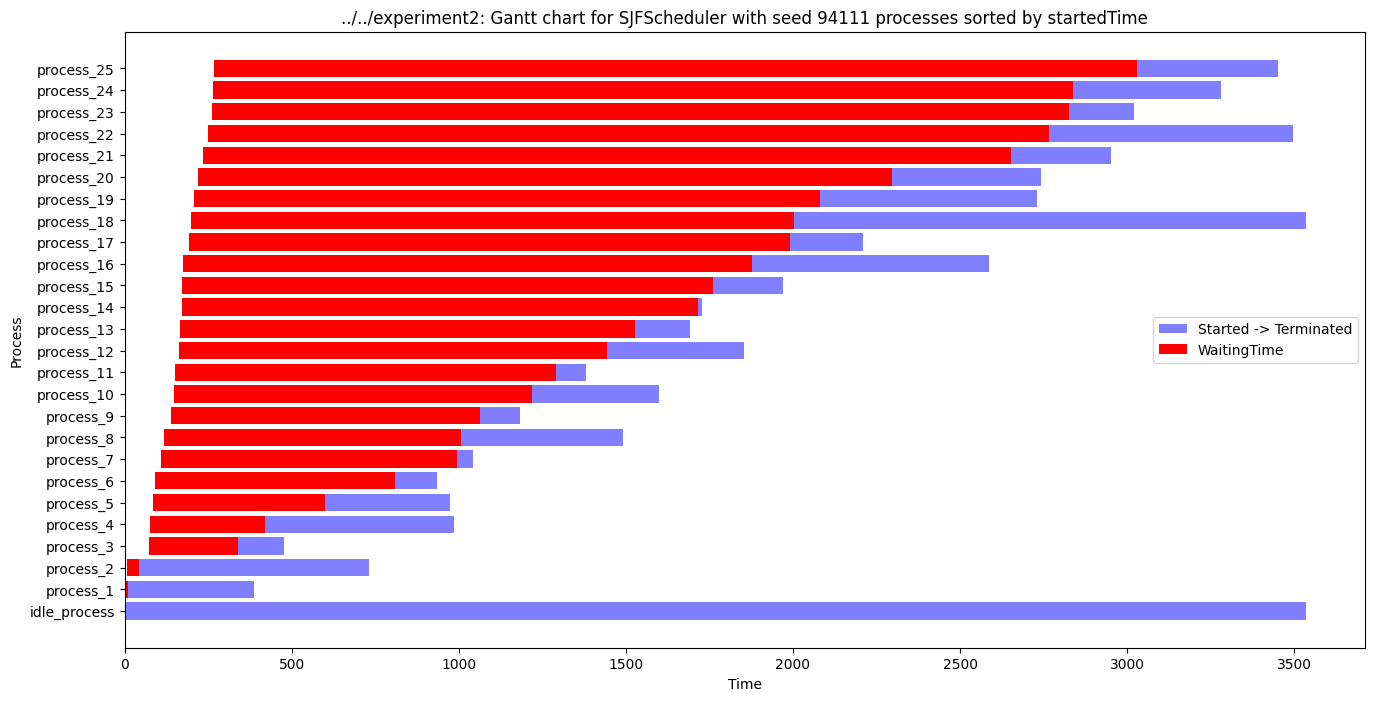

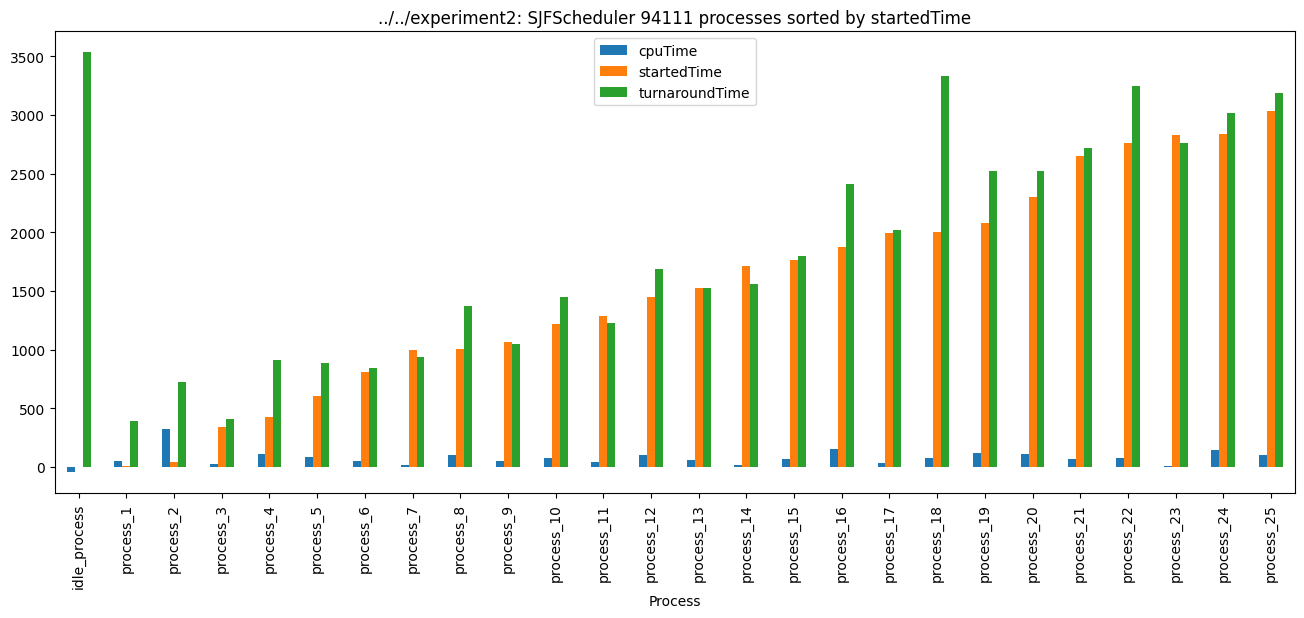

In [218]:
seed = '94111'
print("<<t's noteworthy that the FeedbackRRScheduler does not achieve the highest CPU utilization. This observation aligns with findings from the previous experiment, where the FeedbackRRScheduler exhibited significant fluctuations in CPU utilization relative to other algorithms, particularly under varying workloads.>>")
print()
for scheduler in schedulers:
	analyze_and_display_results(exp2, scheduler, seed)


RESULTS WHEN SEED IS {156555}

CPU Utilization for FeedbackRRScheduler: 98.981%
CPU Utilization for RRScheduler: 98.994%
CPU Utilization for FcfsScheduler: 98.995%
CPU Utilization for IdealSJFScheduler: 98.997%
CPU Utilization for SJFScheduler: 98.996%


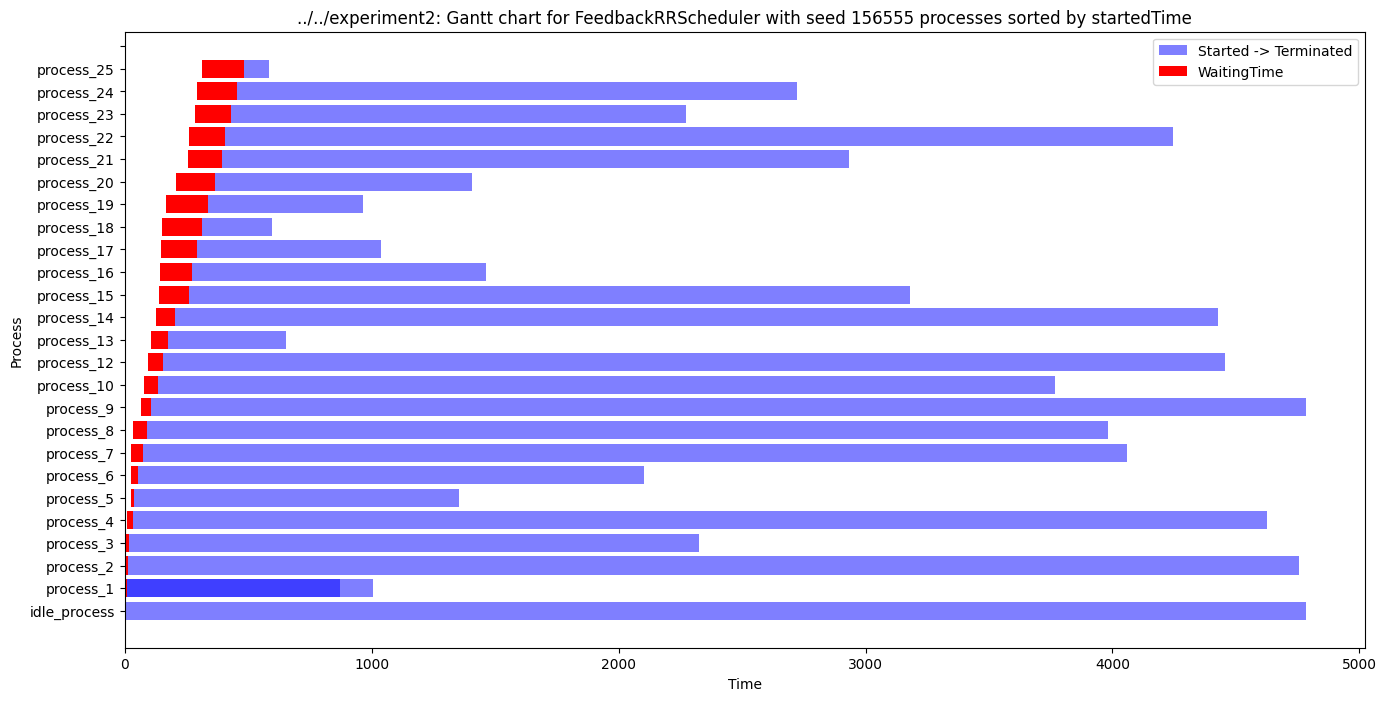

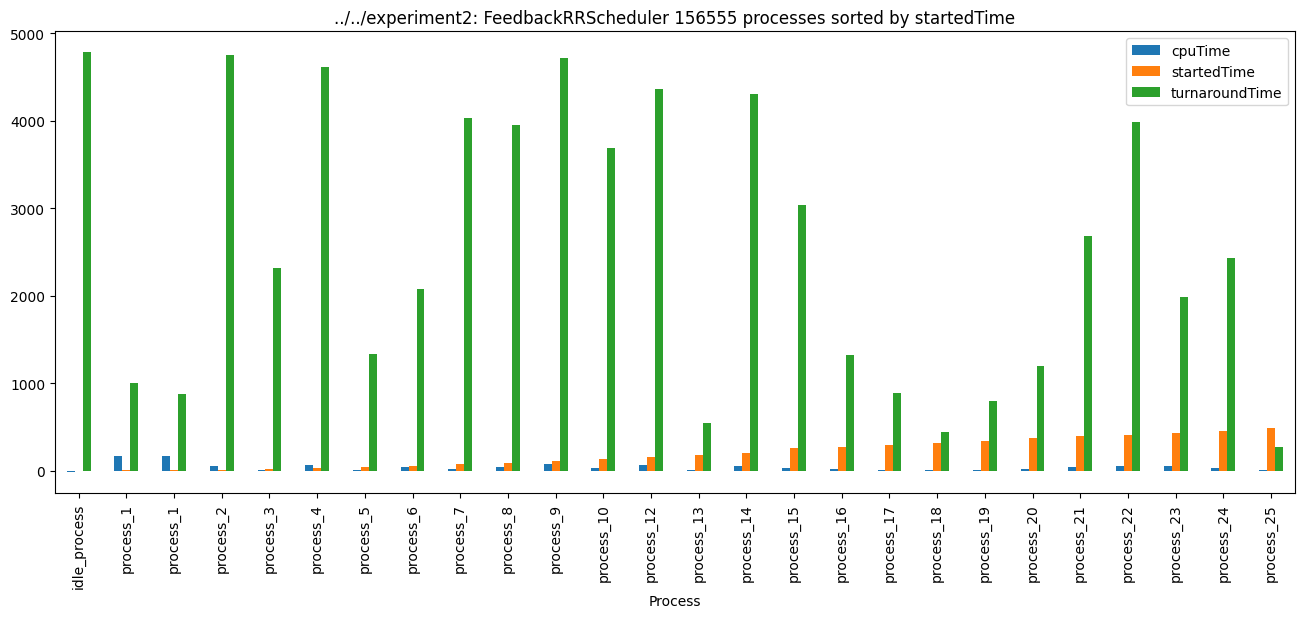

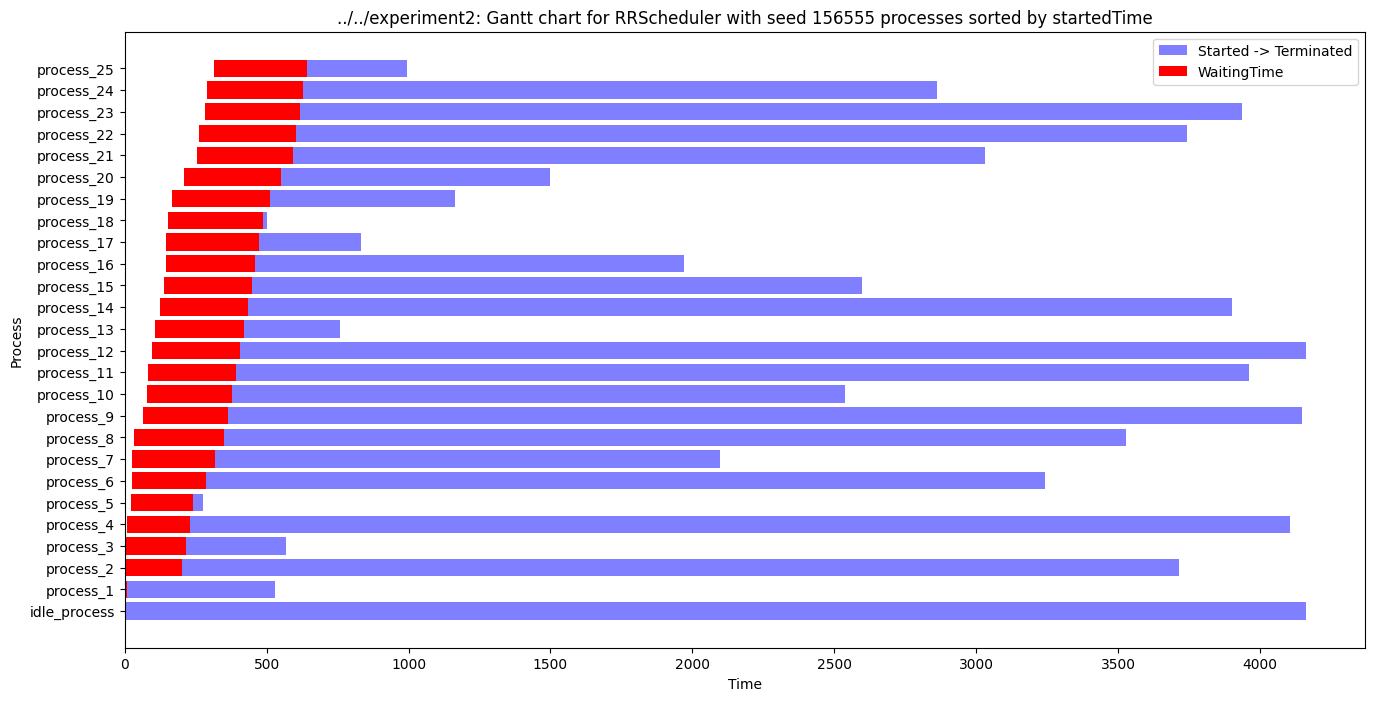

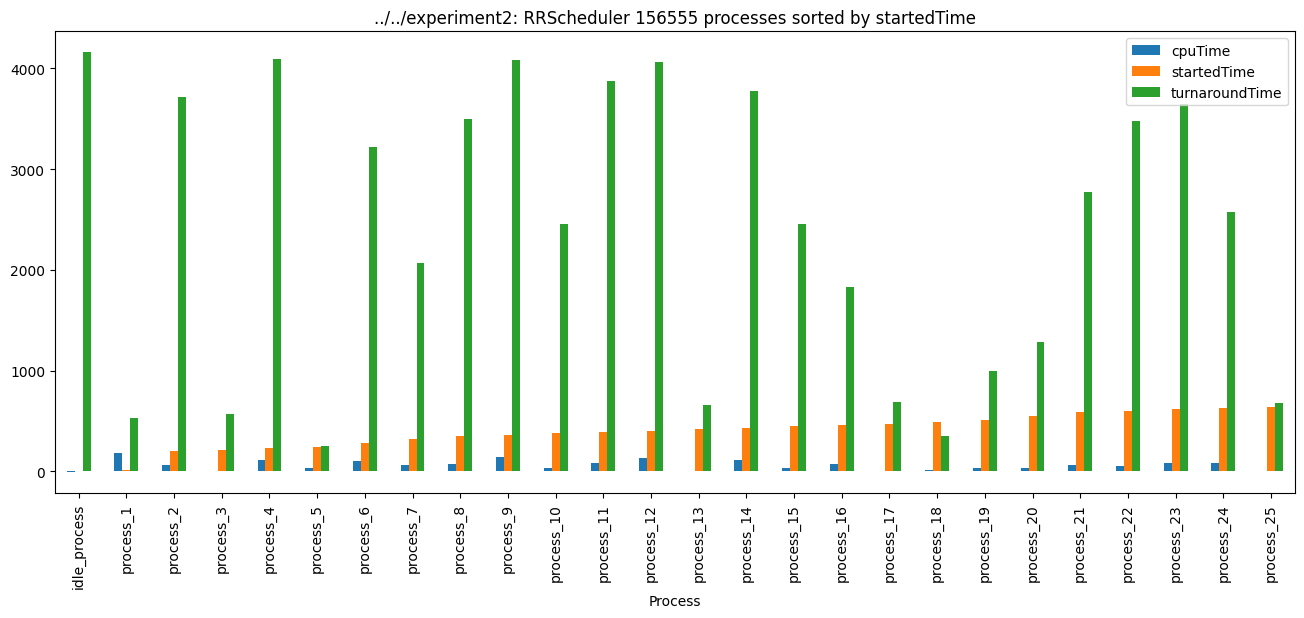

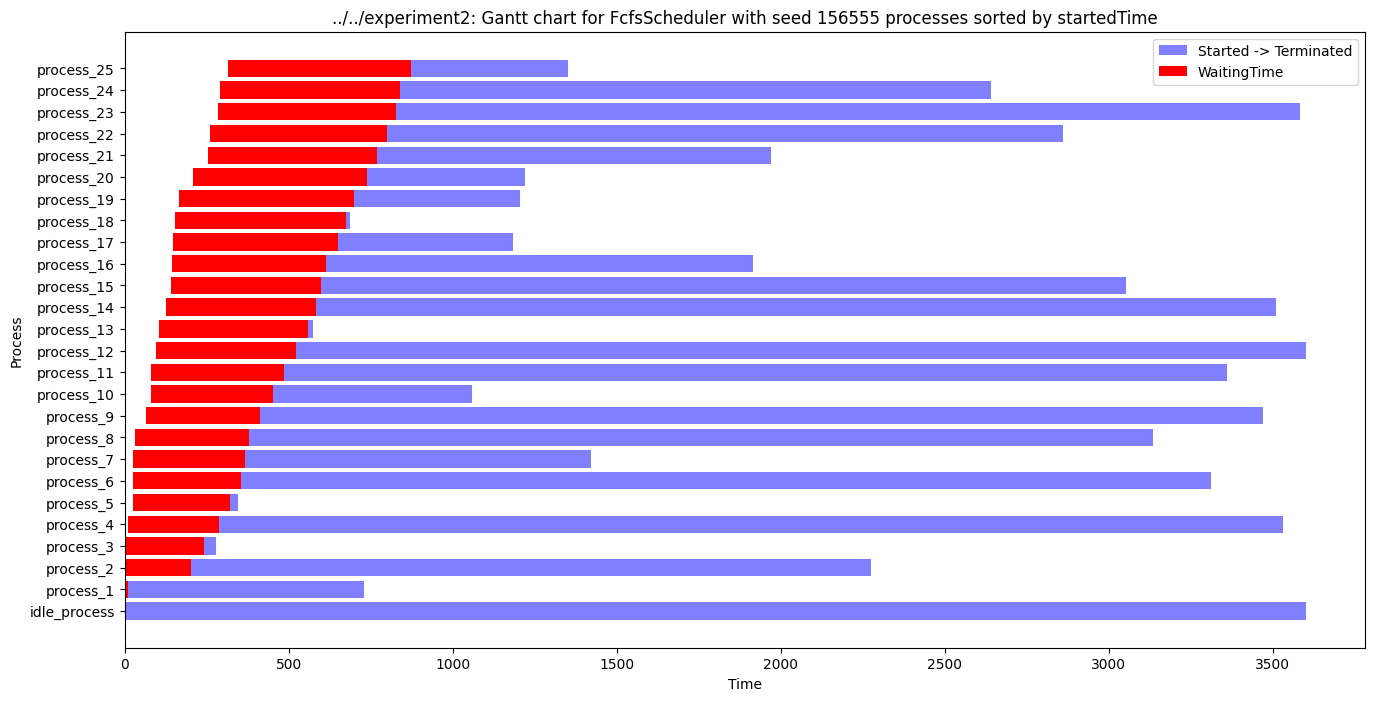

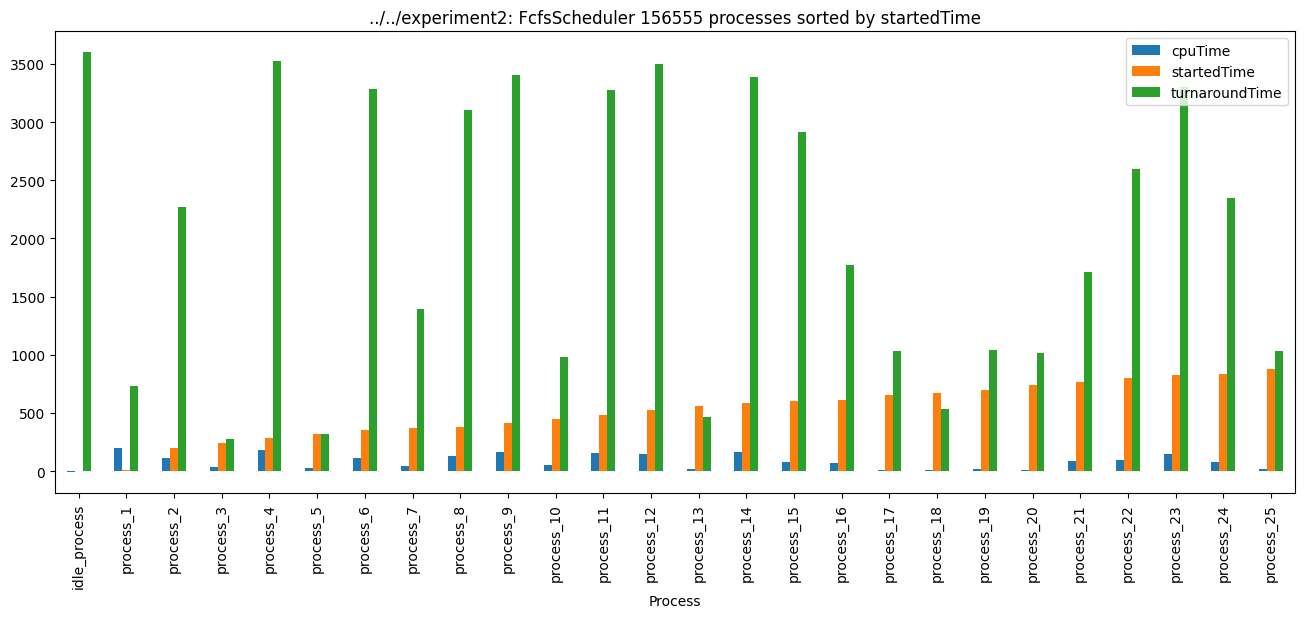

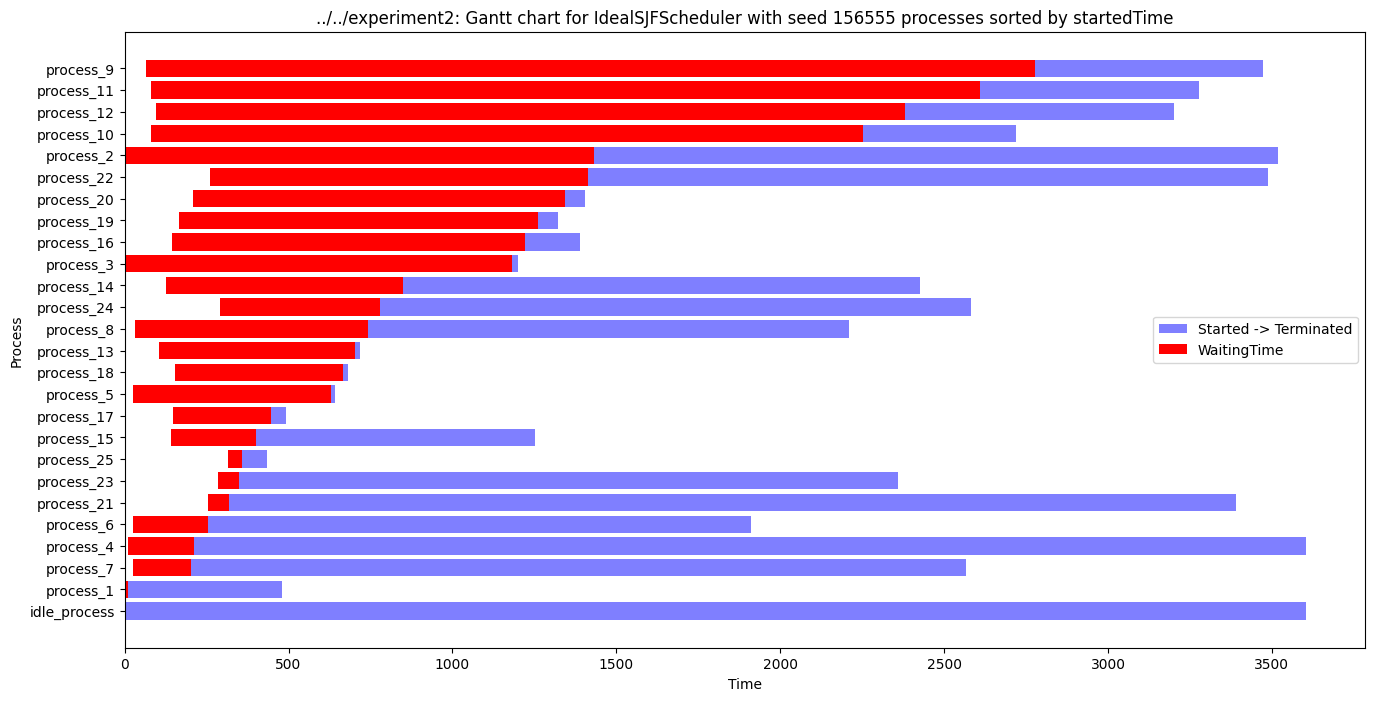

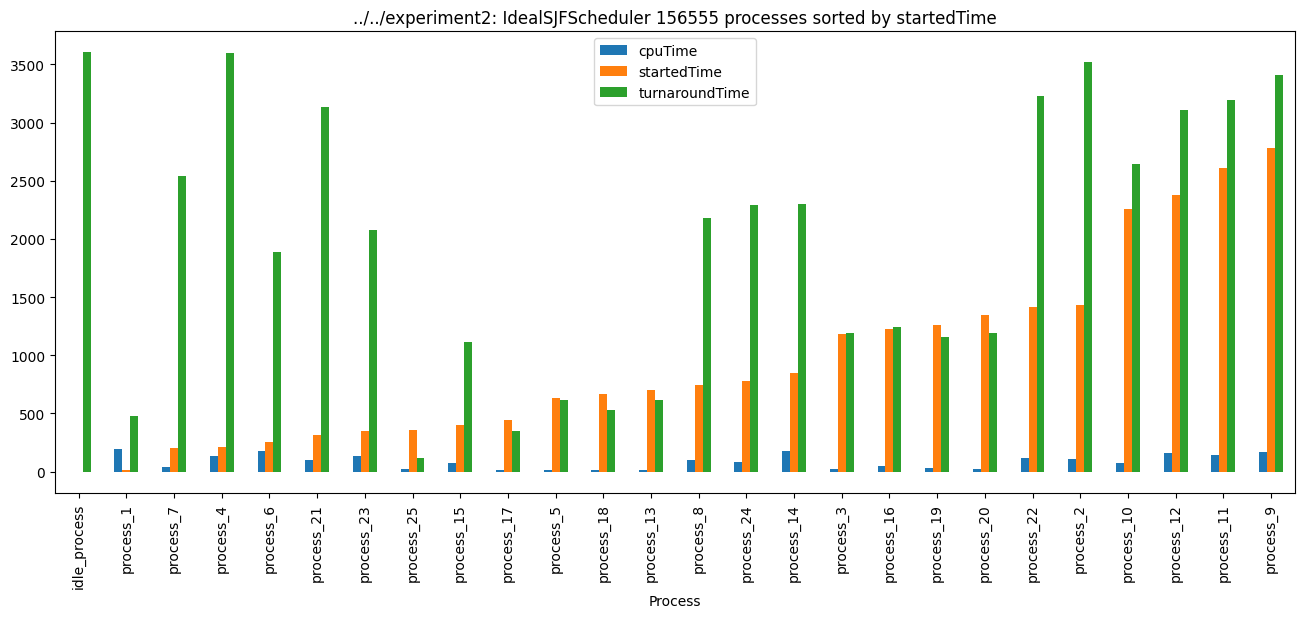

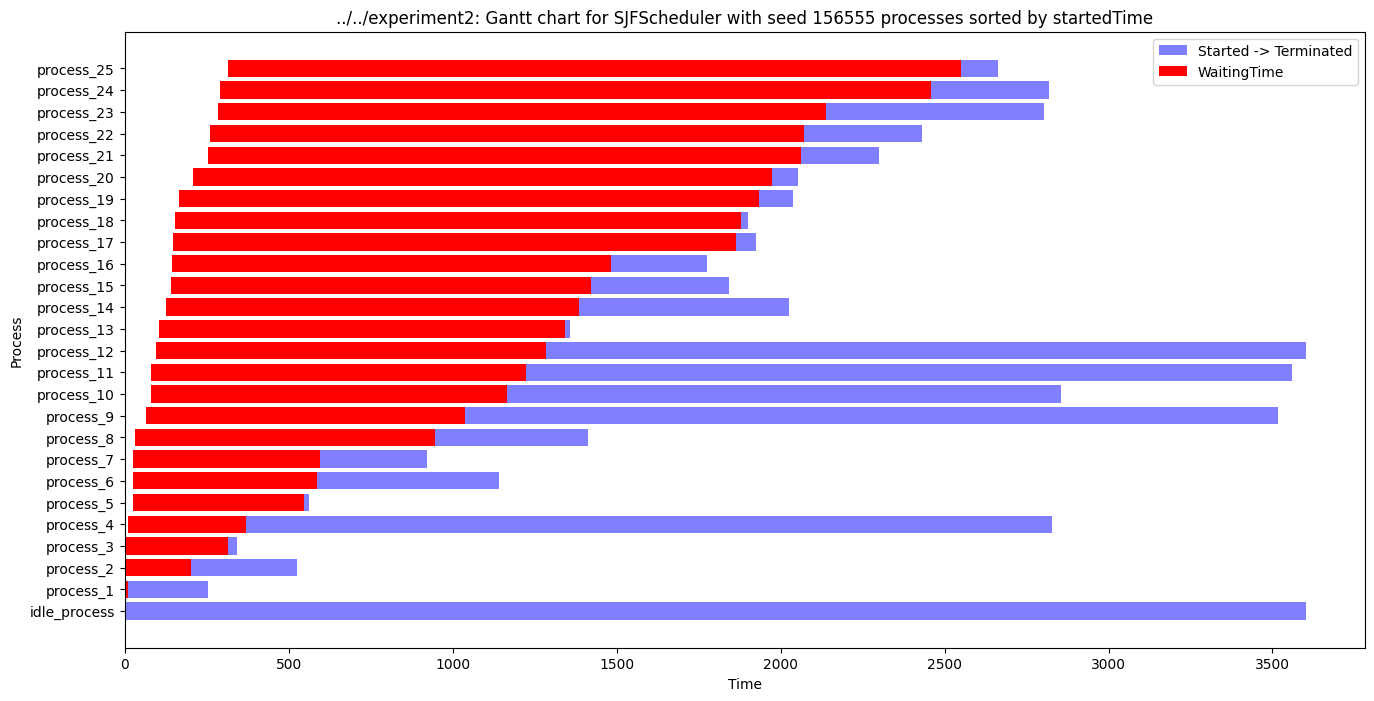

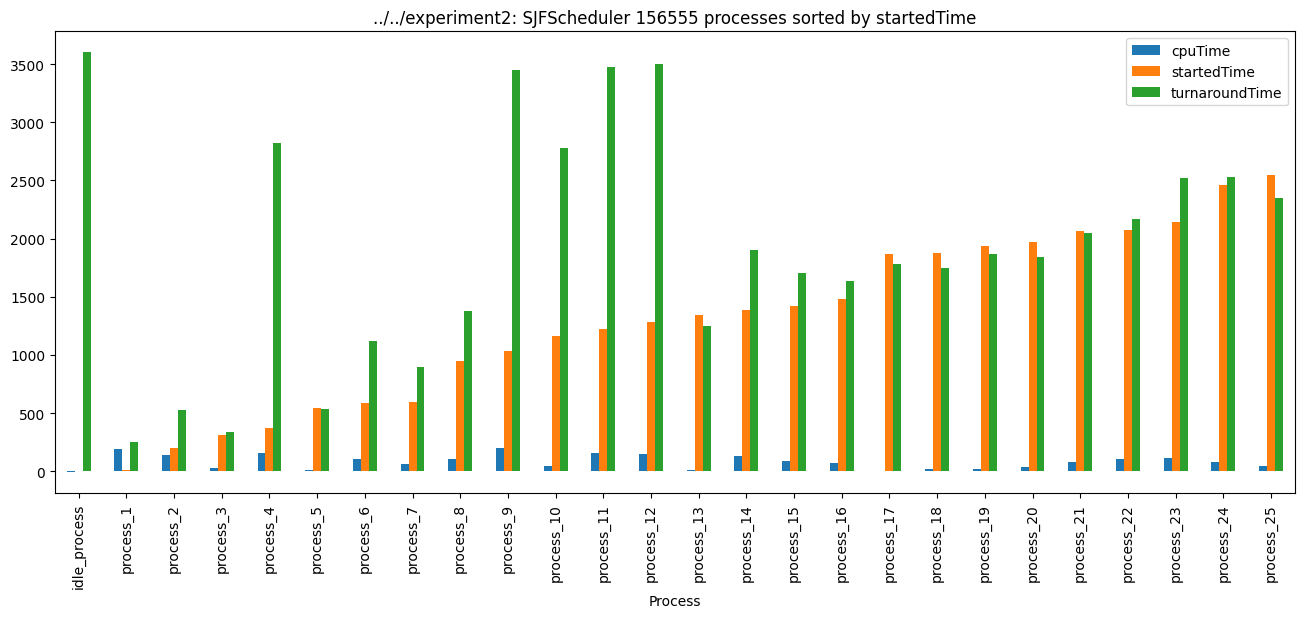

In [219]:
seed = '156555'

for scheduler in schedulers:
    
	analyze_and_display_results(exp2, scheduler, seed)

RESULT WHEN SEED IS {1222}

CPU Utilization for FeedbackRRScheduler: 99.907%
CPU Utilization for RRScheduler: 98.997%
CPU Utilization for FcfsScheduler: 98.987%
CPU Utilization for IdealSJFScheduler: 99.003%
CPU Utilization for SJFScheduler: 99.001%


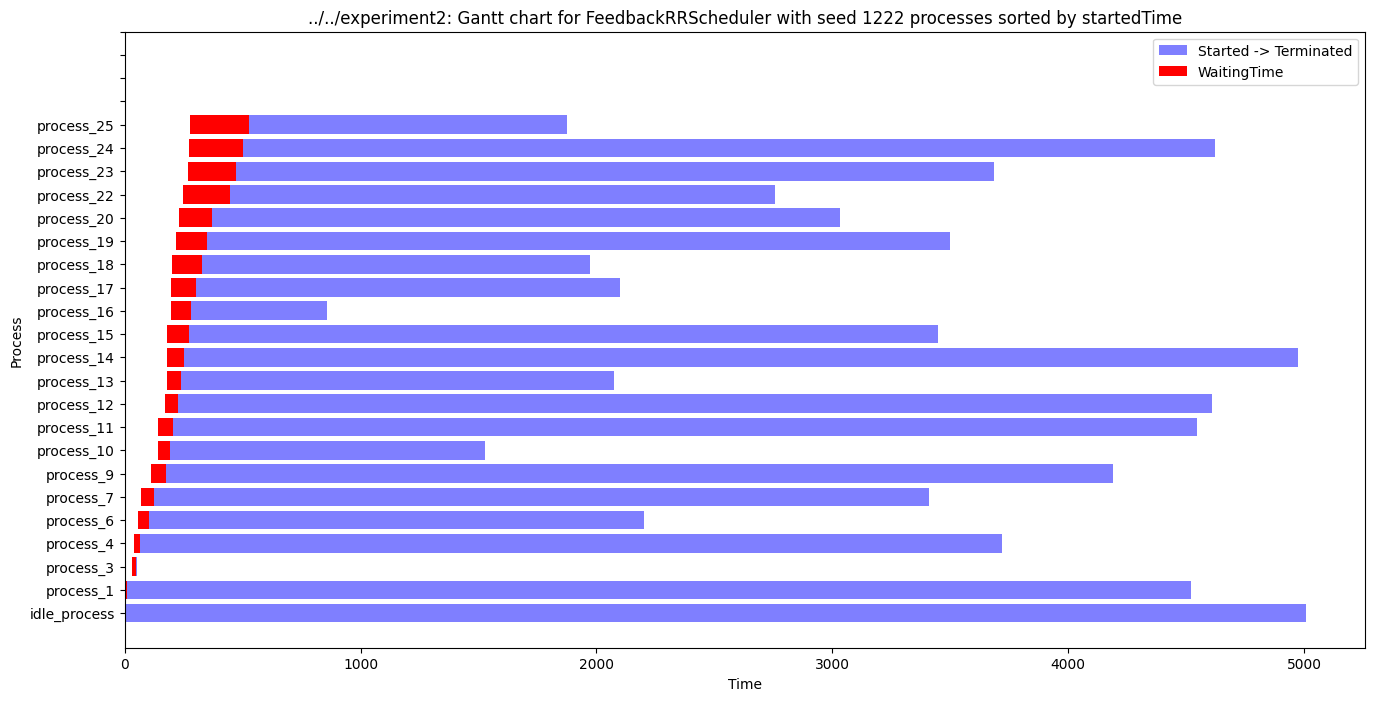

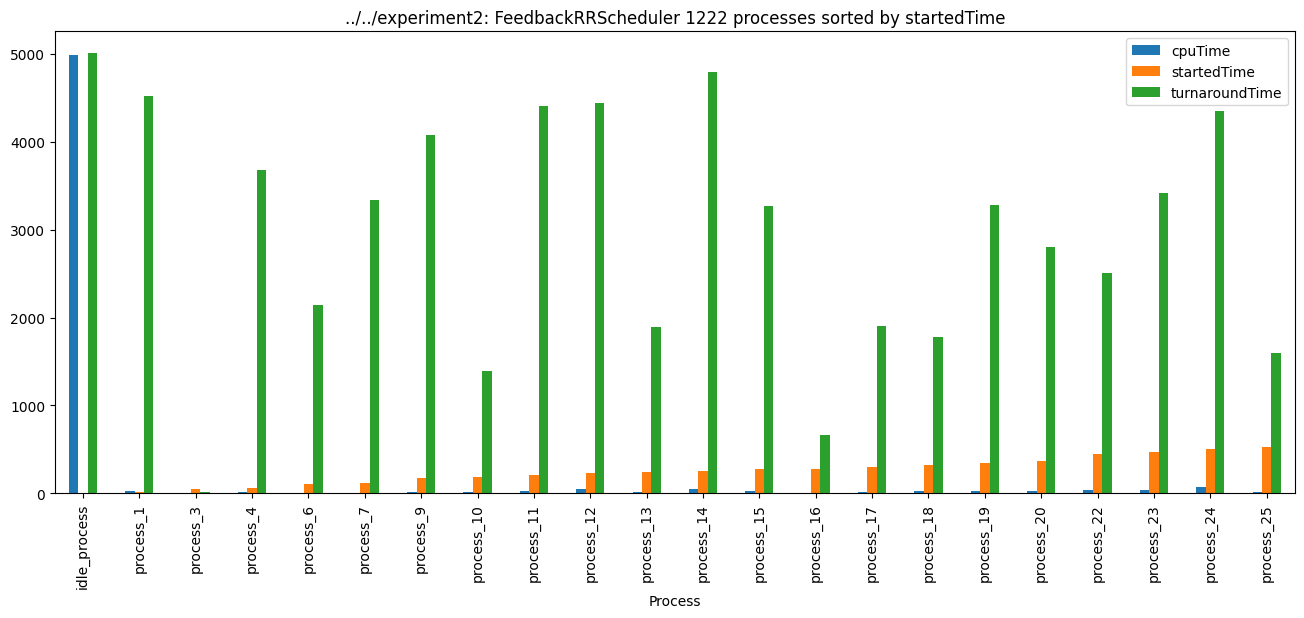

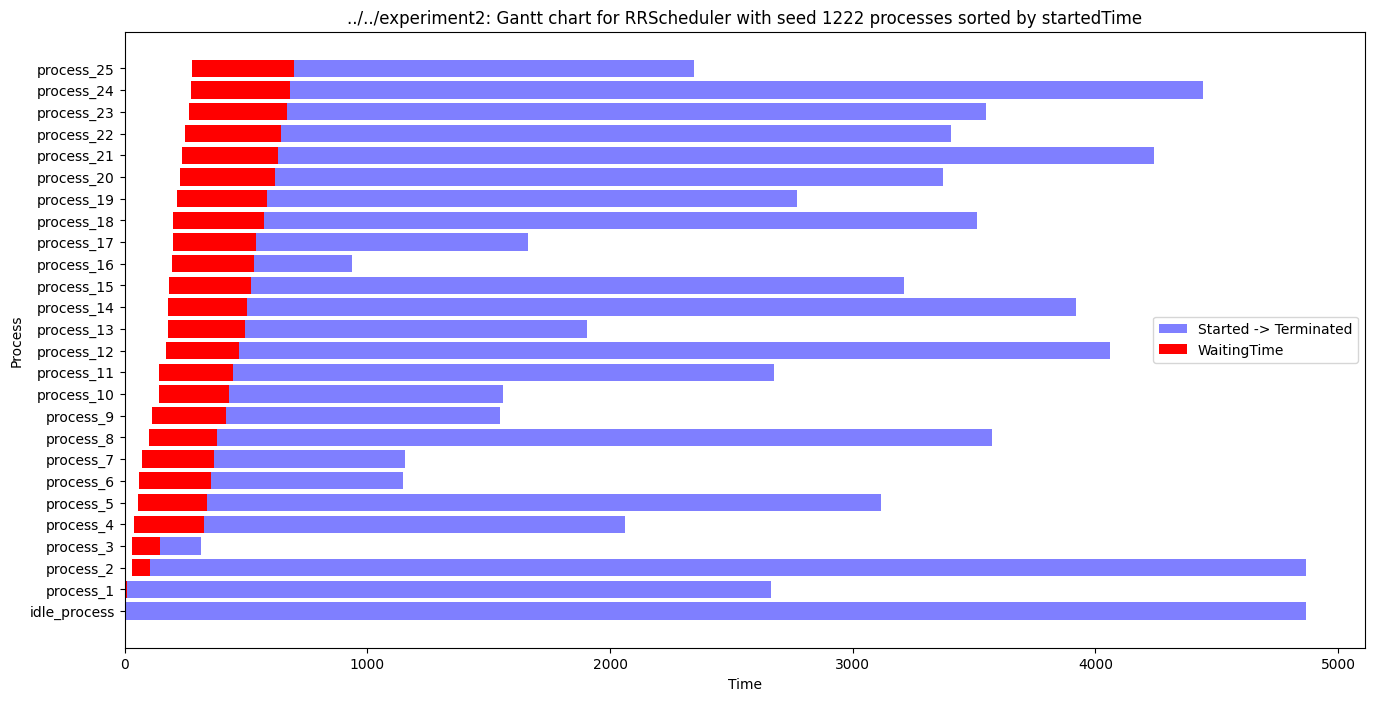

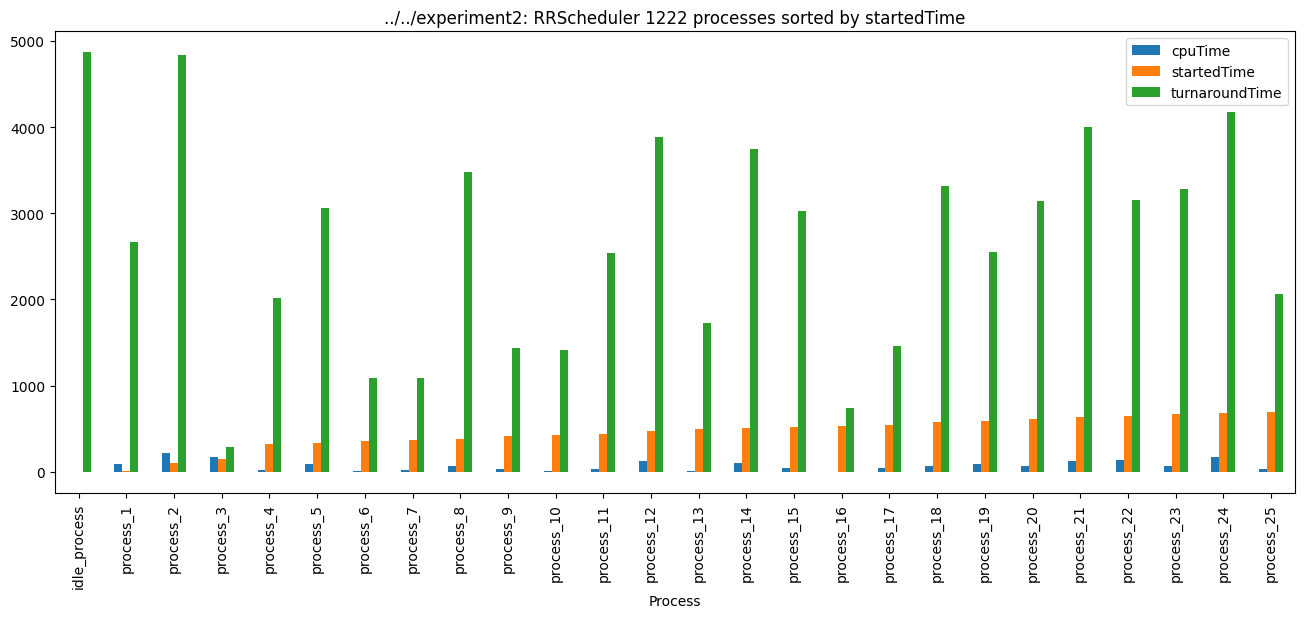

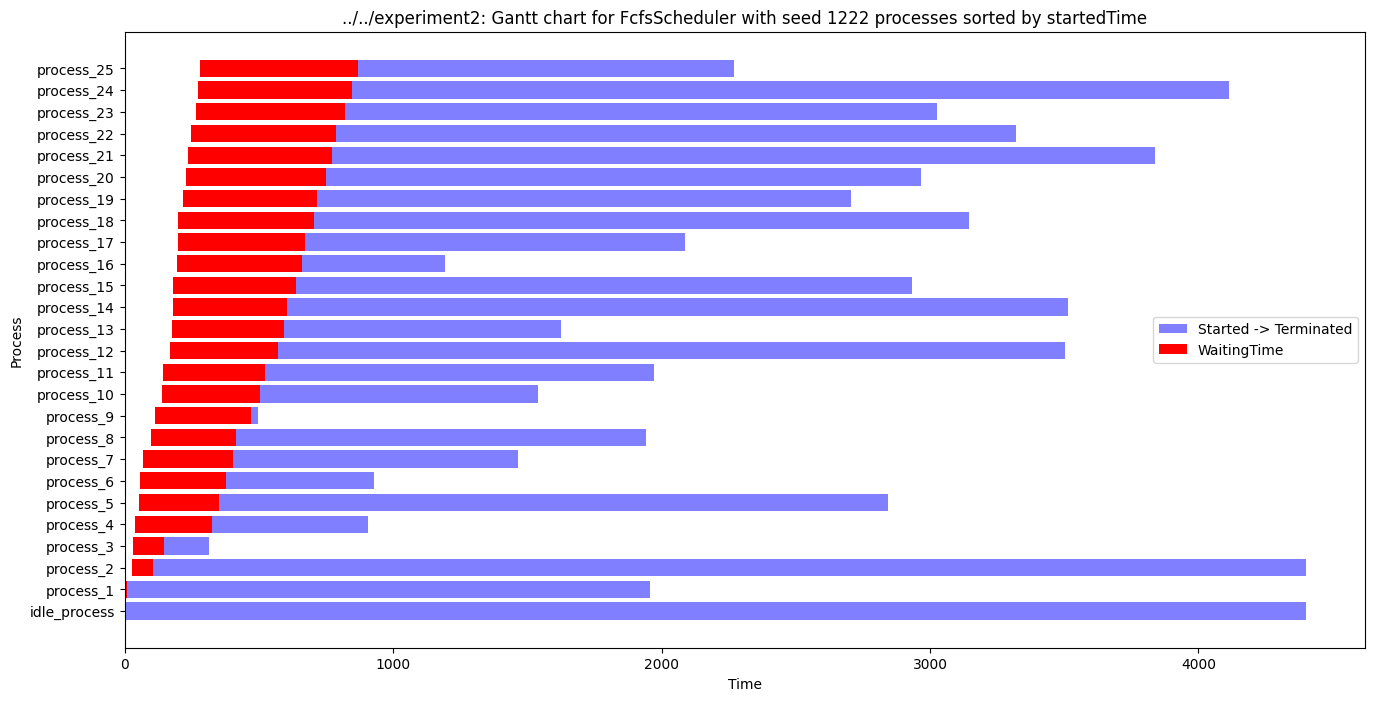

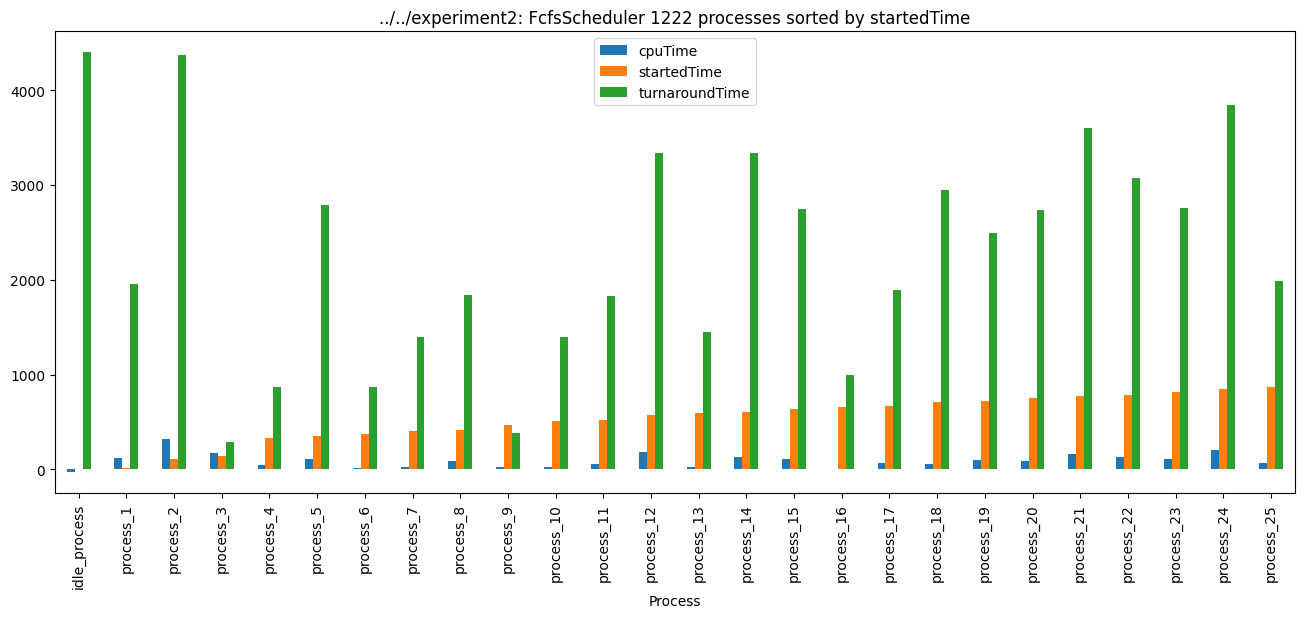

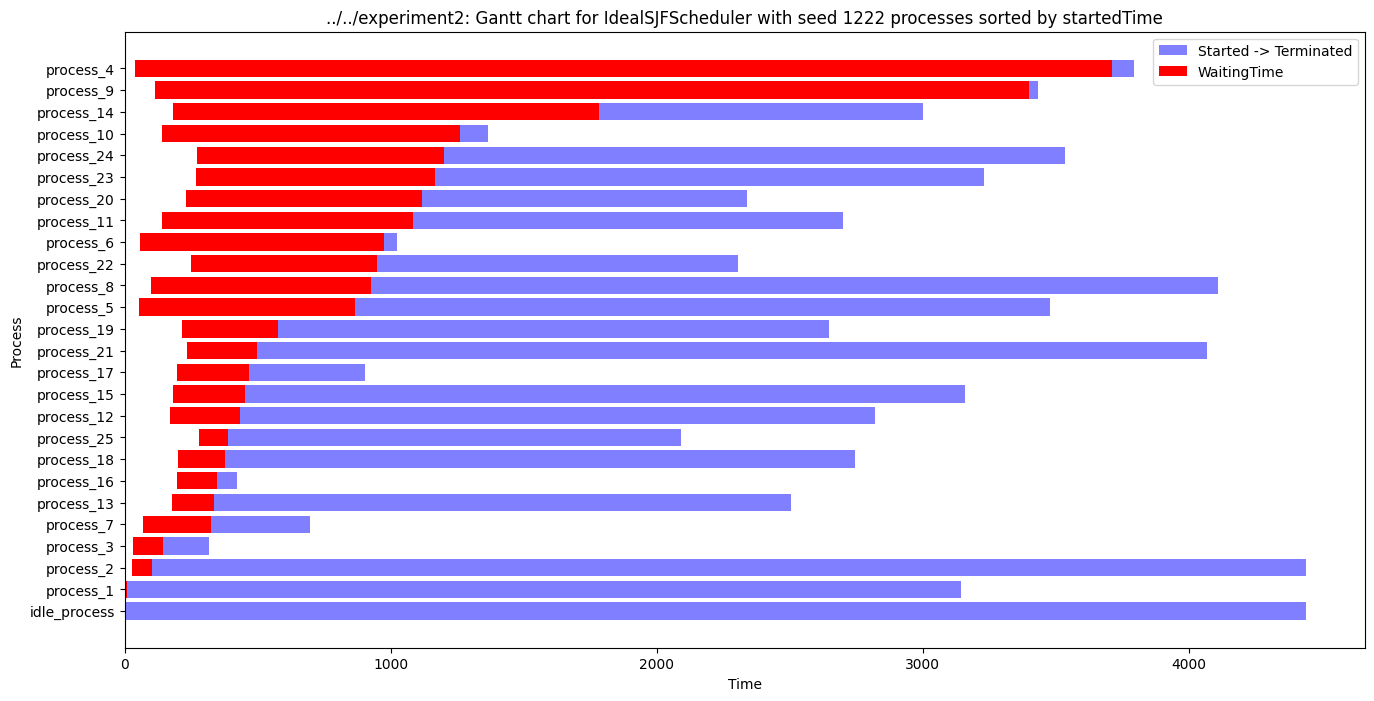

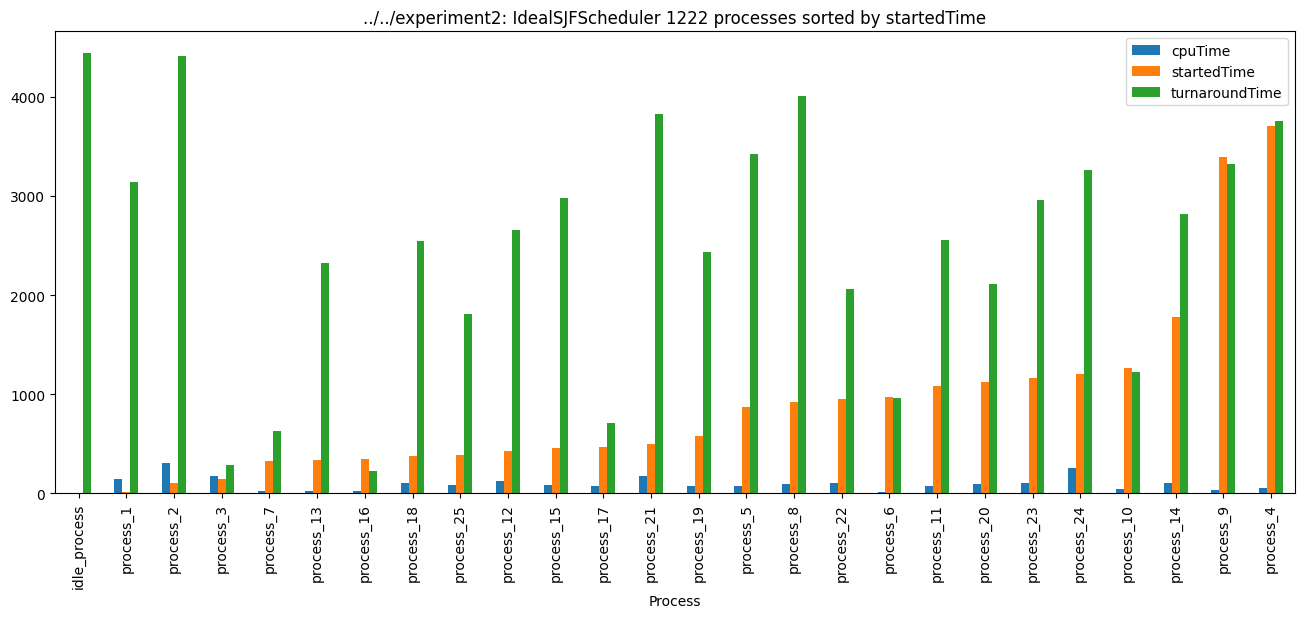

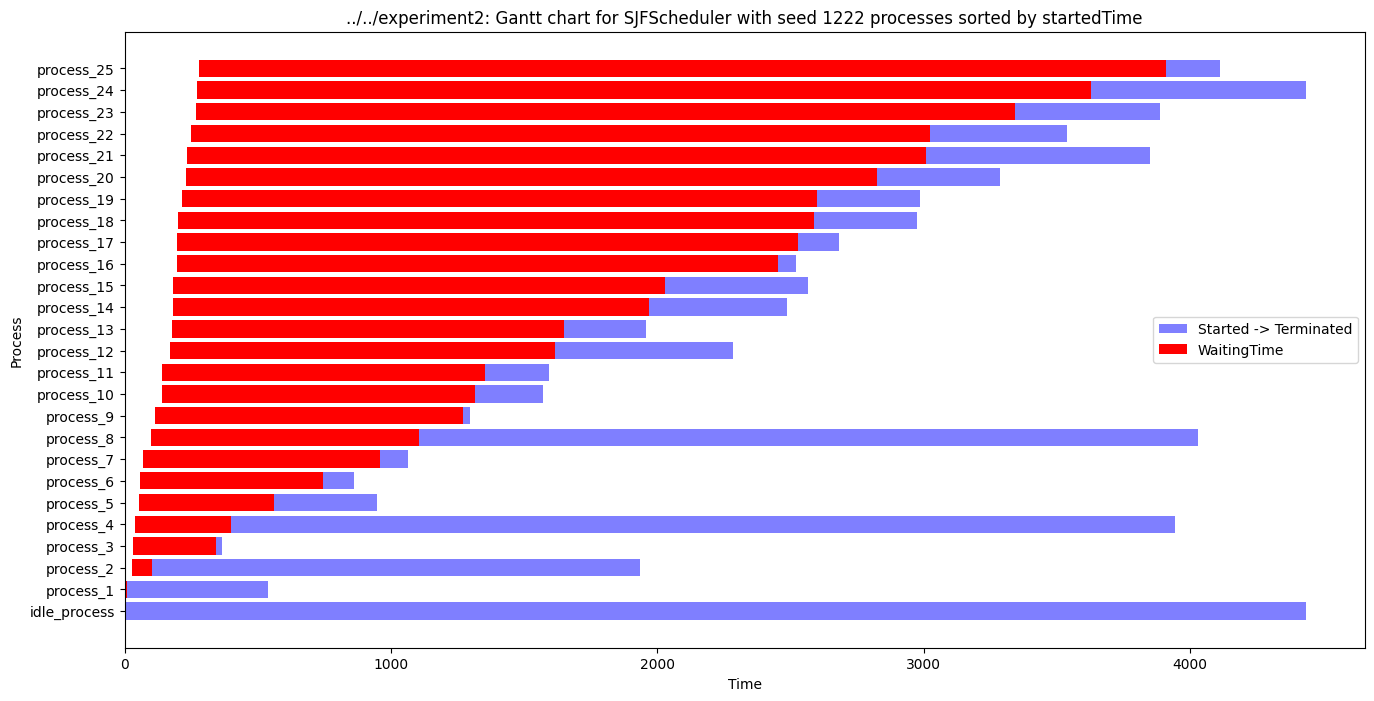

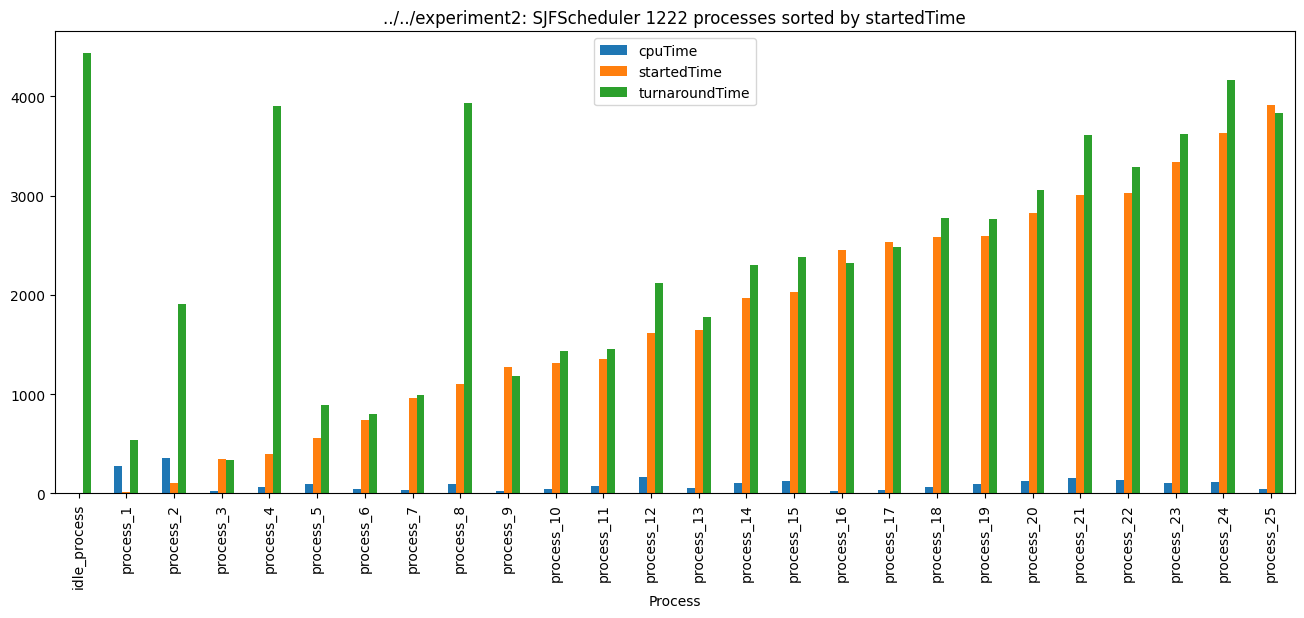

In [220]:
seed = '1222'

for scheduler in schedulers:
	analyze_and_display_results(exp2, scheduler, seed)

RESULT when seed {5669}

CPU Utilization for FeedbackRRScheduler: 98.989%
CPU Utilization for RRScheduler: 98.999%
CPU Utilization for FcfsScheduler: 98.998%
CPU Utilization for IdealSJFScheduler: 99.003%
CPU Utilization for SJFScheduler: 98.974%


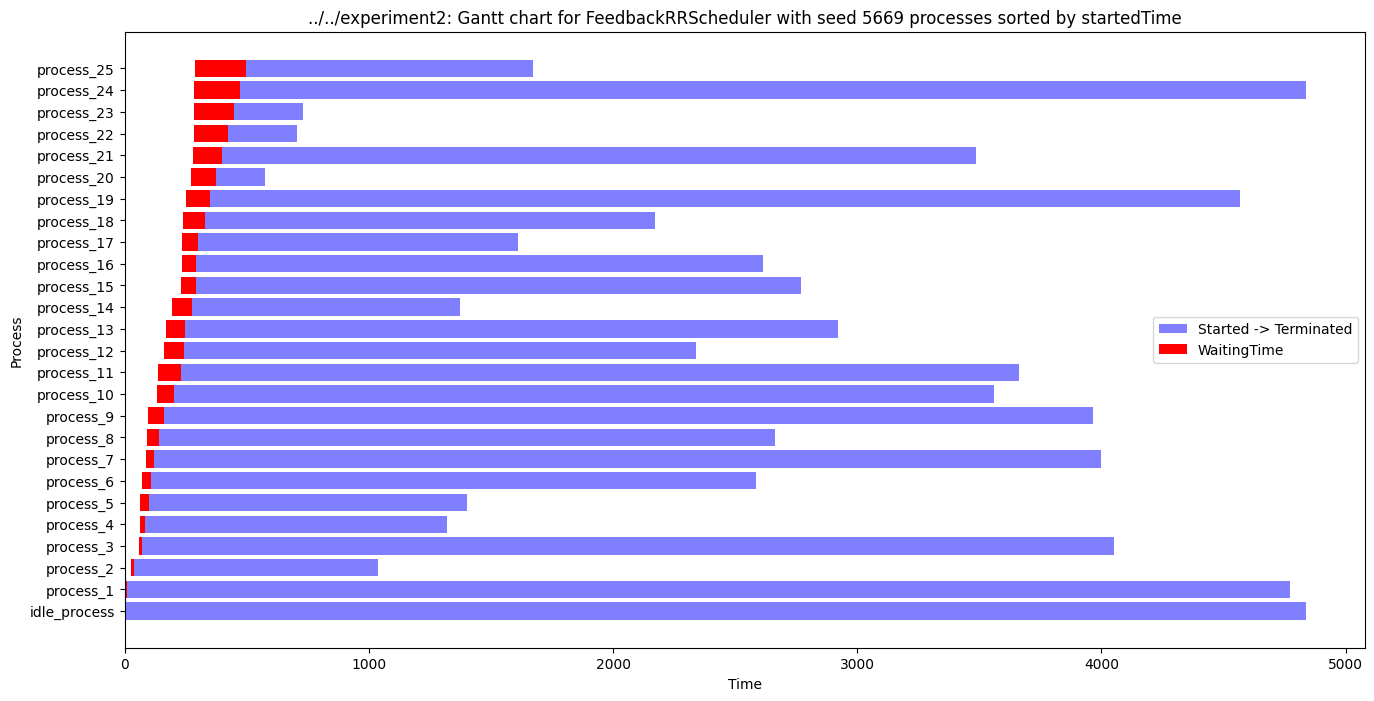

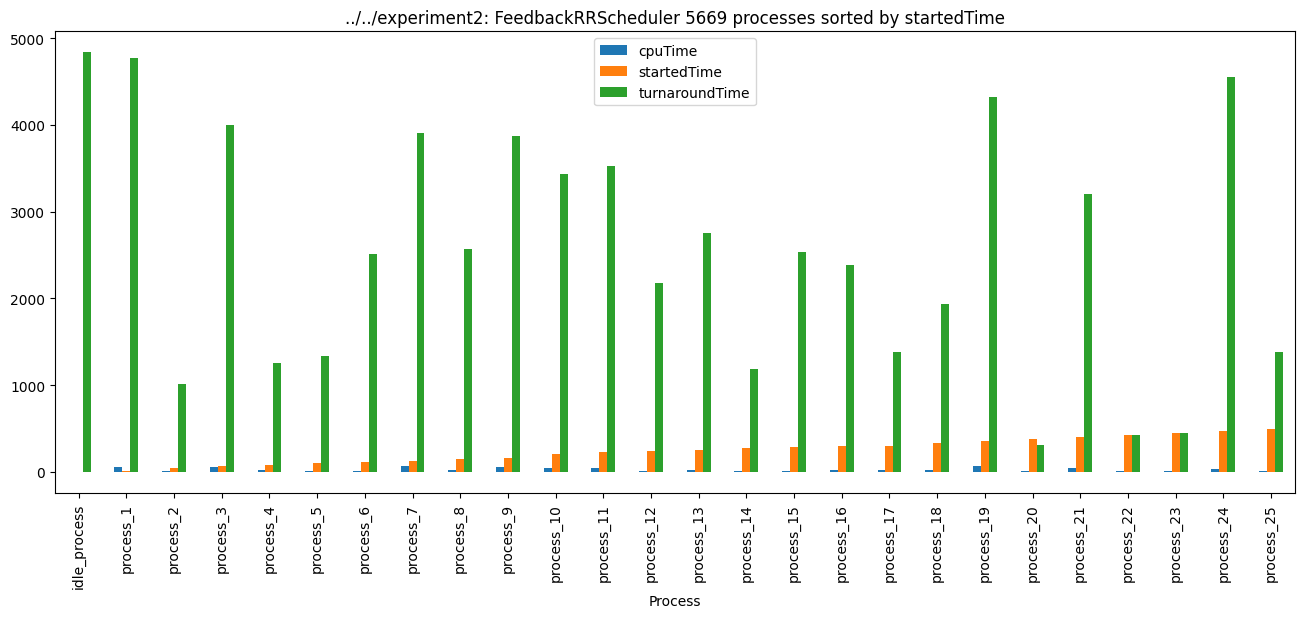

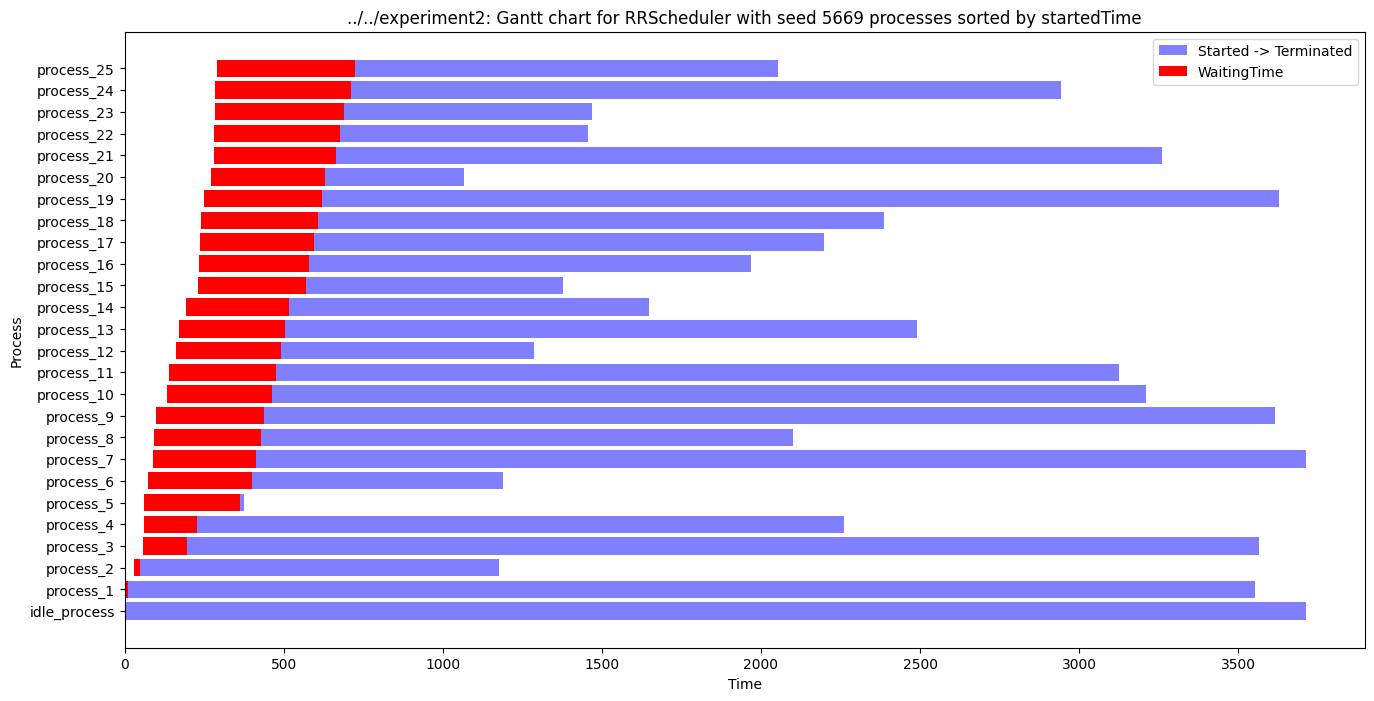

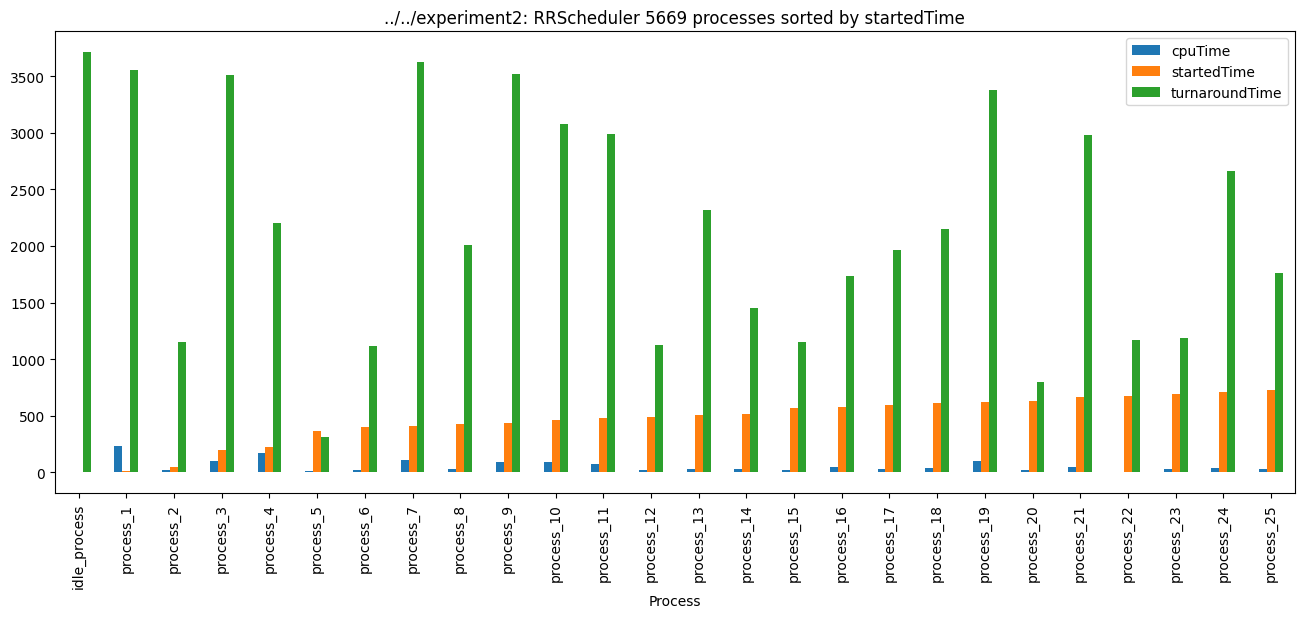

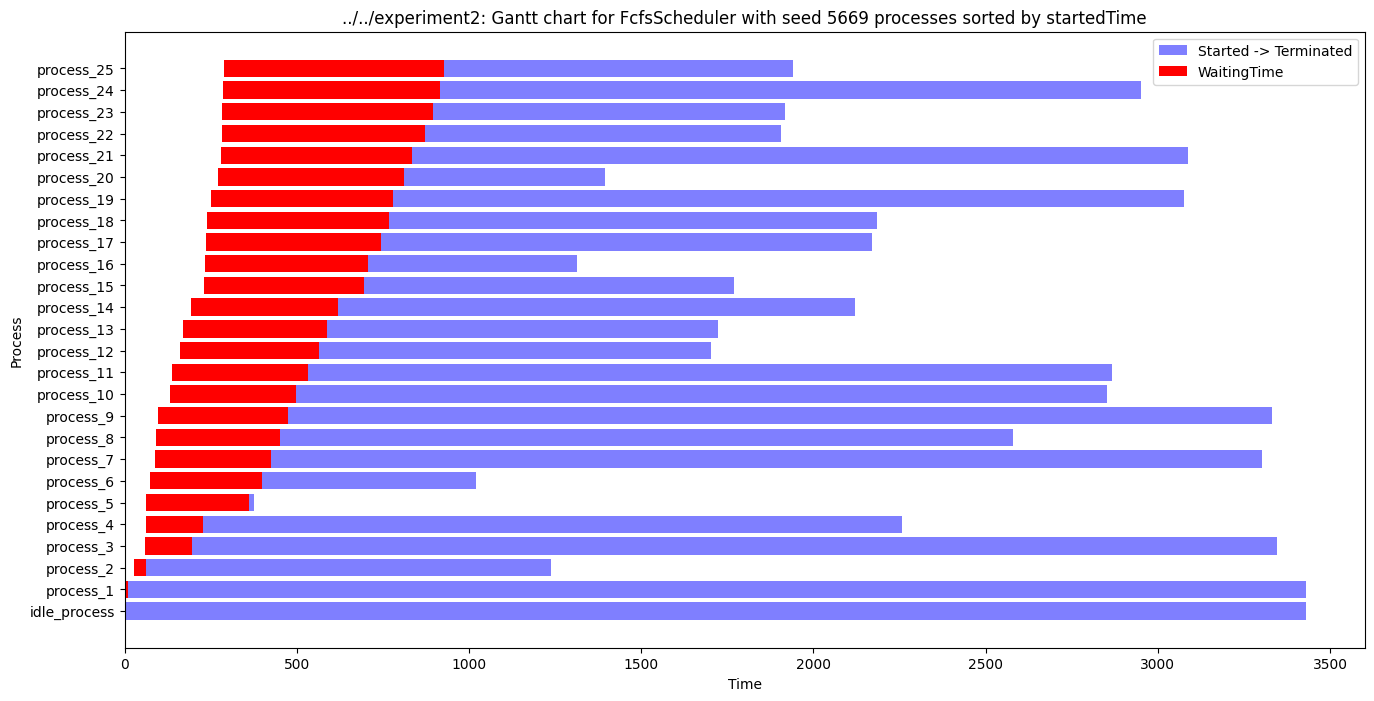

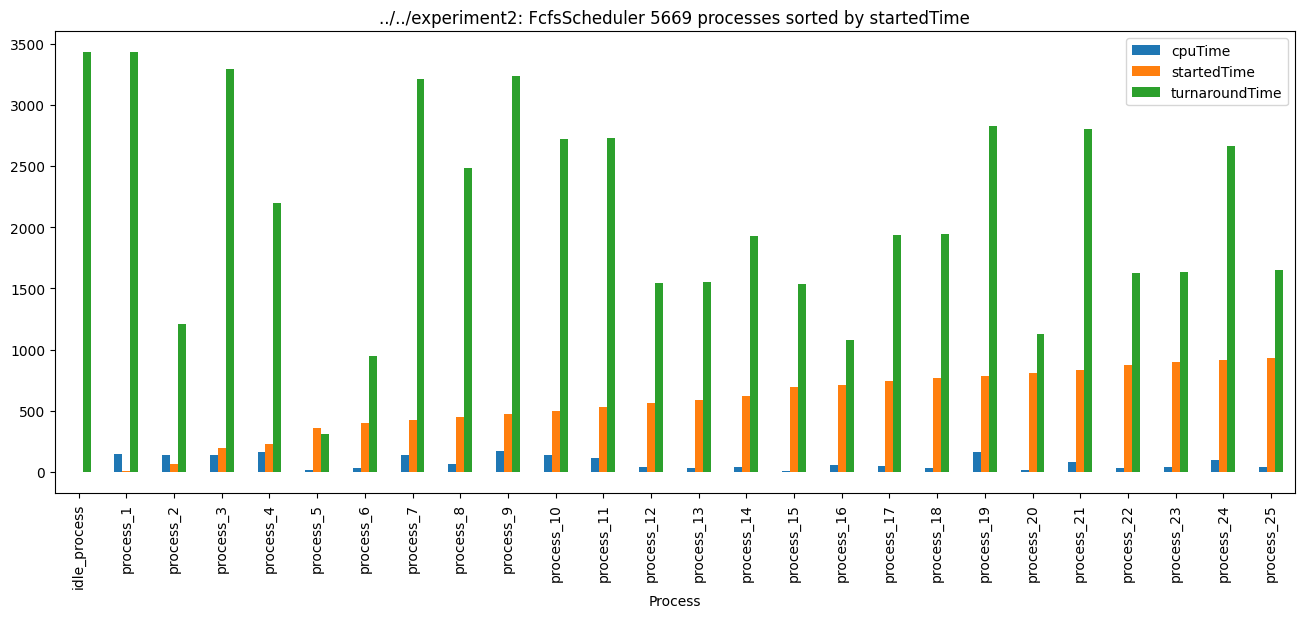

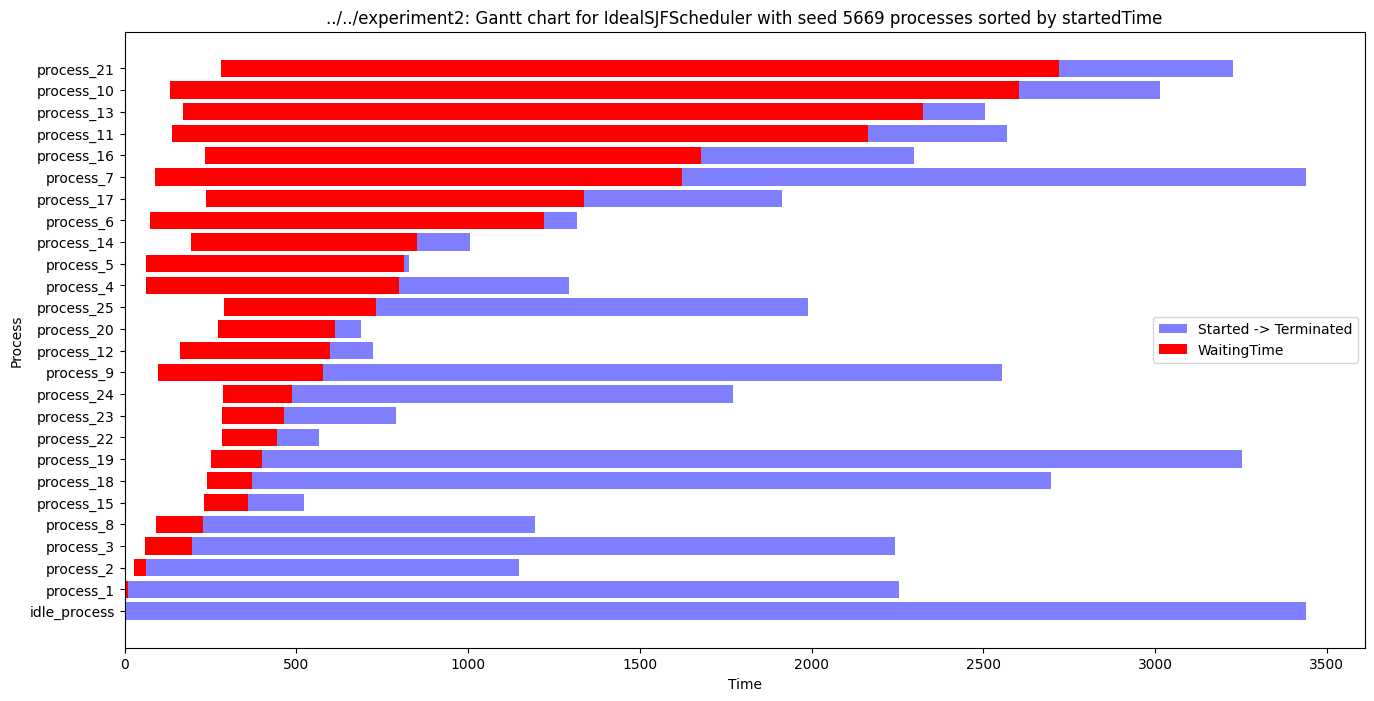

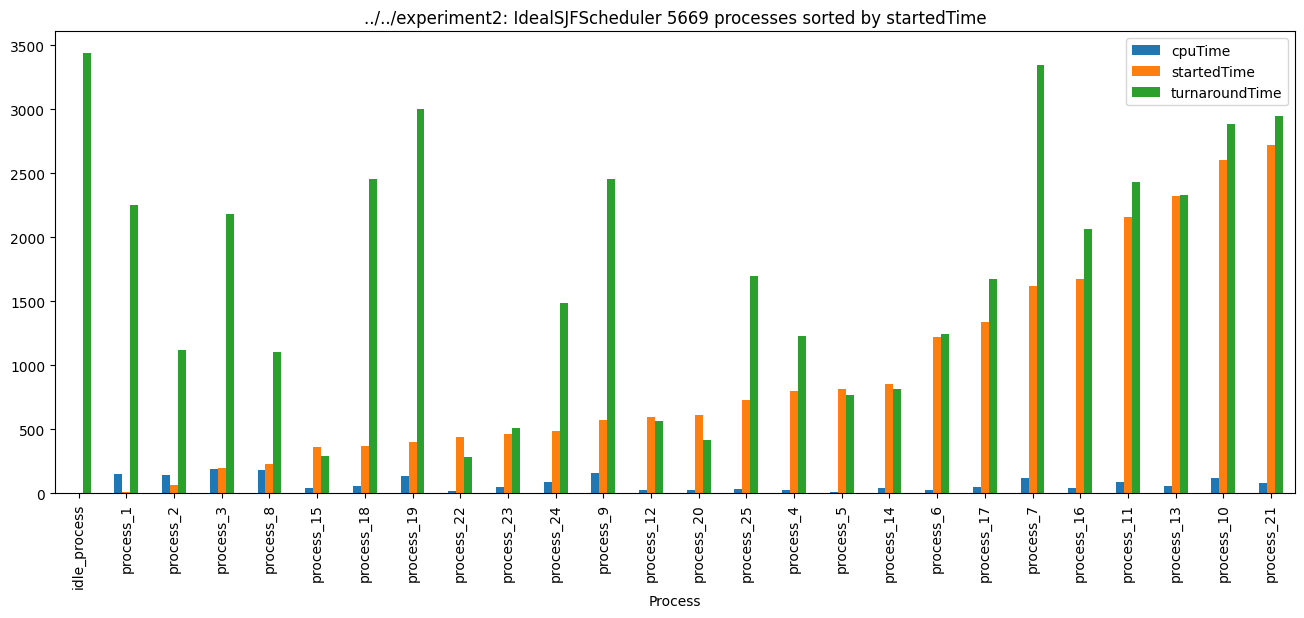

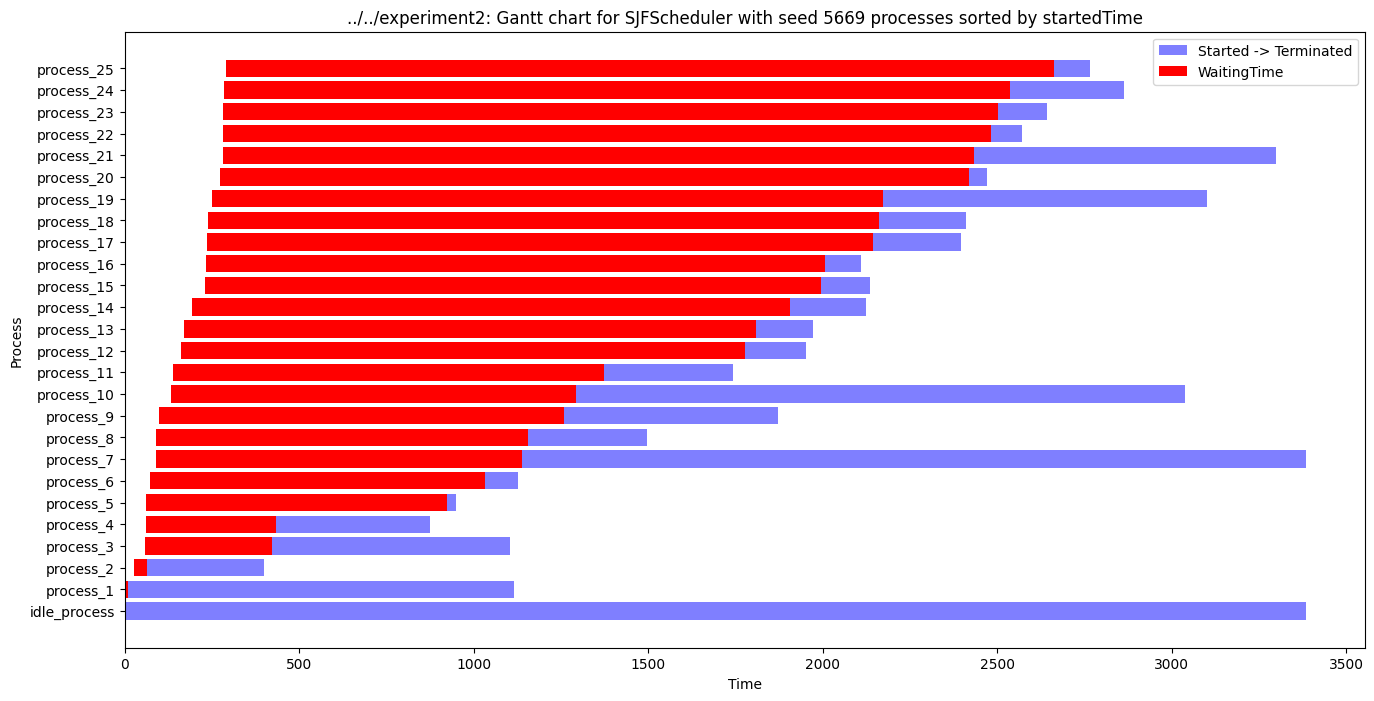

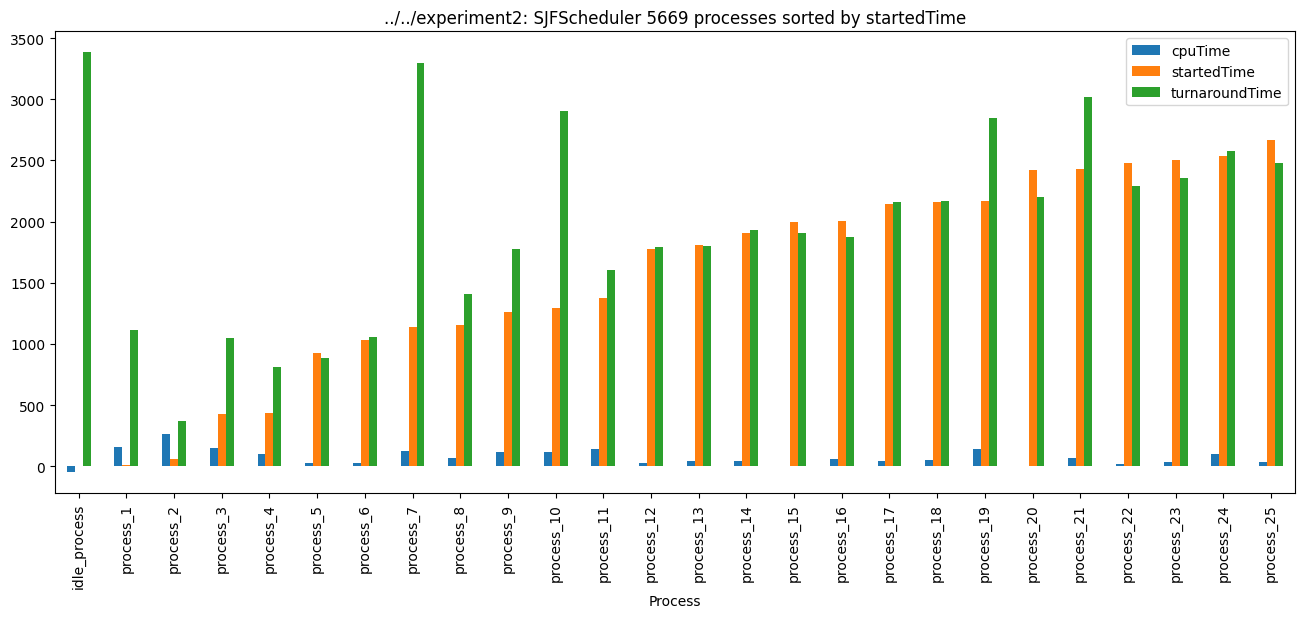

In [221]:
seed = '5669'

for scheduler in schedulers:
	analyze_and_display_results(exp2, scheduler, seed)

In [222]:
## This is the result of the experiment
results

Seed            Scheduler  MeanWaitingTime  MeanTurnaroundTime  \
0   123422  FeedbackRRScheduler      2411.346154         2443.961538   
1   123422          RRScheduler      1761.730769         1821.230769   
2   123422        FcfsScheduler      1635.730769         1721.769231   
3   123422    IdealSJFScheduler      1551.884615         1636.115385   
4   123422         SJFScheduler      1532.269231         1618.307692   
5    94111  FeedbackRRScheduler      2852.807692         2885.076923   
6    94111          RRScheduler      2463.538462         2530.038462   
7    94111        FcfsScheduler      2245.500000         2332.307692   
8    94111    IdealSJFScheduler      1985.961538         2072.115385   
9    94111         SJFScheduler      1762.884615         1847.461538   
10  156555  FeedbackRRScheduler      2507.384615         2553.730769   
11  156555          RRScheduler      2307.653846         2376.115385   
12  156555        FcfsScheduler      1941.423077         2031.807692   
13  156555    IdealSJFScheduler      1883.538462         1973.269231   
14  156555         SJFScheduler      1833.692308         1923.730769   
15    1222  FeedbackRRScheduler      2709.181818         2967.000000   
16    1222          RRScheduler      2574.461538         2656.230769   
17    1222        FcfsScheduler      2188.923077         2291.192308   
18    1222    IdealSJFScheduler      2391.115385         2495.692308   
19    1222         SJFScheduler      2292.346154         2396.730769   
20    5669  FeedbackRRScheduler      2506.730769         2538.500000   
21    5669          RRScheduler      2114.961538         2176.961538   
22    5669        FcfsScheduler      2033.846154         2117.269231   
23    5669    IdealSJFScheduler      1648.730769         1730.961538   
24    5669         SJFScheduler      1884.000000         1963.730769   

    MeanResponseTime  CpuUtilization  
0          71.653846       98.974046  
1         261.038462       98.986706  
2         378.423077       98.996086  
3         628.038462       98.992489  
4        1098.269231       98.996086  
5         103.500000       98.989297  
6         338.115385       98.988990  
7         382.653846       98.990830  
8         762.576923       98.987348  
9        1333.692308       98.976663  
10         83.615385       98.980714  
11        277.538462       98.993750  
12        393.000000       98.995392  
13        836.461538       98.996749  
14       1146.653846       98.995835  
15         95.045455       99.906693  
16        294.384615       98.997335  
17        377.230769       98.986716  
18        733.692308       99.003240  
19       1596.653846       99.001218  
20         75.846154       98.989164  
21        299.961538       98.999302  
22        389.307692       98.997989  
23        747.730769       99.002554  
24       1379.846154       98.973587

Next, computing the average values for each performance metric across all scheduling algorithms, taking into account the data from all five seeds.


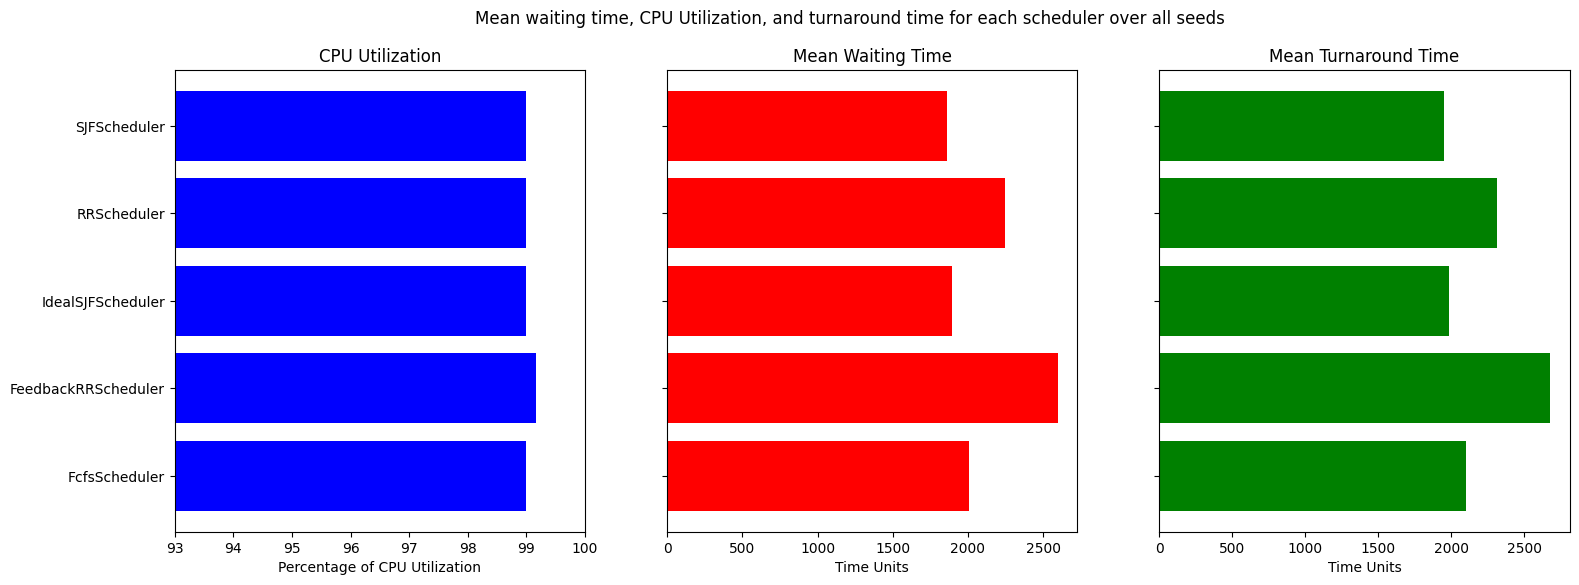

In [223]:
# Convert all columns that should be numeric to numeric types
for col in results.columns:
    # This is assuming that 'Scheduler' is a categorical column and should not be converted
    if col != 'Scheduler':
        results[col] = pd.to_numeric(results[col], errors='coerce')

# Now that the DataFrame is cleaned, calculate means and standard deviations
means = results.groupby(['Scheduler']).mean()
stds = results.groupby(['Scheduler']).std()

# Proceed with your plotting code
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all')


fig.set_size_inches(18, 6)
fig.suptitle("Mean waiting time, CPU Utilization, and turnaround time for each scheduler over all seeds")

# CPU Utilization
ax1.set_xlabel("Percentage of CPU Utilization")
ax1.barh(means.index, means['CpuUtilization'], color='b')
ax1.set_title("CPU Utilization")
ax1.set_xlim(93, 100)  # Using set_xlim instead of set_xbound

# Mean Waiting Time
ax2.set_xlabel("Time Units")
ax2.barh(means.index, means['MeanWaitingTime'], color='r')
ax2.set_title("Mean Waiting Time")

# Mean Turnaround Time
ax3.set_xlabel("Time Units")  # Only need to set x labels once per axis
ax3.barh(means.index, means['MeanTurnaroundTime'], color='g')
ax3.set_title("Mean Turnaround Time")

plt.show()
plt.show()

The graph presents a comparative analysis of various scheduling algorithms based on three metrics: CPU Utilization, Mean Waiting Time, and Mean Turnaround Time, aggregated over all seeds. The FeedbackRRScheduler, while not achieving the highest CPU utilization, still shows competitive performance. Notably, the IdealSJFScheduler exhibits superior CPU utilization, which may suggest a more efficient handling of processes. On the other hand, the Mean Waiting Time and Mean Turnaround Time metrics are considerably higher for the FcfsScheduler, indicating potential inefficiencies in its process handling strategy. These extended times could be symptomatic of the "convoy effect," where short processes wait for long ones to complete. Conversely, the IdealSJFScheduler and SJFScheduler appear to demonstrate a more optimized scheduling strategy, with lower averages in waiting and turnaround times, highlighting their effectiveness in process management and faster throughput.

CPU UTILISATION COMPARISON

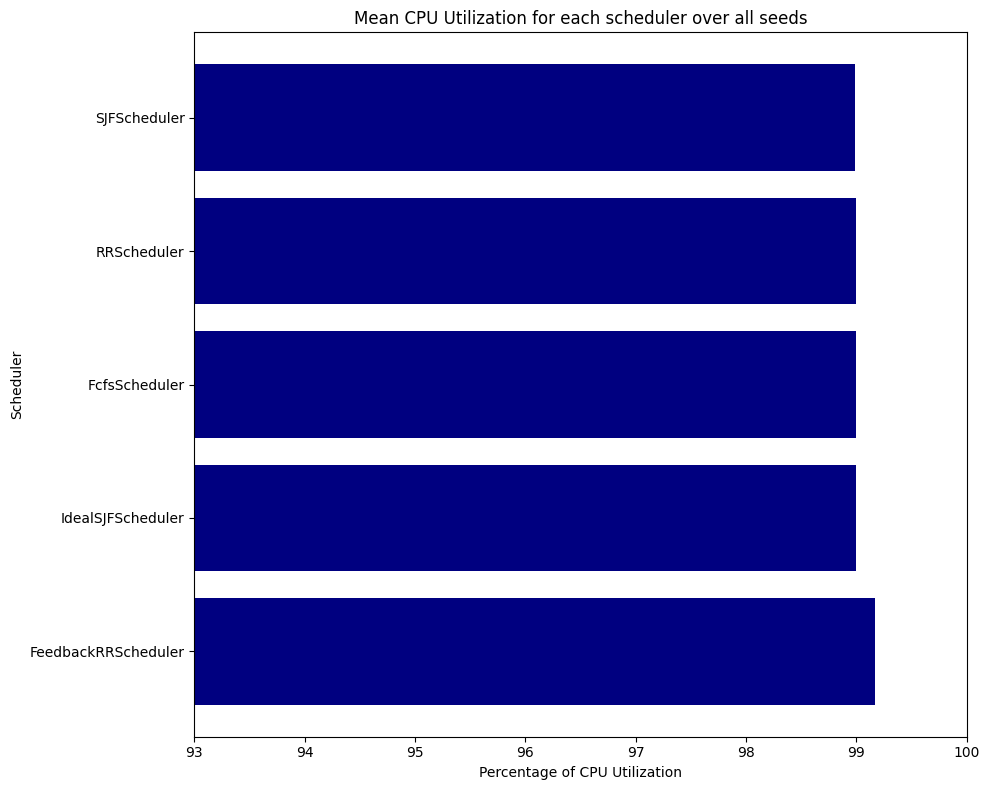

In [224]:
import matplotlib.pyplot as plt

# Creating a DataFrame for CPU utilization and sorting it
utilization_sorted = means[['CpuUtilization']].sort_values(by='CpuUtilization', ascending=False)

# Plotting CPU Utilization
plt.figure(figsize=(10, 8))
plt.barh(utilization_sorted.index, utilization_sorted['CpuUtilization'], color='navy')
plt.xlabel('Percentage of CPU Utilization')
plt.ylabel('Scheduler')
plt.title('Mean CPU Utilization for each scheduler over all seeds')
plt.xlim([93, 100])  # Setting the limits for the x-axis
plt.tight_layout()  # Adjusting subplot params for a better fit
plt.show()


The graph showcases the average CPU utilization for various schedulers across all seeds.
firts off they look quite similar, It’s clear that the IdealSJFScheduler and RRScheduler outperform others in terms of CPU utilization, suggesting they are more efficient in keeping the CPU active. The FeedbackRRScheduler has the lowest CPU utilization, indicating potential inefficiencies or a different operational strategy, which may prioritize other metrics over CPU activity. This visualization effectively highlights the differences in CPU utilization across the different scheduling strategies.

In [225]:
utilization_sorted

CpuUtilization
Scheduler                          
FeedbackRRScheduler       99.167983
IdealSJFScheduler         98.996476
FcfsScheduler             98.993403
RRScheduler               98.993216
SJFScheduler              98.988678

ANALISIS:

In the provided table, the FeedbackRRScheduler shows the highest CPU utilization at approximately 99.17%, slightly edging out the other schedulers. The IdealSJFScheduler follows closely at around 99%, which is about 0.17% lower than the FeedbackRRScheduler. The FcfsScheduler and RRScheduler are virtually tied, with the RRScheduler trailing by a minuscule 0.0087%. The SJFScheduler has the lowest CPU utilization among the group at approximately 98.99%, which is only about 0.18% less than the leading FeedbackRRScheduler. These percentages reflect a tight competition between the algorithms, with none showing a vastly superior CPU utilization rate over the others.

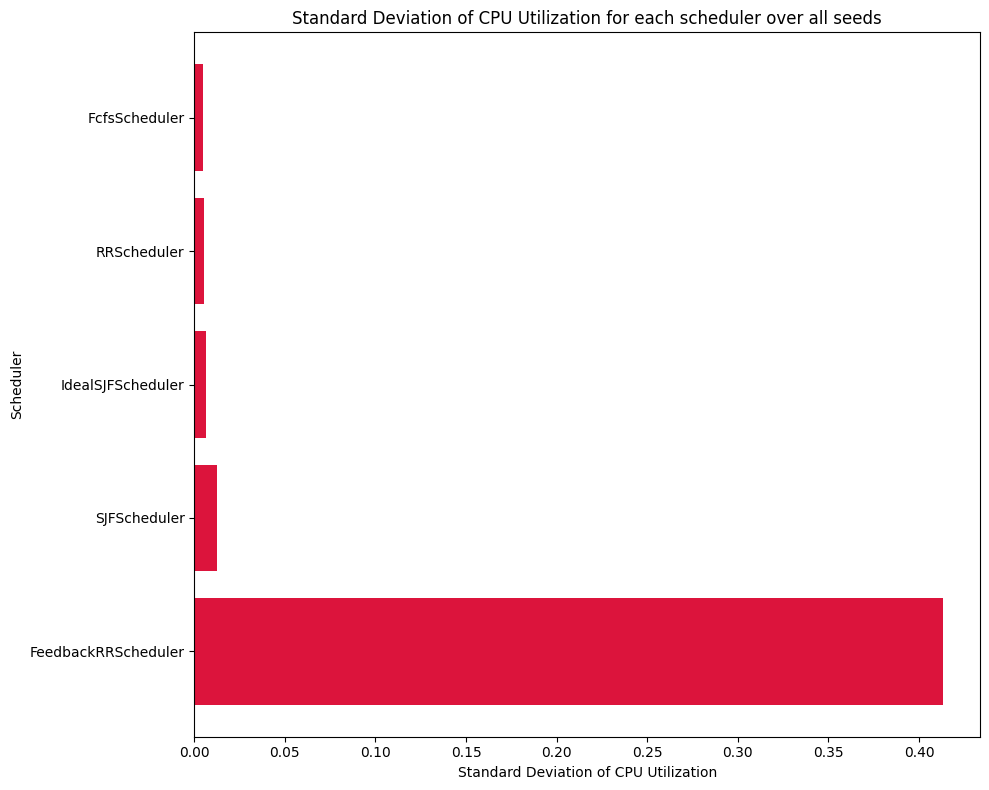

StdDeviation
Scheduler                        
FeedbackRRScheduler      0.413001
SJFScheduler             0.012604
IdealSJFScheduler        0.006745
RRScheduler              0.005351
FcfsScheduler            0.004569

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stds' is a DataFrame with standard deviations of CPU utilizations
# Sort the standard deviations and prepare the DataFrame for plotting
cpu_utilization_std_sorted = stds[['CpuUtilization']].rename(
    columns={'CpuUtilization': 'StdDeviation'}
).sort_values(by='StdDeviation', ascending=False)

# Plot the sorted standard deviations
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
plt.barh(cpu_utilization_std_sorted.index, cpu_utilization_std_sorted['StdDeviation'], color='crimson')
plt.xlabel('Standard Deviation of CPU Utilization')
plt.ylabel('Scheduler')
plt.title('Standard Deviation of CPU Utilization for each scheduler over all seeds')
plt.tight_layout()  # Adjust subplot parameters
plt.show()

# Display the DataFrame
cpu_utilization_std_sorted


ANALYSIS

The bar graph illustrates the standard deviation of CPU utilization across different scheduling algorithms, offering insight into their consistency across all seeds. The FeedbackRRScheduler shows the highest variability in CPU utilization, as evidenced by the longest bar, suggesting that its performance is less consistent compared to the others. In contrast, the SJFScheduler and IdealSJFScheduler exhibit the least variation, implying a more predictable and stable CPU utilization. The RRScheduler and FcfsScheduler have moderate variability, falling between the two extremes. Overall, the graph highlights the relative stability of each scheduling algorithm's performance in terms of CPU usage.

Evaluating Mean Turnaround Duration

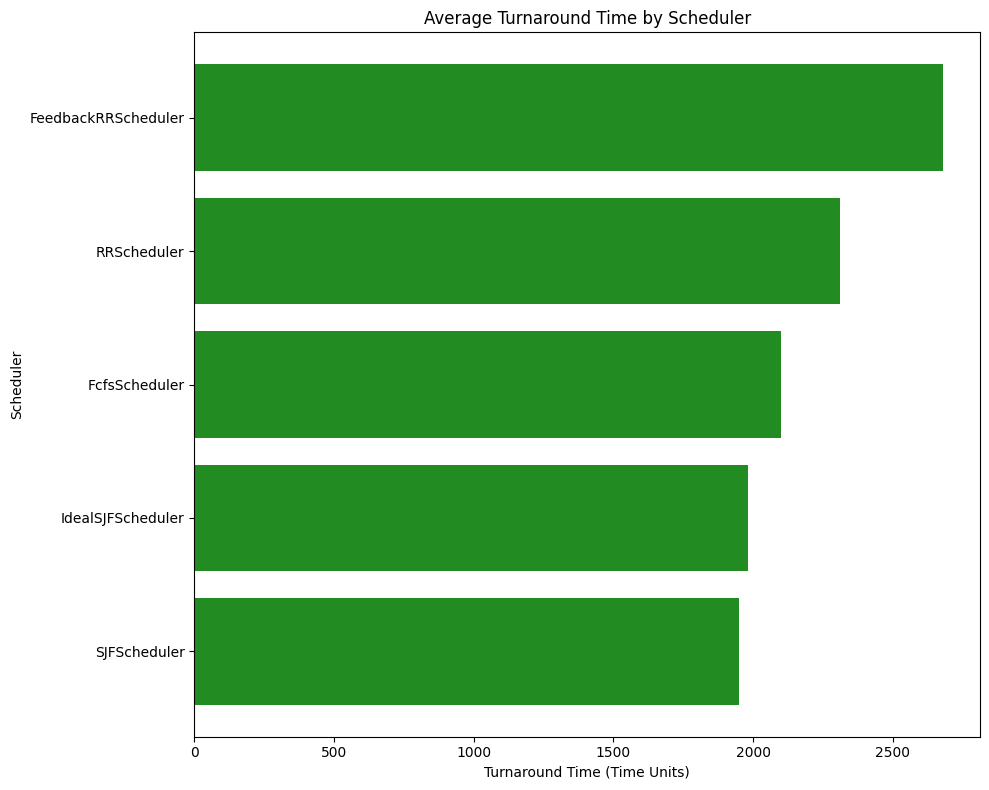

MeanTurnaroundTime
Scheduler                              
SJFScheduler                1949.992308
IdealSJFScheduler           1981.630769
FcfsScheduler               2098.869231
RRScheduler                 2312.115385
FeedbackRRScheduler         2677.653846

In [227]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'means' is a DataFrame with mean values for different metrics
# Extracting and sorting the 'MeanTurnaroundTime' column
turnaround_sorted = means[['MeanTurnaroundTime']].sort_values(by='MeanTurnaroundTime', ascending=True)

# Plotting Mean Turnaround Time
plt.figure(figsize=(10, 8))  # Setting a larger figure size for better readability
plt.barh(turnaround_sorted.index, turnaround_sorted['MeanTurnaroundTime'], color='forestgreen')  # Using a color from the named color set
plt.xlabel('Turnaround Time (Time Units)')  # Specifying units for clarity
plt.ylabel('Scheduler')  # Labeling the y-axis
plt.title('Average Turnaround Time by Scheduler')  # Providing a more informative title
plt.tight_layout()  # Automatically adjust subplot parameters to fit the plot within the figure area
plt.show()

# Display the sorted turnaround time DataFrame
turnaround_sorted


ANALYSIS:

The bar graph depicts the average turnaround time for different schedulers. It indicates that the SJFScheduler has the shortest average turnaround time, which may suggest it's the most efficient at processing jobs quickly. The IdealSJFScheduler closely follows, indicating similar efficiency. On the other hand, the FeedbackRRScheduler exhibits the longest average turnaround time, which could imply that it's less efficient in terms of job completion time compared to the other algorithms. This comparison underscores the differences in performance among the scheduling algorithms with respect to how quickly they can execute and complete processes.

CONCLUSION:

Throughout this experiment,i have assessed various scheduling algorithms with a dual focus: optimizing CPU utilization and minimizing turnaround time. The data and graphs provided offered a clear insight into the performance of each scheduler across multiple seeds.

Our analysis began by examining CPU utilization, where it has been found that the FeedbackRRScheduler, despite having the highest standard deviation, led the field with the highest average CPU utilization. This high utilization suggests that the FeedbackRRScheduler is potentially more efficient in keeping the CPU busy. However, the high variance indicated by its standard deviation points to less predictability in its performance across different workloads.

On the other hand, the SJFScheduler and IdealSJFScheduler showed the most consistency in CPU utilization, with lower standard deviations indicating stable and predictable performance. While their CPU utilization was marginally less than the FeedbackRRScheduler, the low variability might make them preferable in environments where predictability is crucial.

Turning to turnaround times, the graph highlighted that the SJFScheduler had the shortest average, implying it was generally the most efficient at processing jobs. The IdealSJFScheduler closely followed, while the FeedbackRRScheduler lagged with longer turnaround times, suggesting a trade-off between high CPU utilization and process completion efficiency.

In conclusion, the experiment underscores that while the FeedbackRRScheduler excels at keeping the CPU active, it might not always translate to the most efficient job processing, as evidenced by its longer turnaround times. The SJFScheduler strikes a balance, offering the best of both worlds with efficient CPU usage and shorter turnaround times, making it an excellent candidate for systems prioritizing quick job completion. The IdealSJFScheduler also presents itself as a competent scheduler with both high CPU utilization and efficient turnaround time. Overall, this study provides valuable insights for system designers to choose a scheduler that best aligns with their operational priorities—whether it's to maximize CPU activity or to minimize job waiting times.

In [228]:
exp3 = Experiment('../experiment3')

INTRODUCTION:


Navigating through the intricacies of scheduling algorithms under the banner of "Optimizing Algorithm Performance and Burst Time Estimations for Unpredictable Workloads," the focus narrows to a more grounded approach. This study steers clear of the Ideal Shortest Job First scheduler, a tool adept at preempting the burst time of processes but less relevant to the unpredictable nature of the workloads in question. The non-preemptive version of the SJF scheduler, with its absence of preemptive action, becomes the subject of interest, offering a more authentic reflection of real-world unpredictability.

In this controlled environment, a thorough comparison of various schedulers is set to unfold, all under the pressures of highly unpredictable workloads. The cornerstone of this examination is a keen assessment of performance, with an eye toward enhancing the burst time estimation—an essential element of the SJF algorithm. The ultimate ambition is to dissect these findings, looking for avenues to elevate the efficiency and accuracy of scheduling in the face of uncertainty.

METHODOLOGY:

The analysis framework of this study is designed to scrutinize the operational efficacy of various scheduling algorithms amidst unpredictable and highly variable workloads. A comparative approach forms the cornerstone of this methodology, where both CPU Utilization and Response Time serve as primary metrics for assessment. By systematically evaluating these parameters across five distinct seeds, a comprehensive performance profile for each algorithm will be constructed.

Further, to augment the quantitative analysis, Gantt Charts will be meticulously reviewed for each algorithm. This qualitative examination will enable a visual comparison of performance, offering insights into the scheduling dynamics and process management of each algorithm. Through this dual-faceted analysis, the study aims to uncover the strengths and limitations inherent in each scheduling strategy, facilitating a deeper understanding of their behavior under the stress of unpredictability.

In [229]:
print(f"Seeds for Experiment 3: {exp3.all_seeds()}")

Seeds for Experiment 3: ['6297', '5122', '1244', '898320', '9999999']


Input Parameters:

For this experiment, the following input parameters will be employed across each of the aforementioned seeds.

In [230]:
exp3.input_parameters_seed[1][1].drop(['seed'])

value
param                   
numberOfProcesses     30
staticPriority         0
meanInterArrival      20
meanCpuBurst           5
meanIoBurst           35
meanNumberBursts       4

The chosen input parameters aim to generate highly unpredictable input data, characterized by a significant number of processes and considerable variance in CPU and IO burst times. A higher inter-arrival time has been selected to avoid excessively straining the scheduler; instead, the focus is on evaluating the scheduler's performance in scenarios where the nature of the workload is unknown. This approach is specifically tailored to explore ways to enhance burst time estimation in the context of unpredictable workloads.

SIMULATOR PARAMETERS: 

For this experiment, specific simulator parameters have been selected, highlighting an intentionally poor initial burst estimate alongside relatively high alpha burst times. The goal is to delve deeply into how these parameters affect burst time estimations and to identify potential optimizations that could refine their accuracy.

In [231]:
exp3.simulator_parameters[0].drop(['scheduler'])

value
param                      
timeLimit              5000
interruptTime            10
timeQuantum              20
initialBurstEstimate     30
alphaBurstEstimate      0.7
periodic              false

RESULTS:

In [232]:
results = new_results()

In [233]:
results

Empty DataFrame
Columns: [Seed, Scheduler, MeanWaitingTime, MeanTurnaroundTime, MeanResponseTime, CpuUtilization]
Index: []

Results when seed {1244}

CPU Utilization for FeedbackRRScheduler: 99.034%
CPU Utilization for RRScheduler: 99.011%
CPU Utilization for FcfsScheduler: 99.008%
CPU Utilization for SJFScheduler: 99.008%


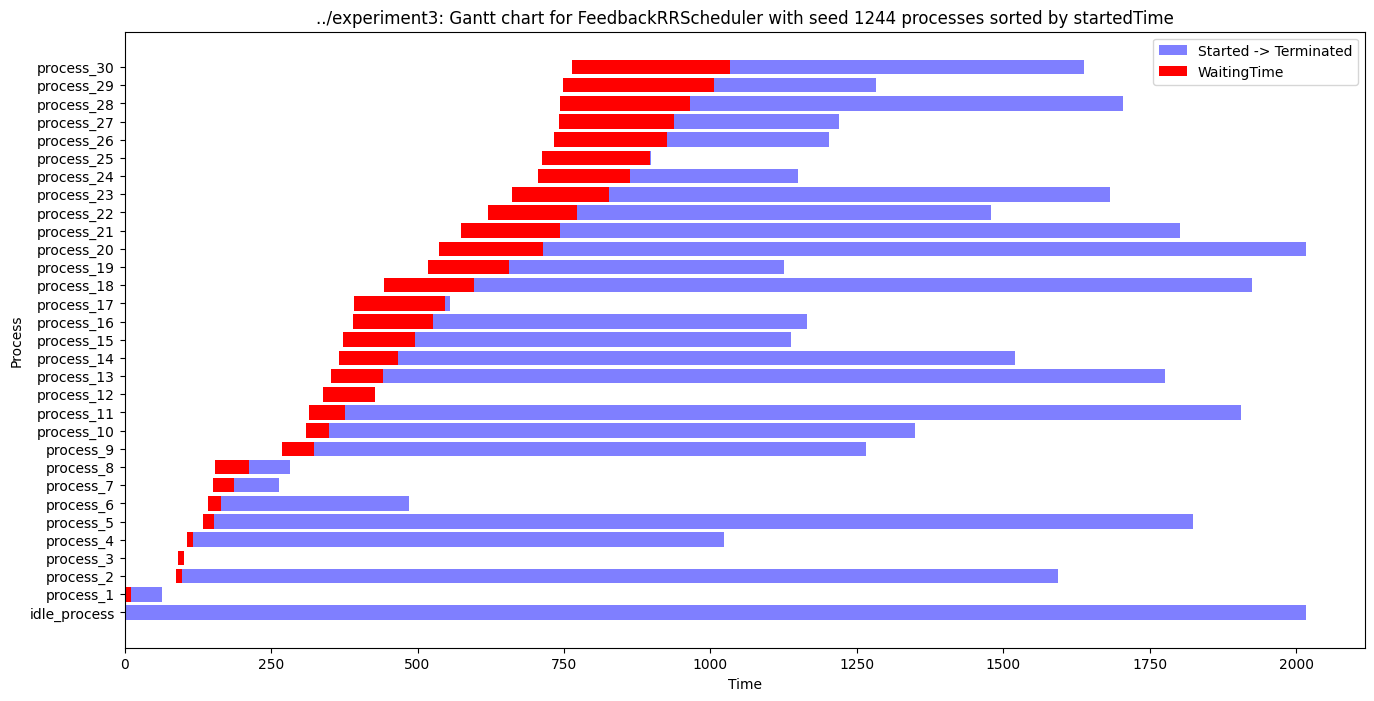

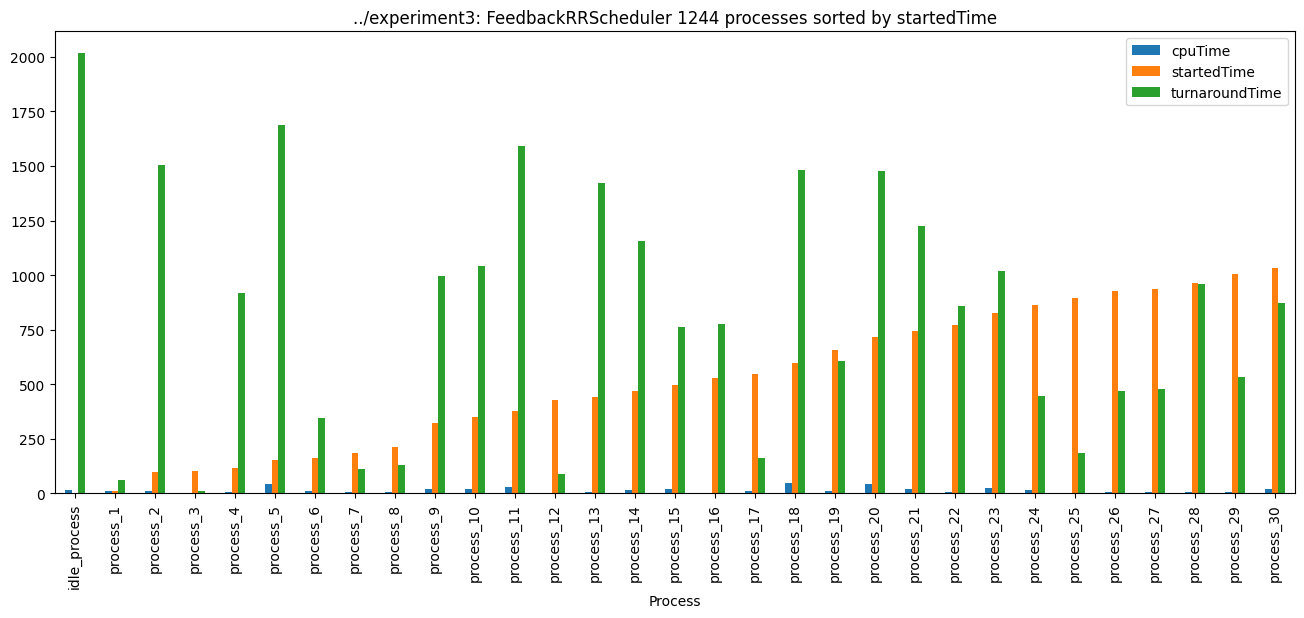

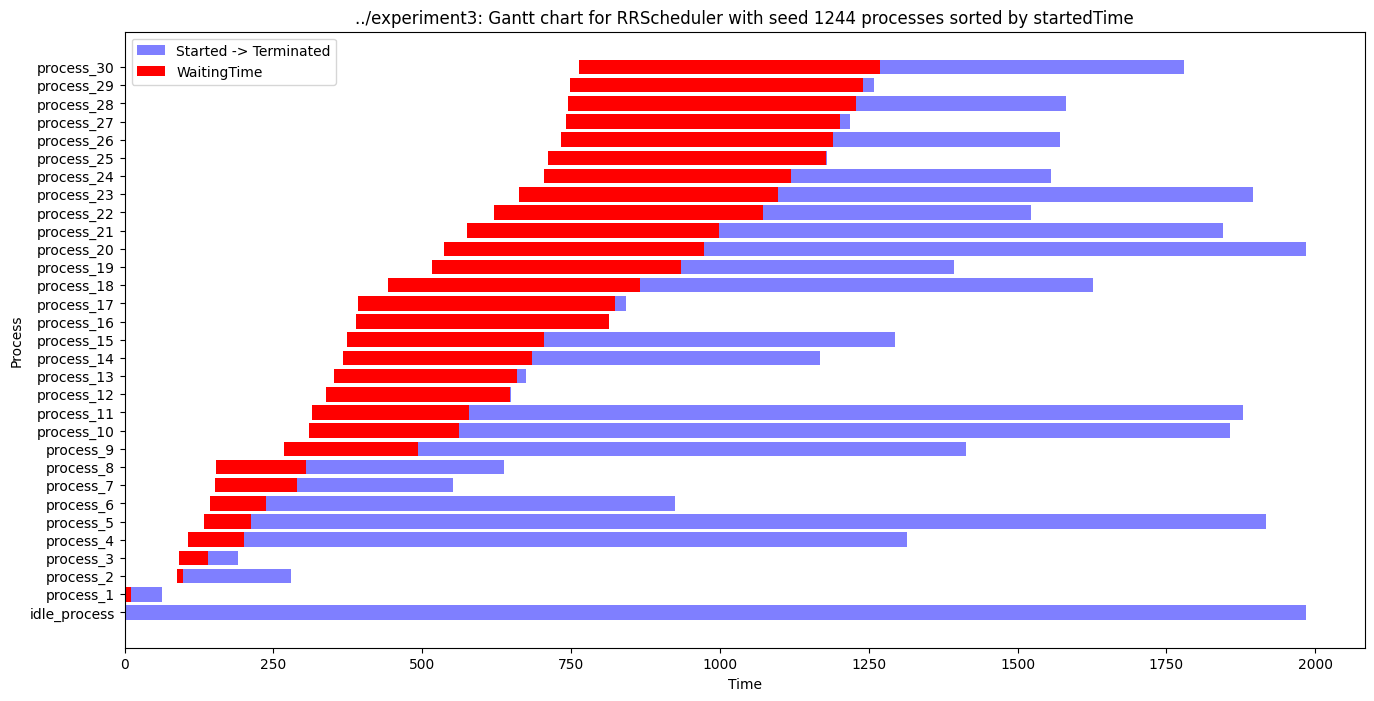

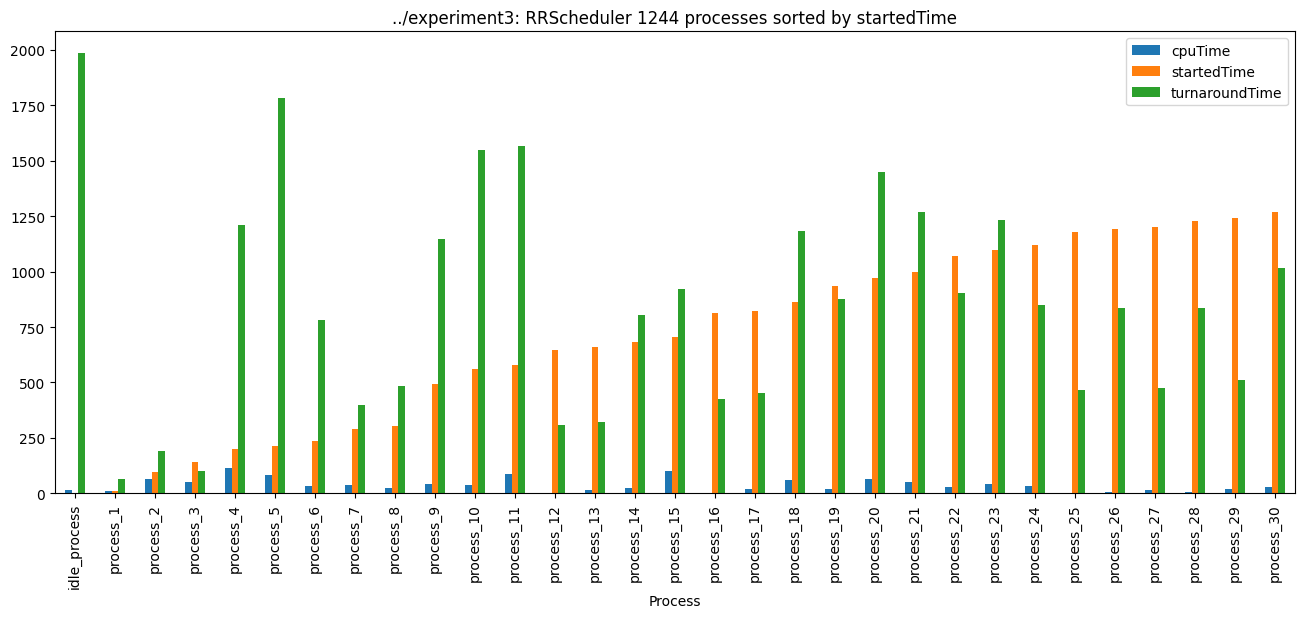

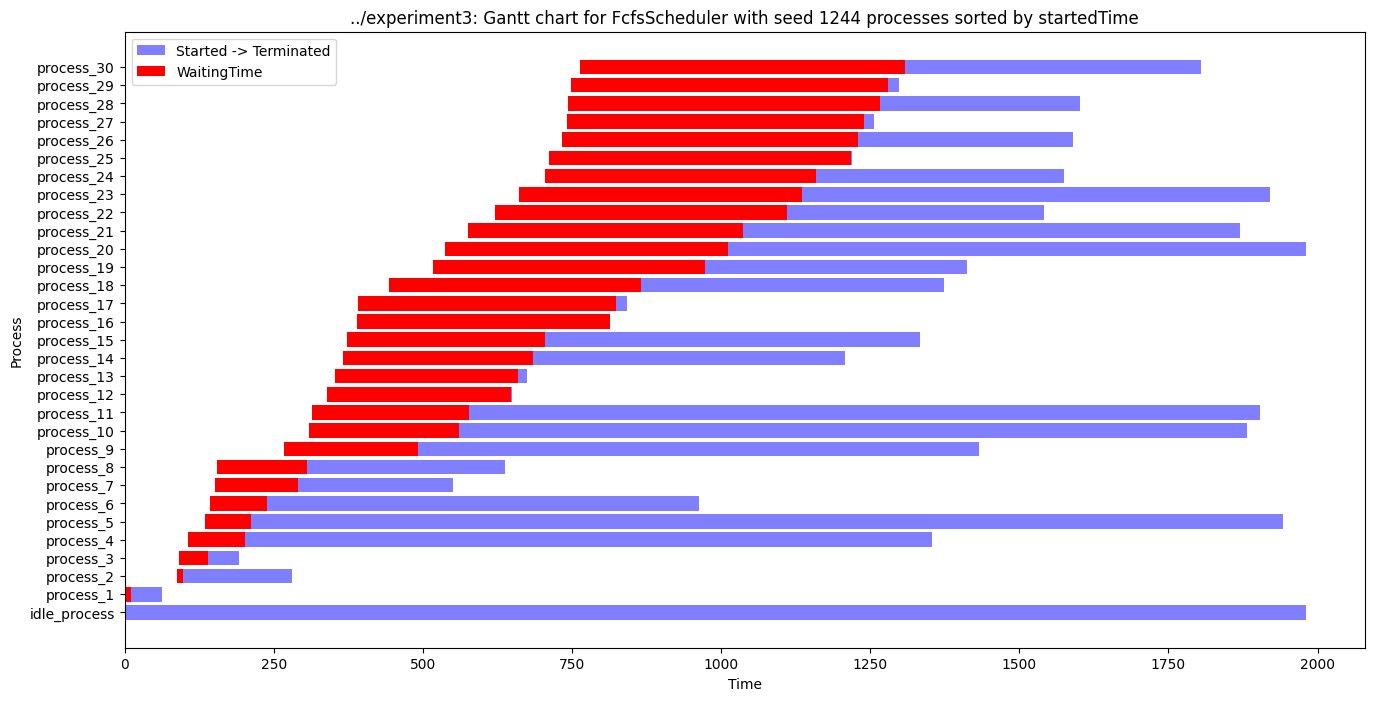

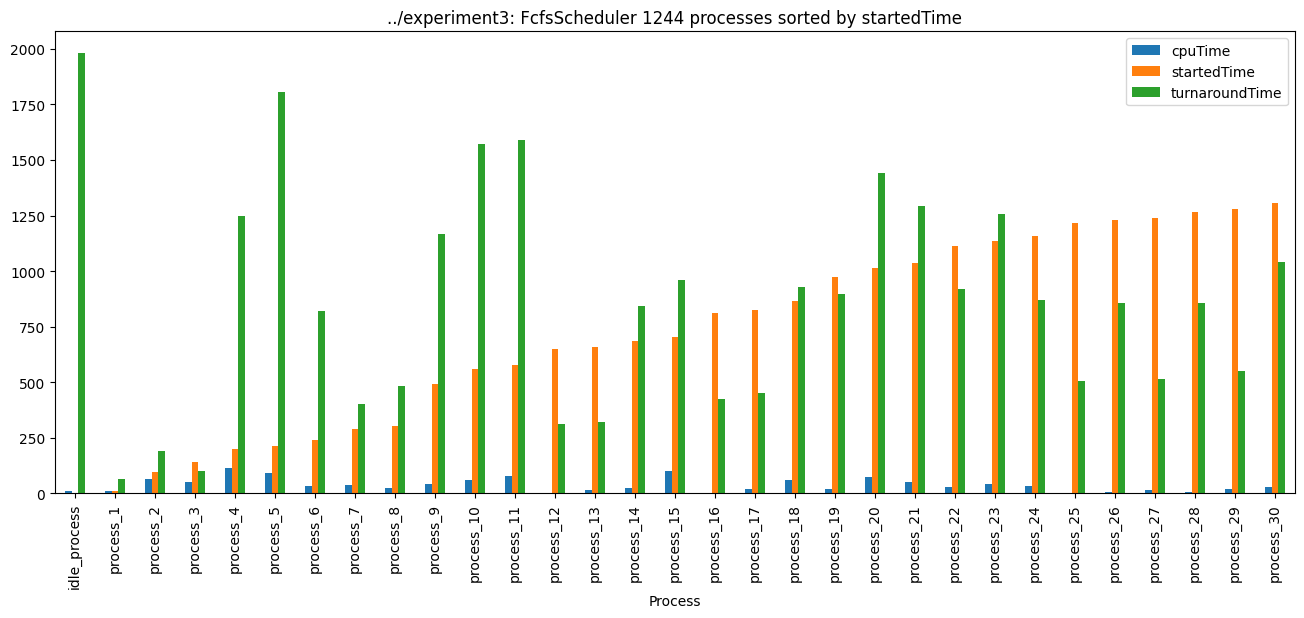

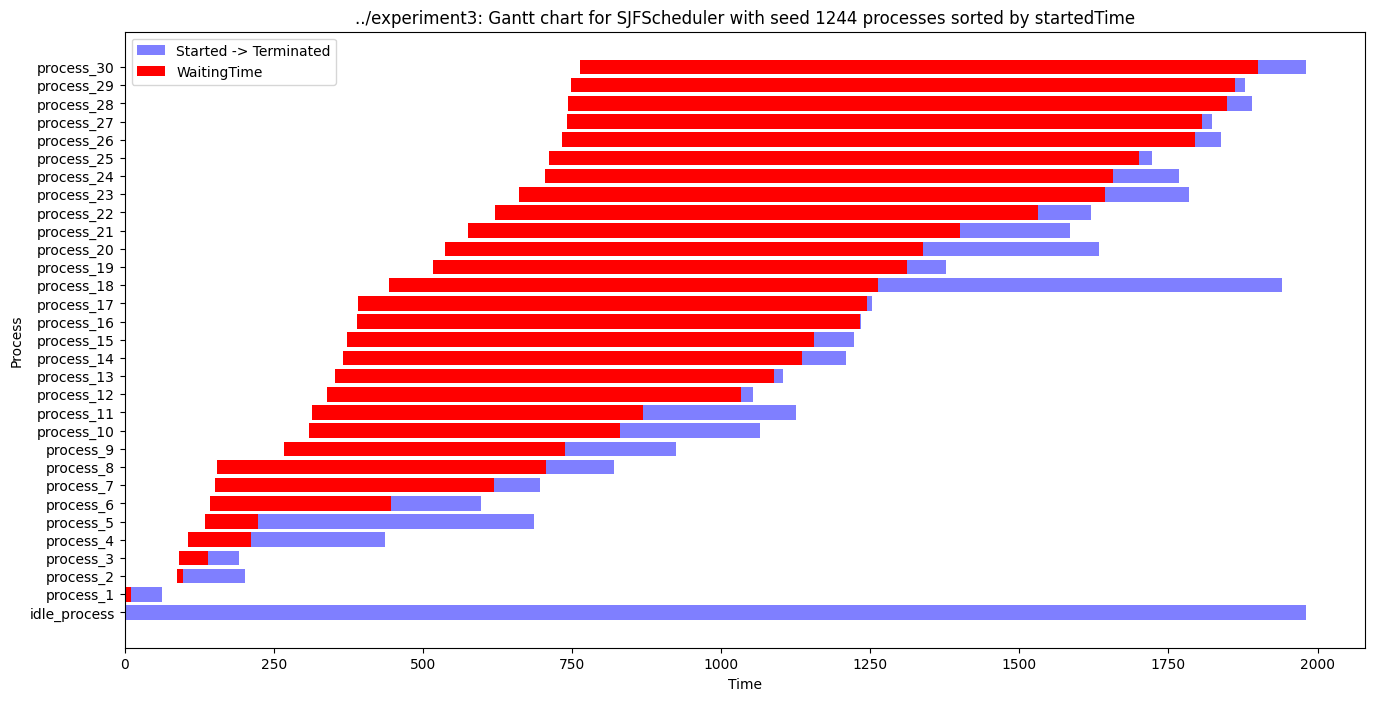

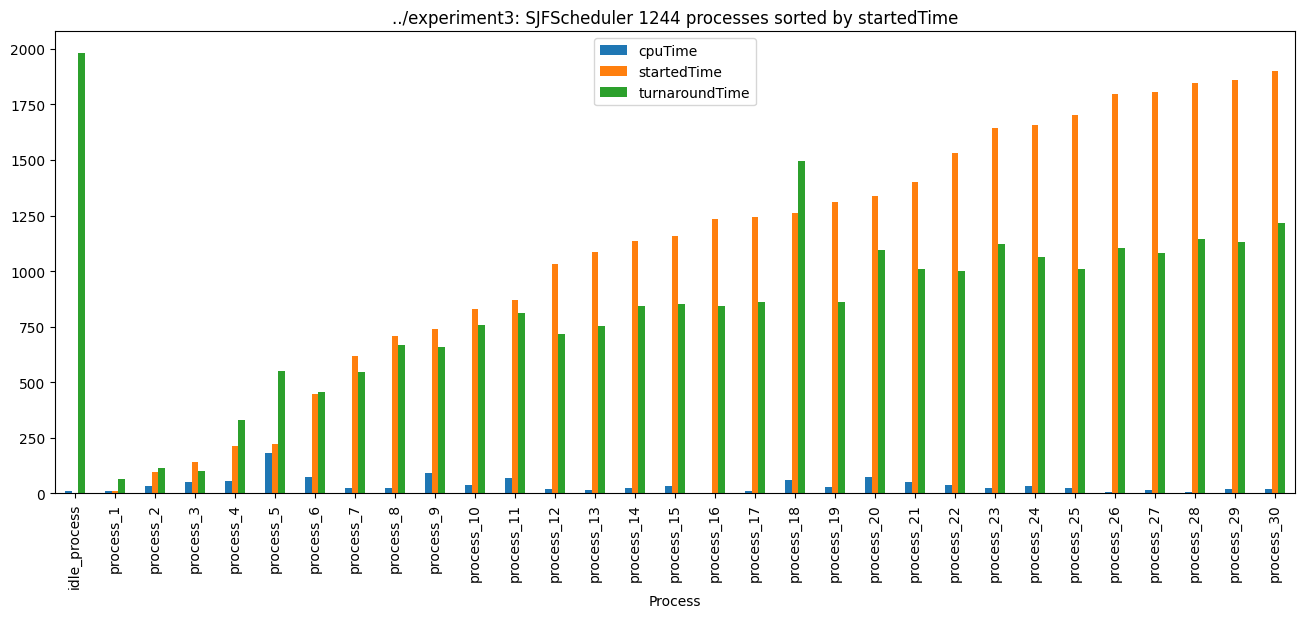

In [234]:
seed = '1244'
schedulers = ['FeedbackRRScheduler', 'RRScheduler', 'FcfsScheduler', 'SJFScheduler']
for scheduler in schedulers:
	analyze_and_display_results(exp3, scheduler, seed)

CPU Utilization for FeedbackRRScheduler: 98.993%
CPU Utilization for RRScheduler: 98.997%
CPU Utilization for FcfsScheduler: 99.006%
CPU Utilization for SJFScheduler: 98.993%


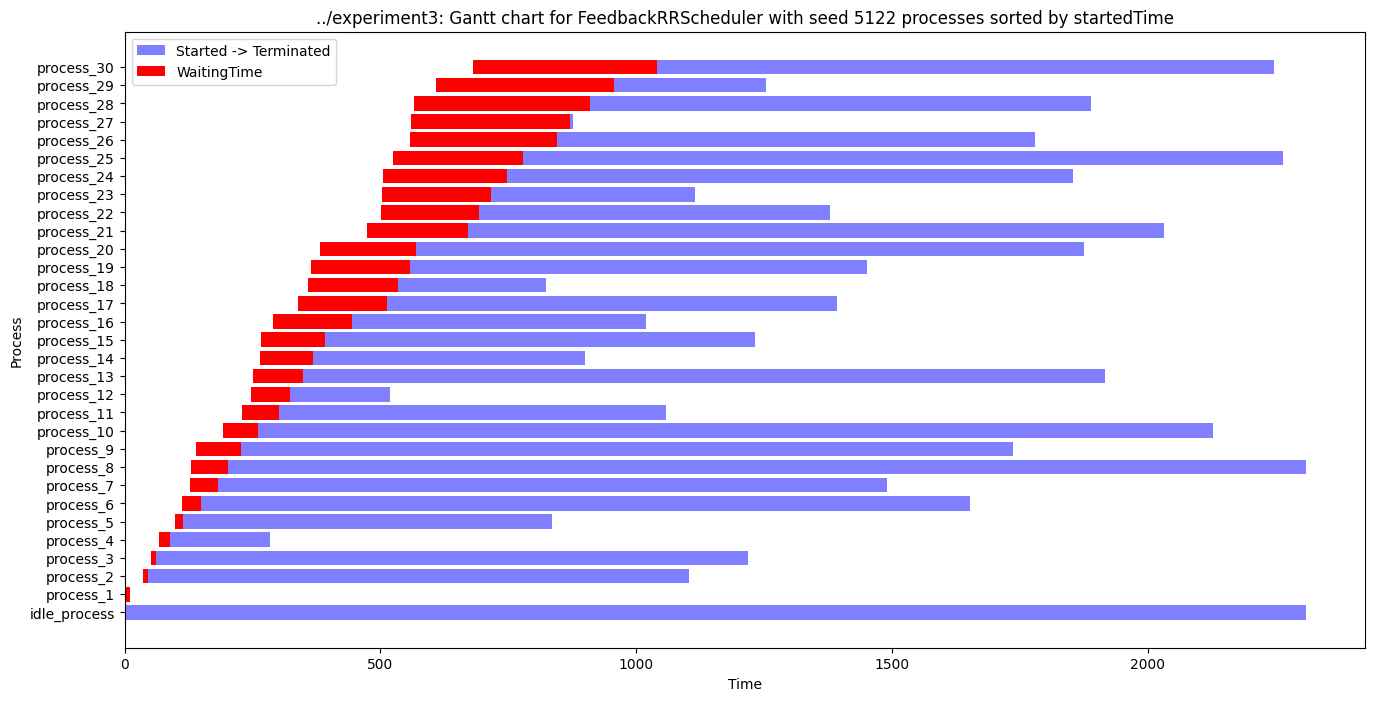

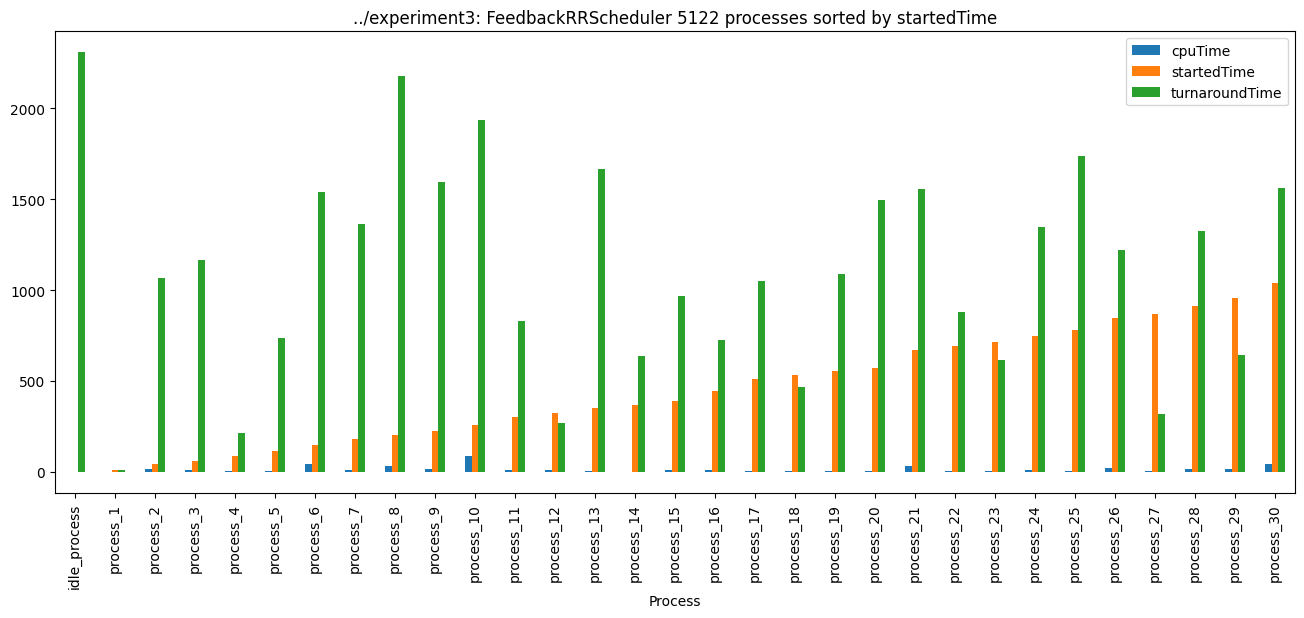

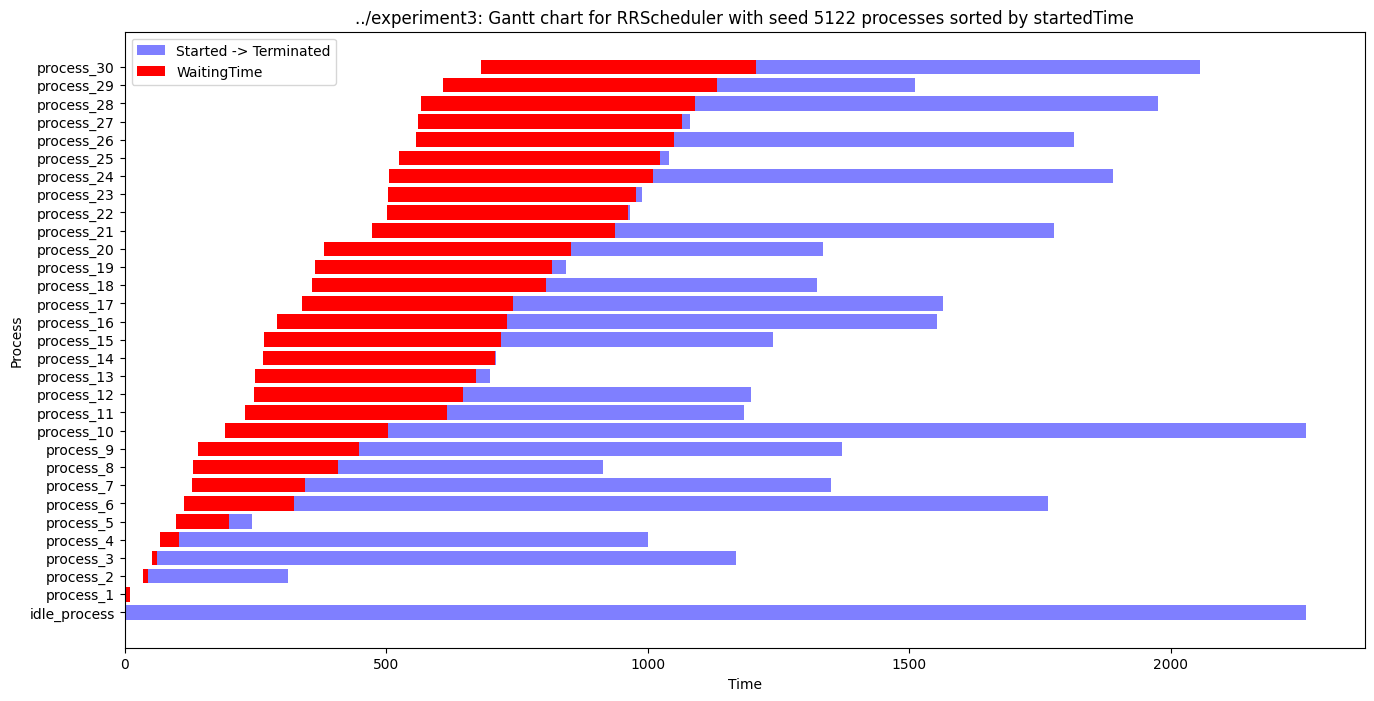

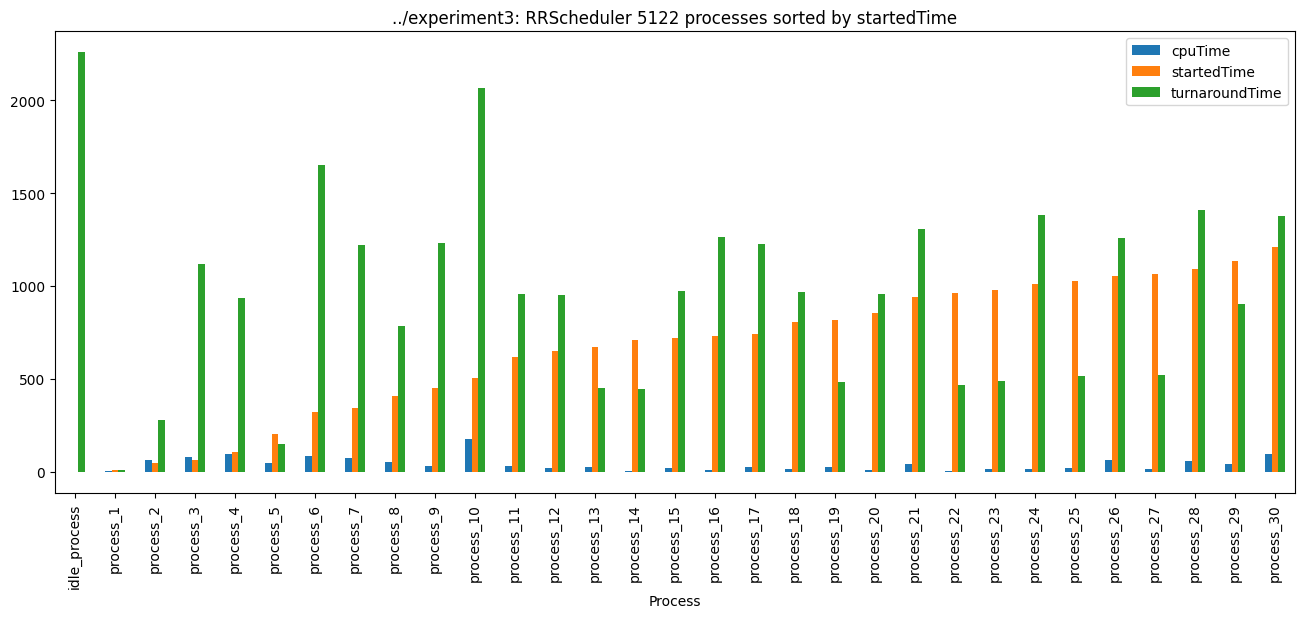

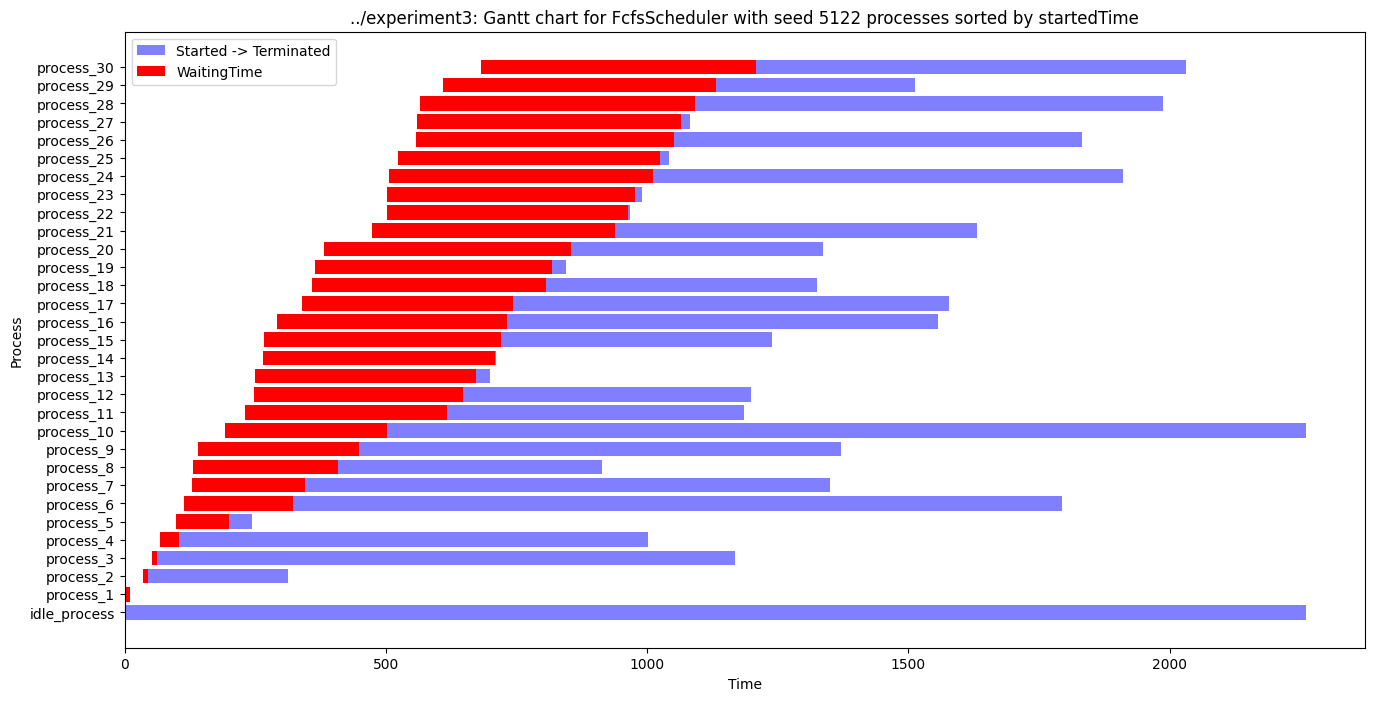

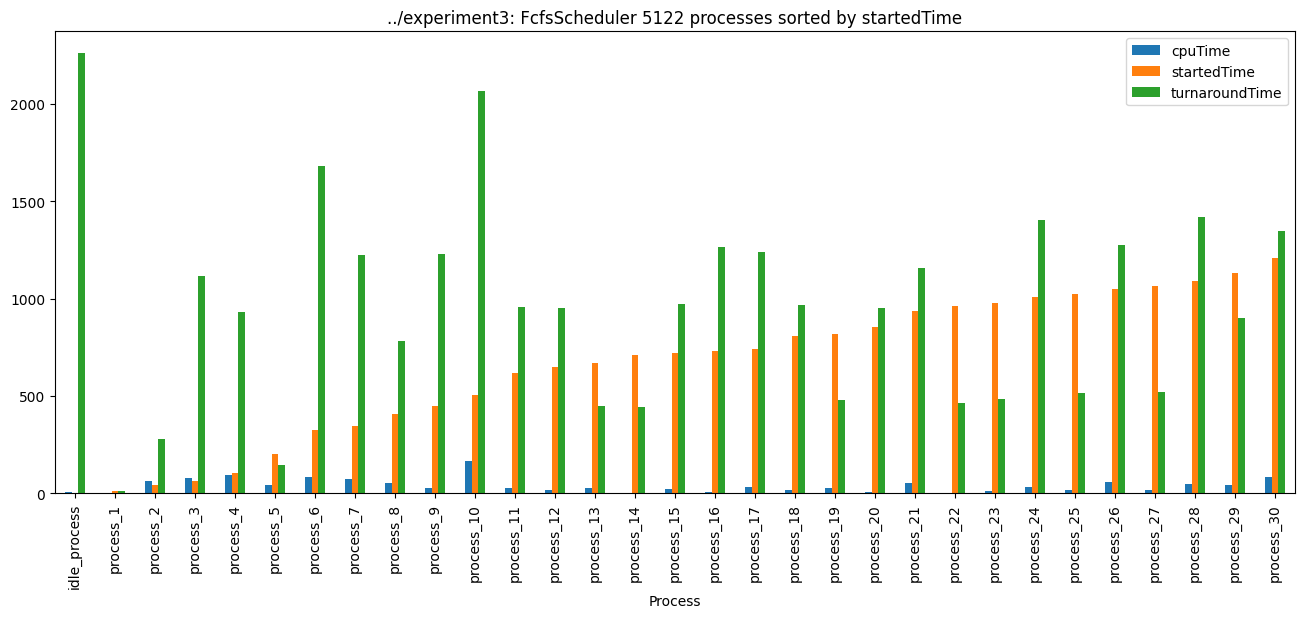

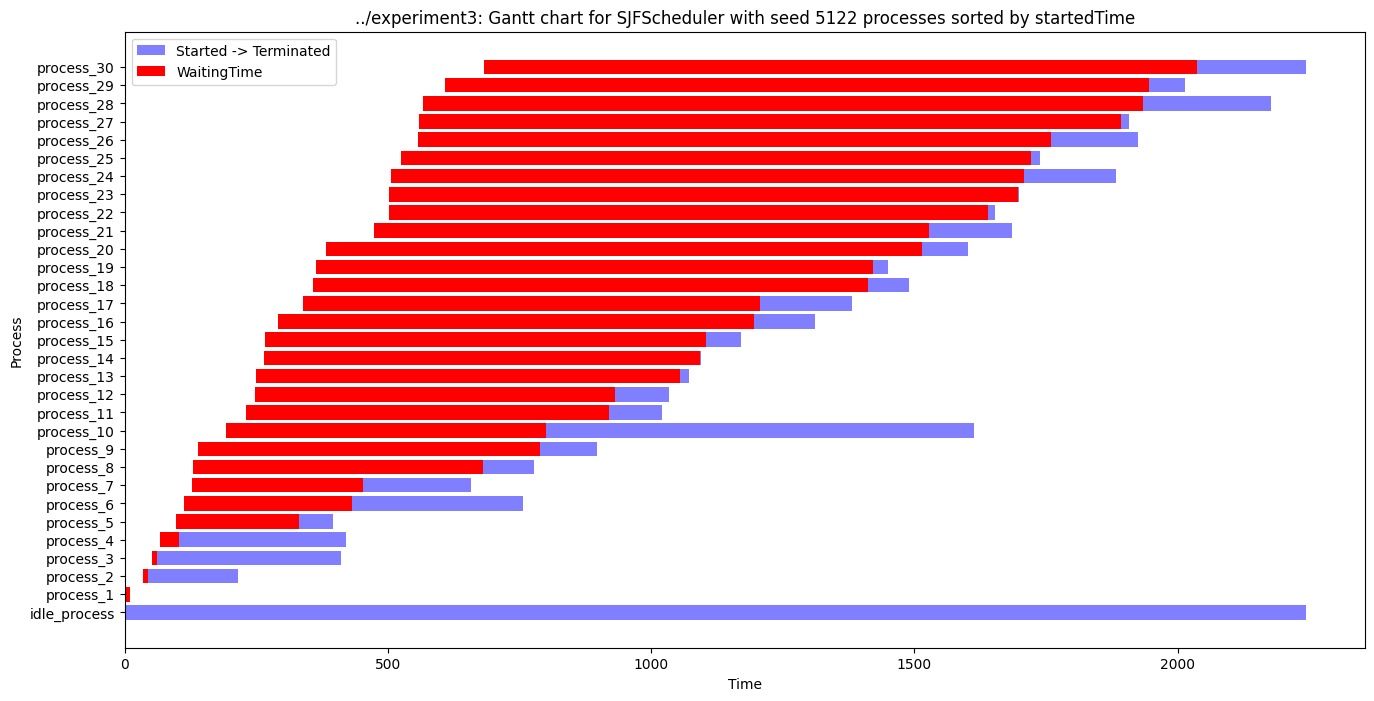

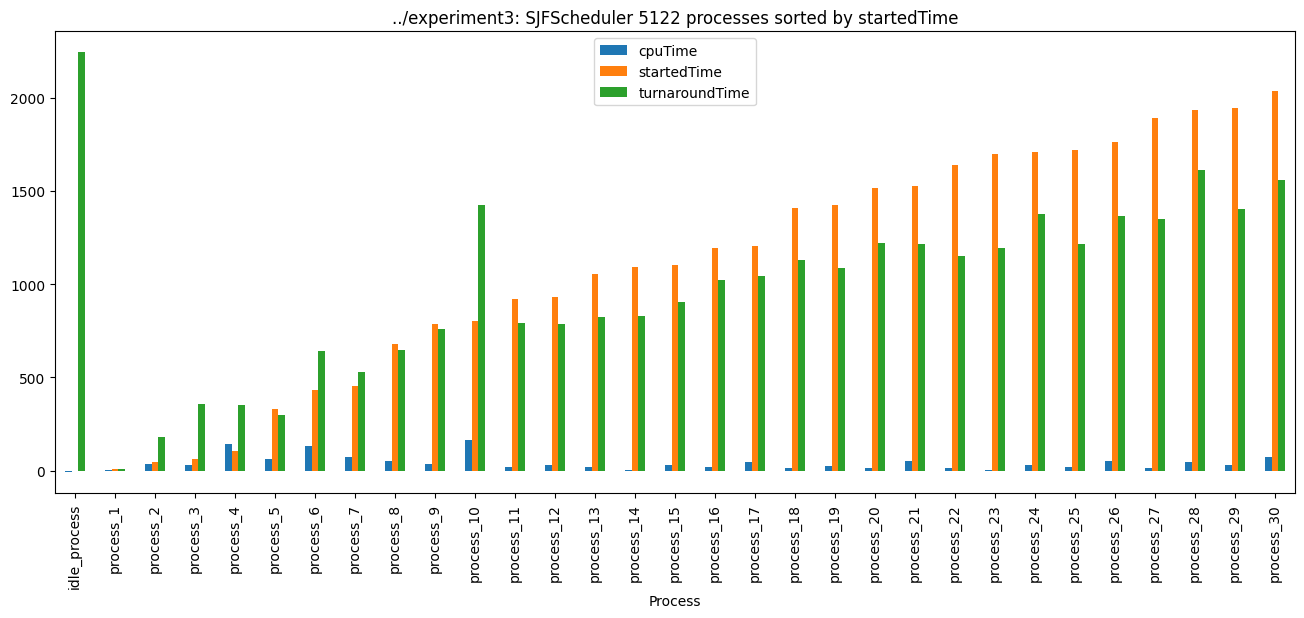

In [235]:
seed = '5122'
schedulers = ['FeedbackRRScheduler', 'RRScheduler', 'FcfsScheduler', 'SJFScheduler']
for scheduler in schedulers:
	analyze_and_display_results(exp3, scheduler, seed)

CPU Utilization for FeedbackRRScheduler: 98.97%
CPU Utilization for RRScheduler: 98.993%
CPU Utilization for FcfsScheduler: 98.993%
CPU Utilization for SJFScheduler: 98.988%


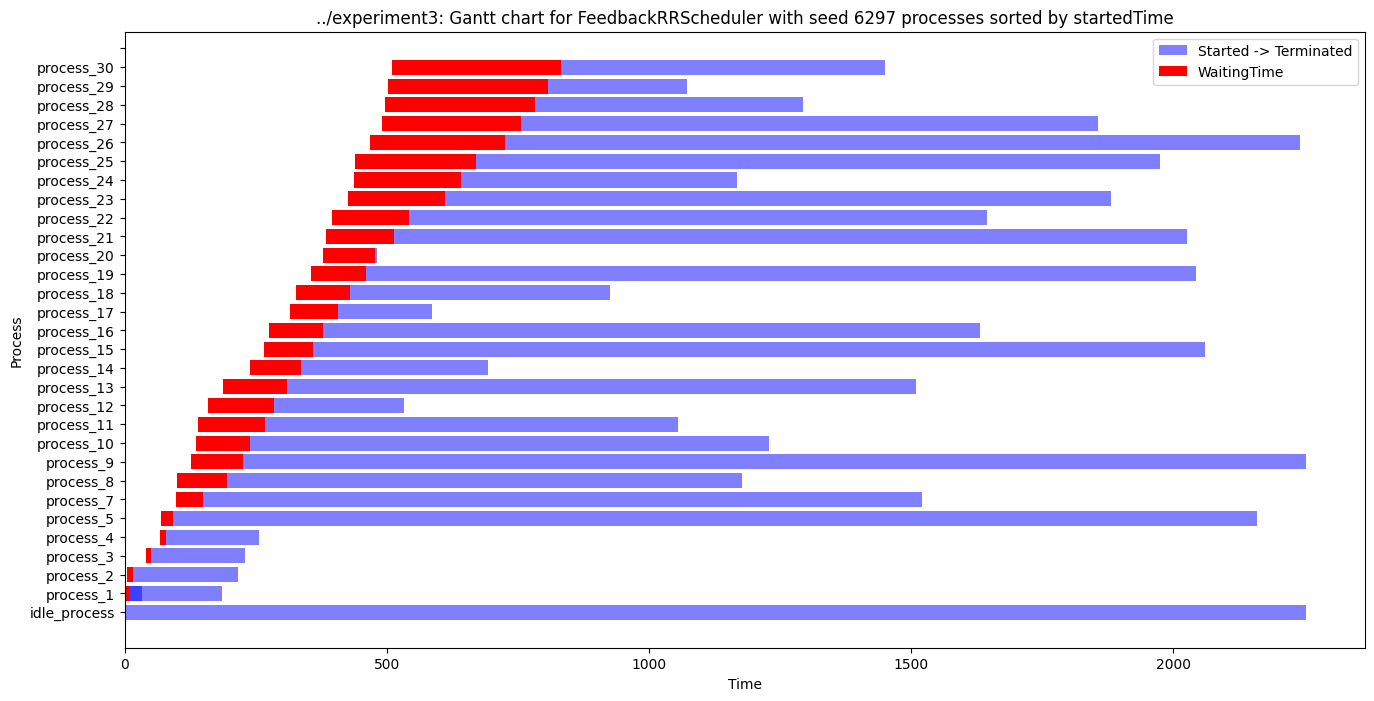

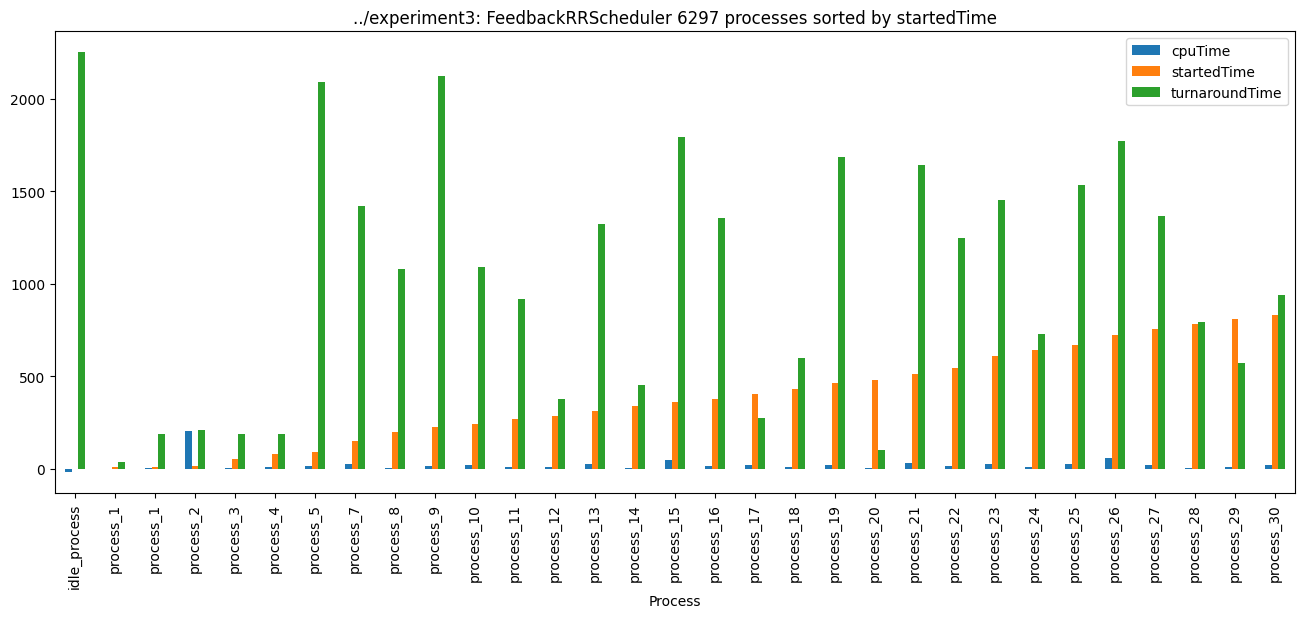

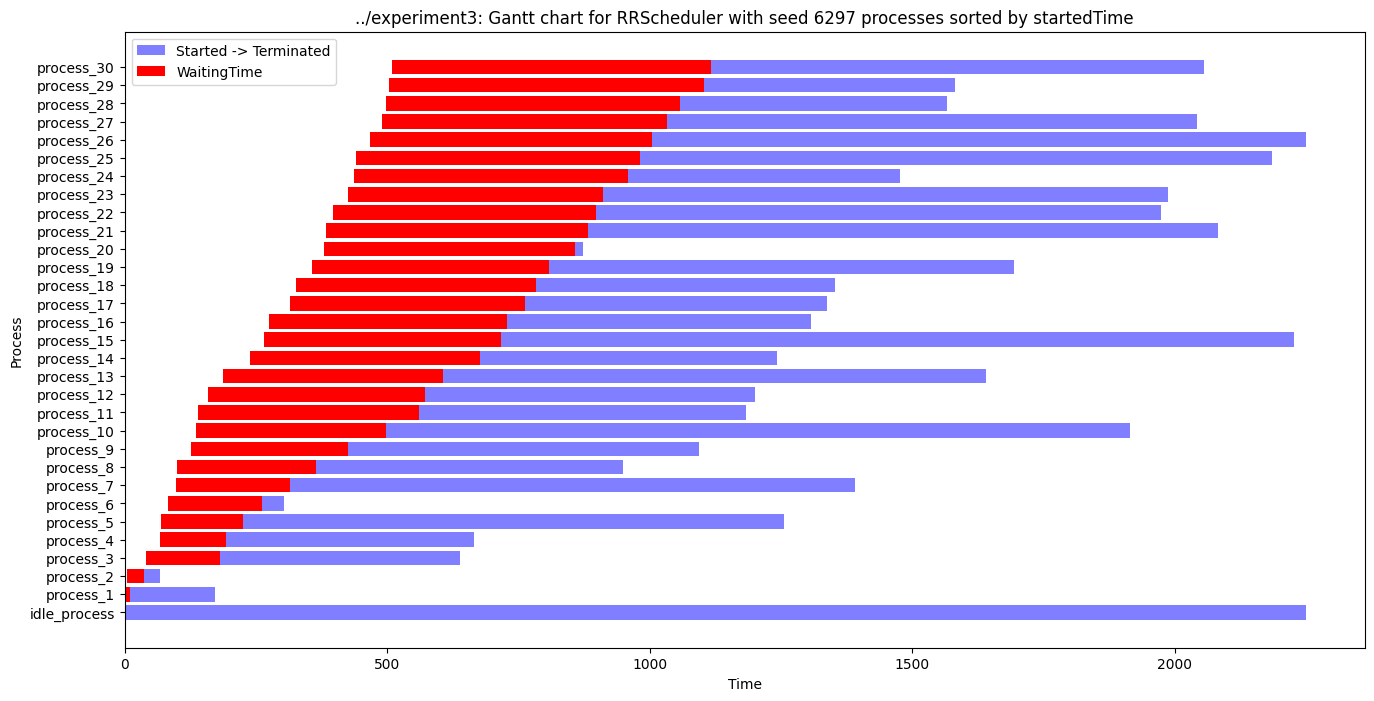

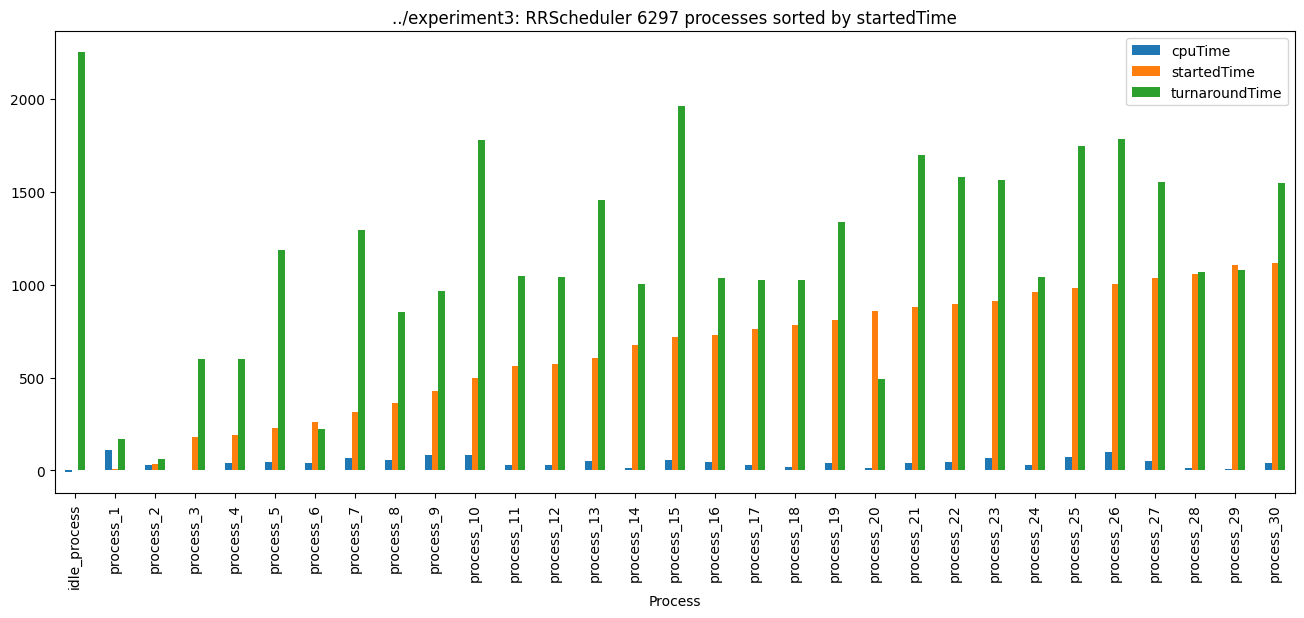

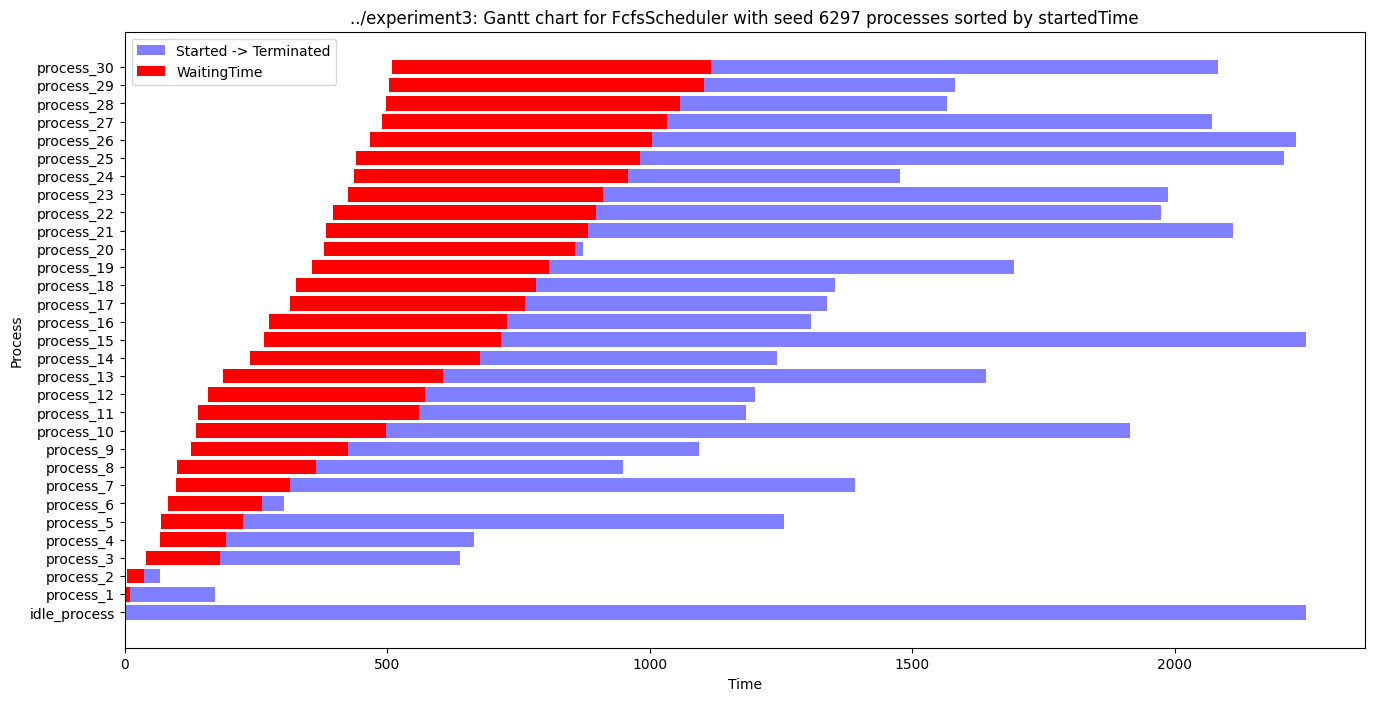

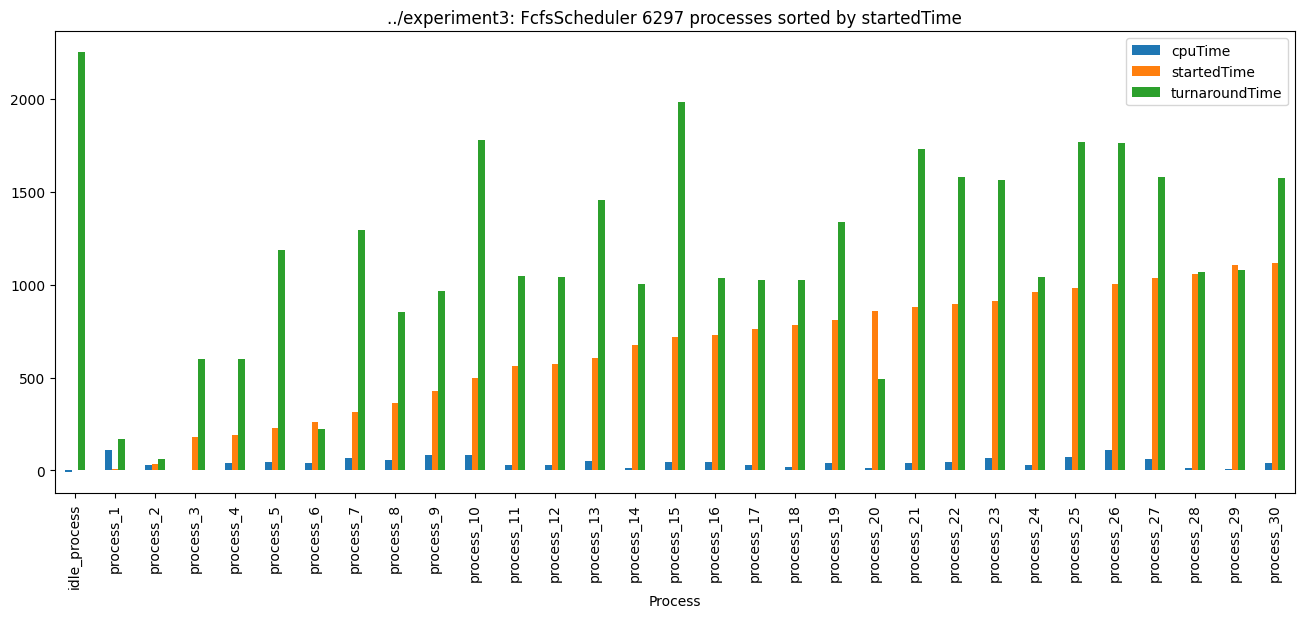

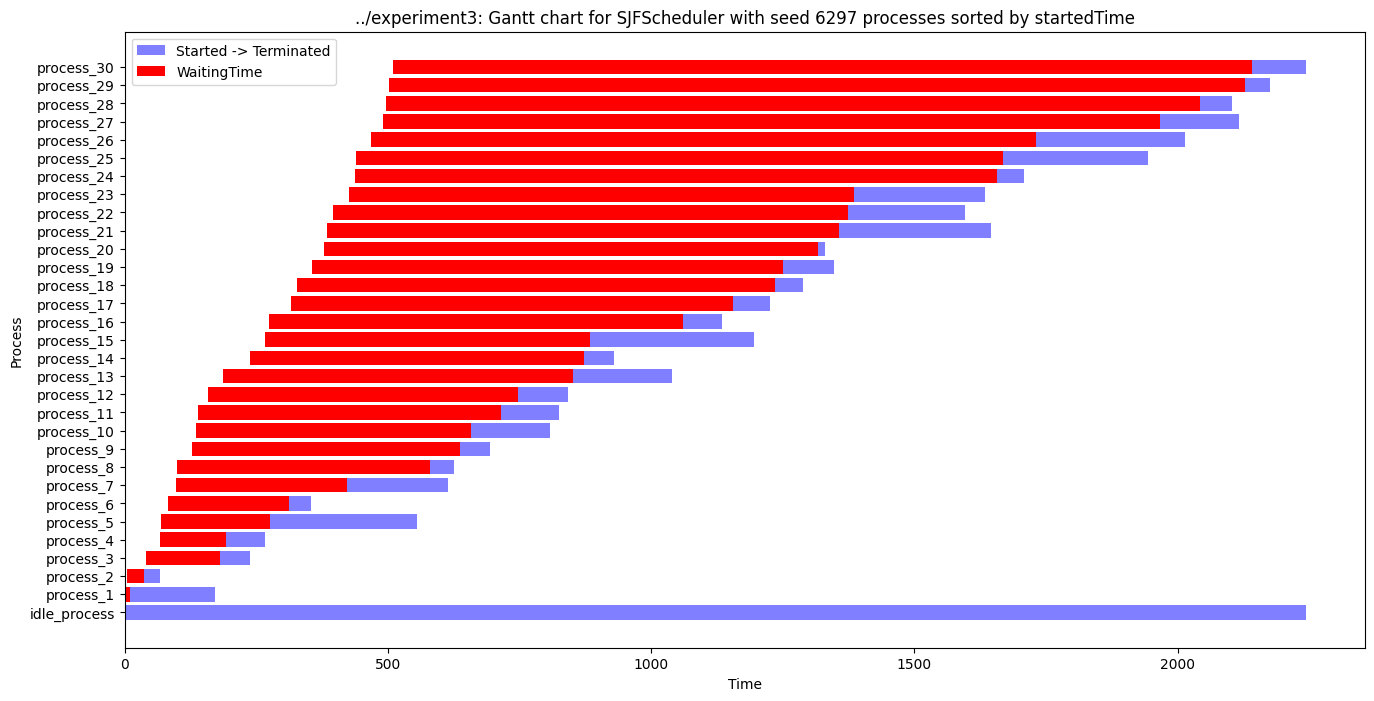

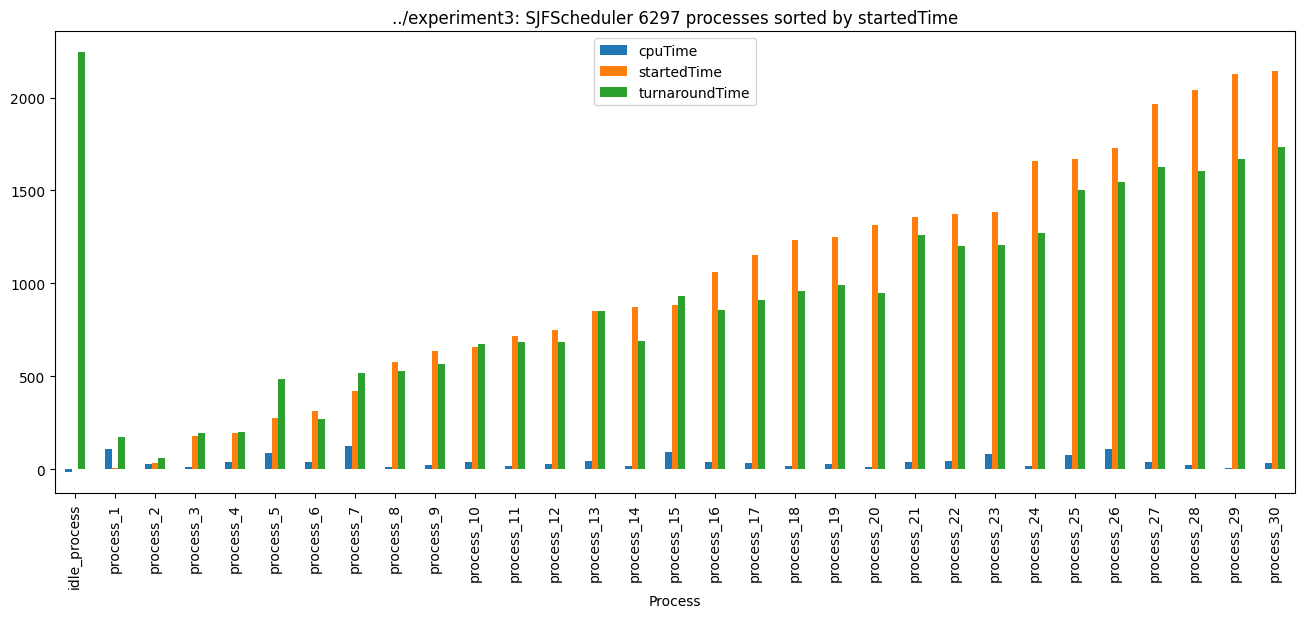

In [236]:
seed = '6297'
schedulers = ['FeedbackRRScheduler', 'RRScheduler', 'FcfsScheduler', 'SJFScheduler']
for scheduler in schedulers:
	analyze_and_display_results(exp3, scheduler, seed)

CPU Utilization for FeedbackRRScheduler: 98.993%
CPU Utilization for RRScheduler: 98.995%
CPU Utilization for FcfsScheduler: 98.991%
CPU Utilization for SJFScheduler: 98.995%


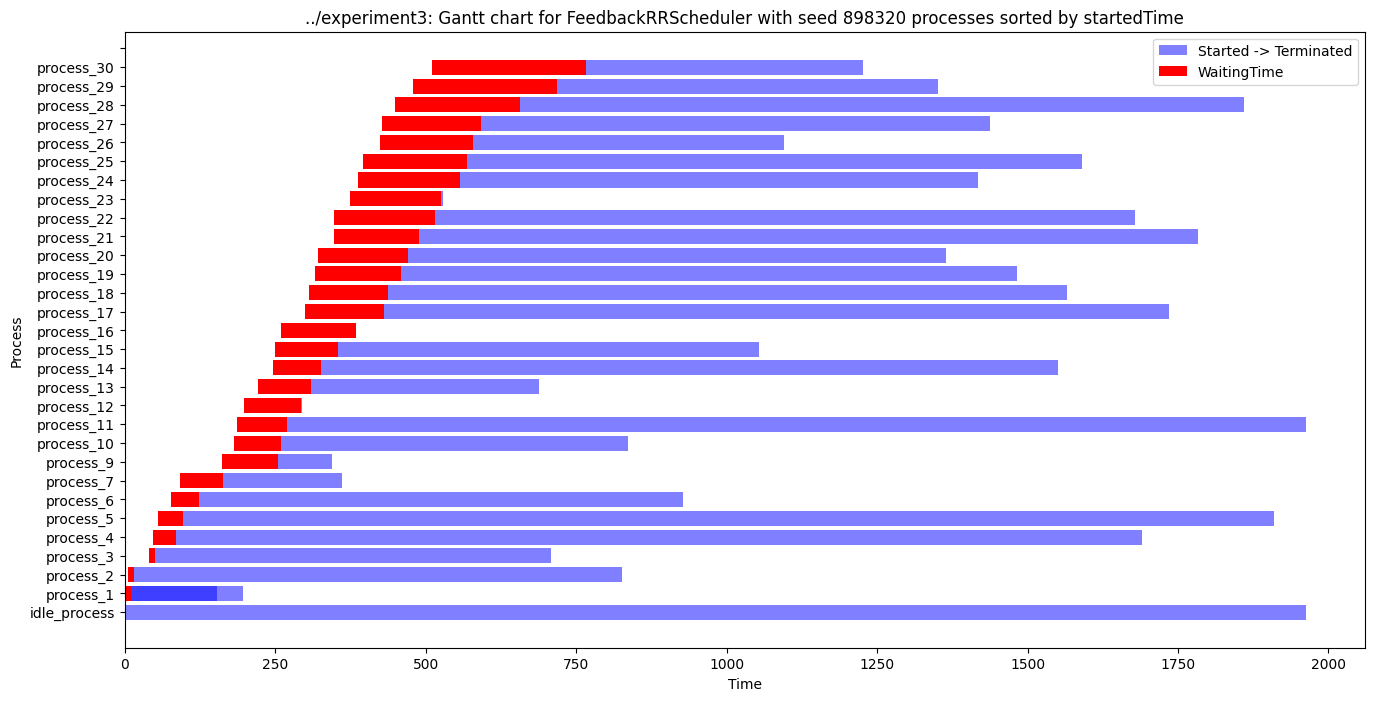

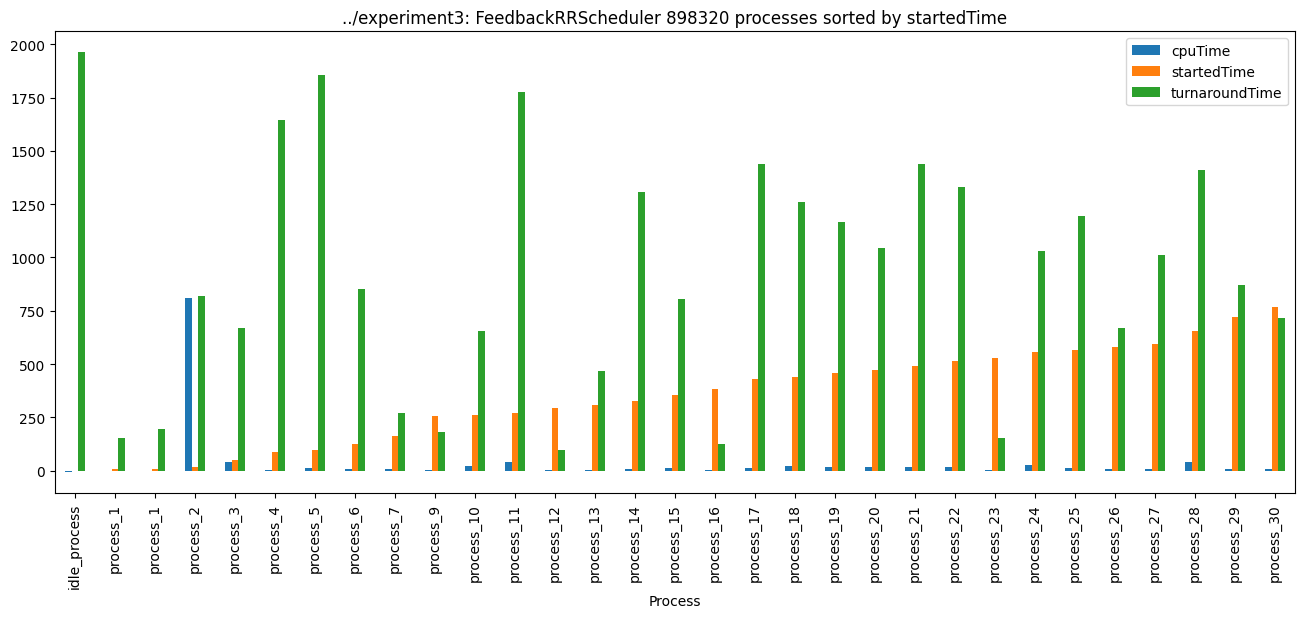

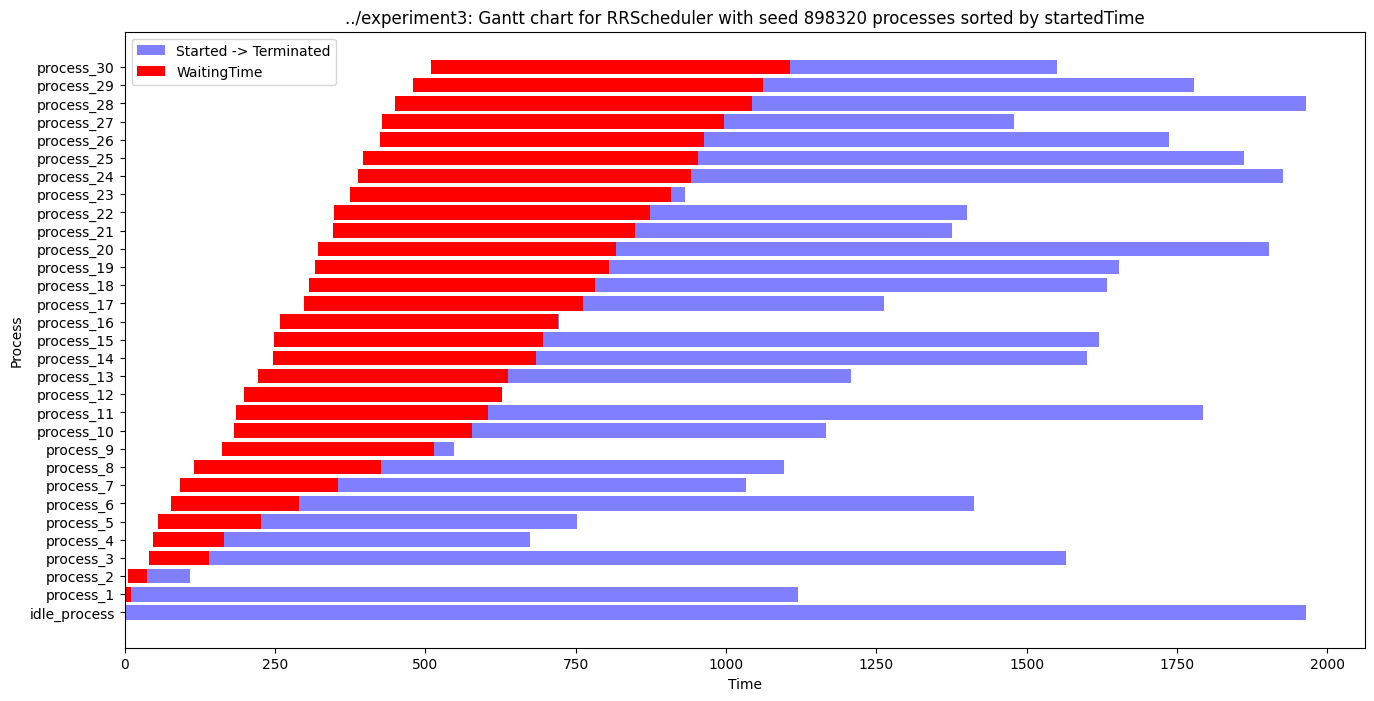

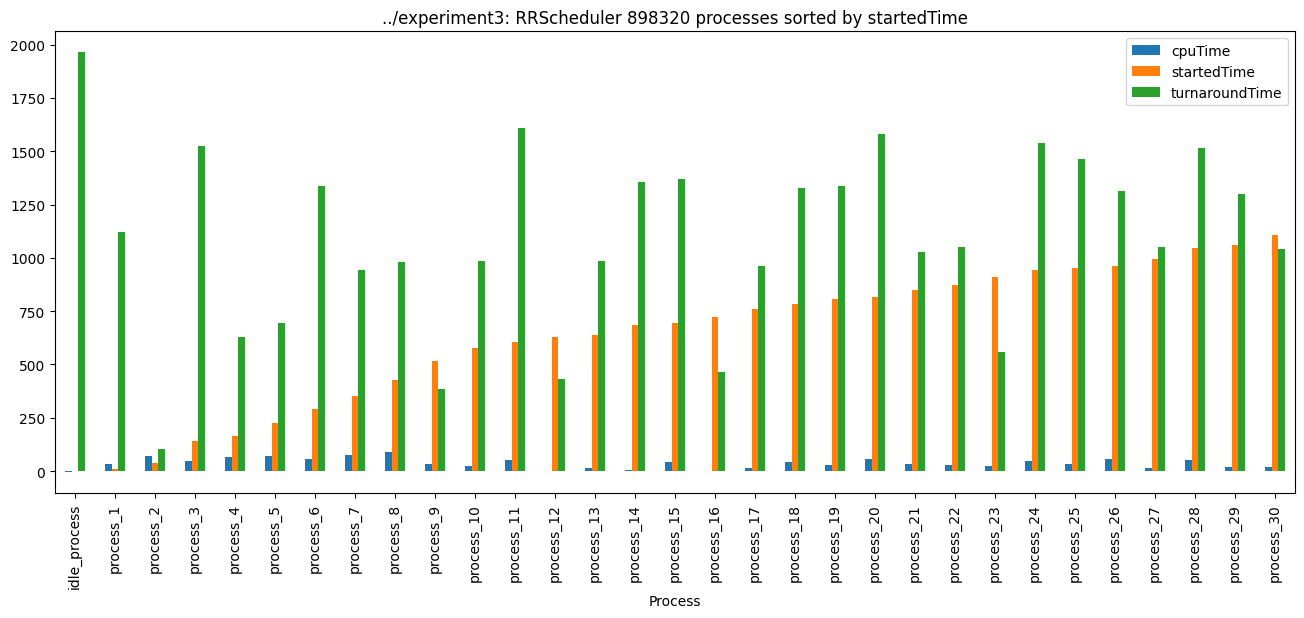

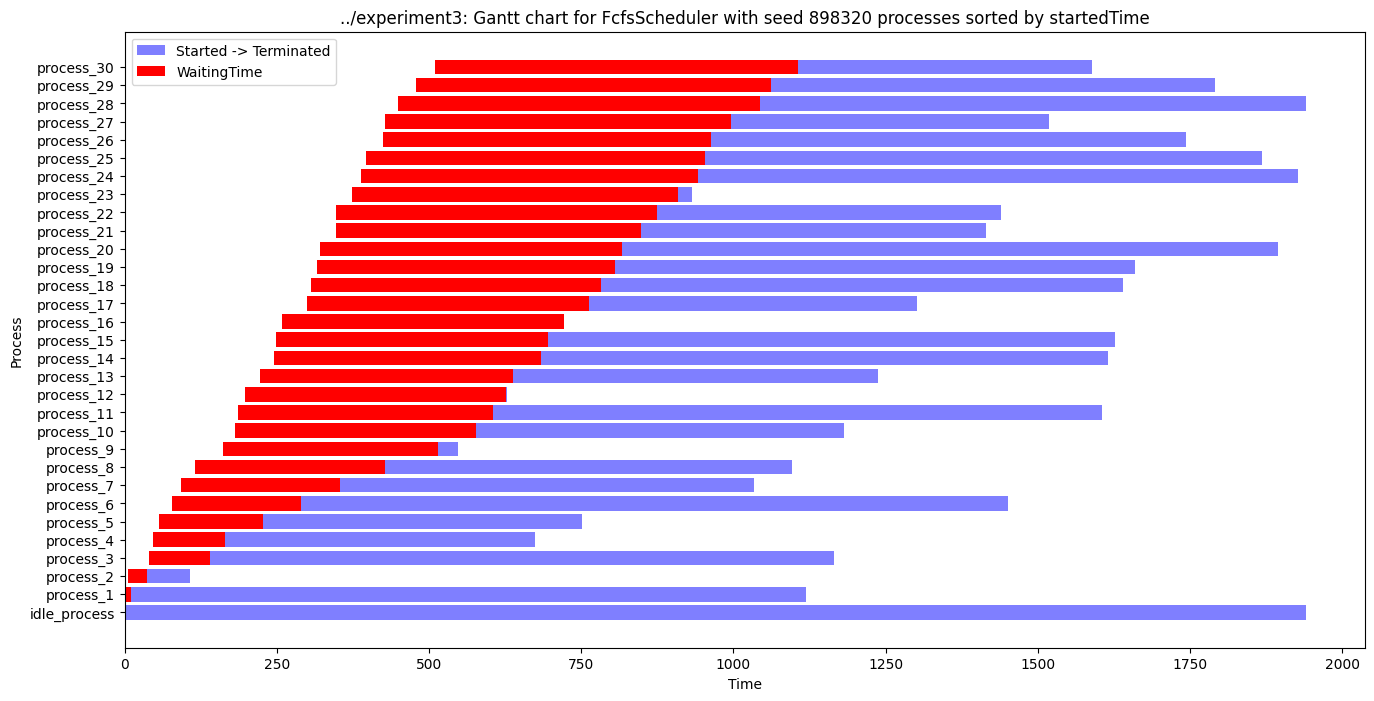

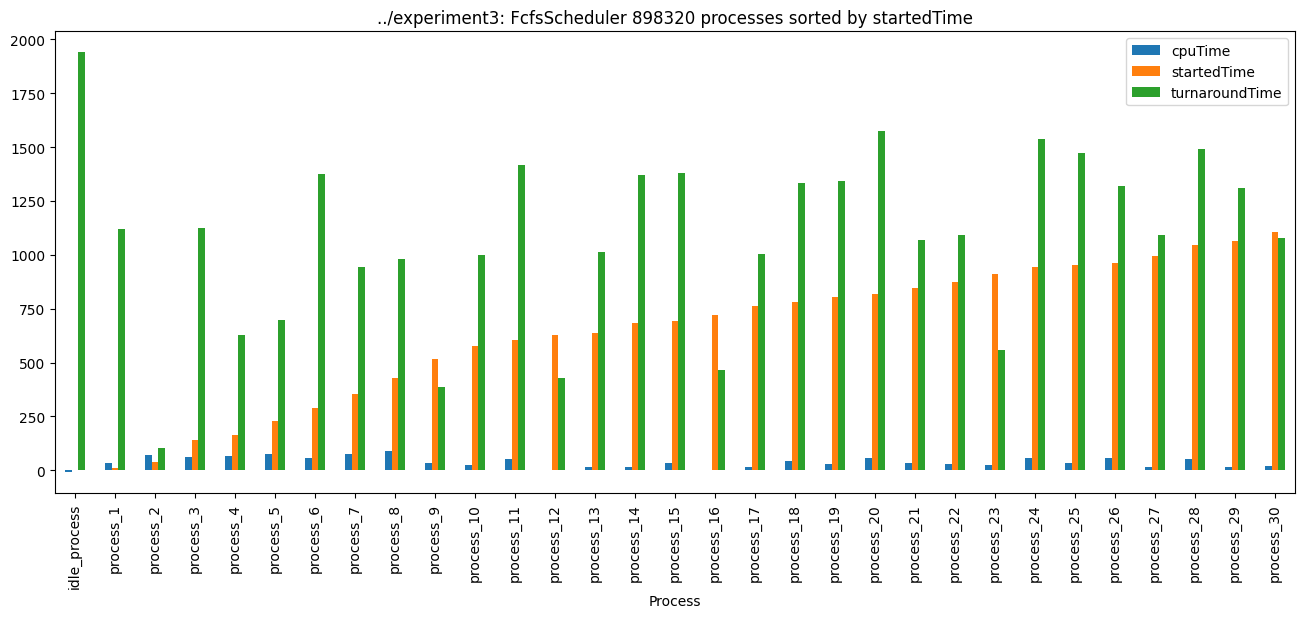

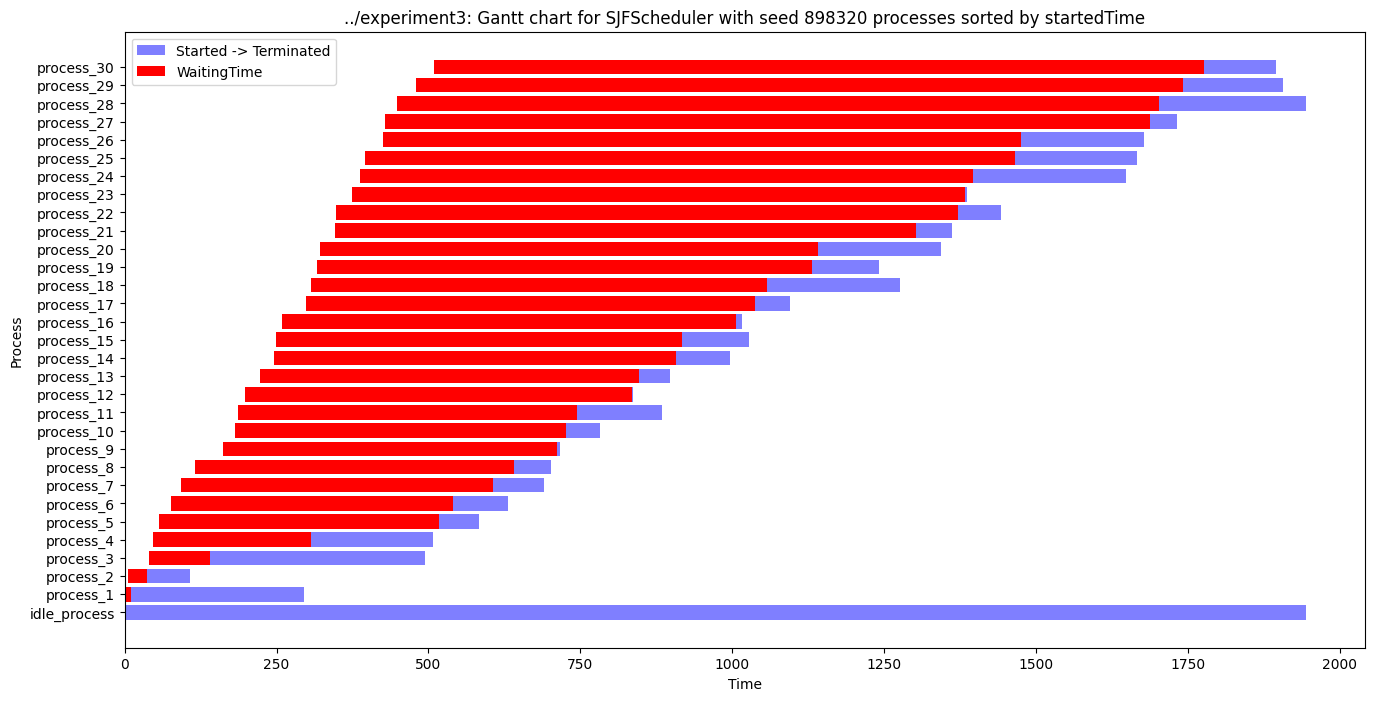

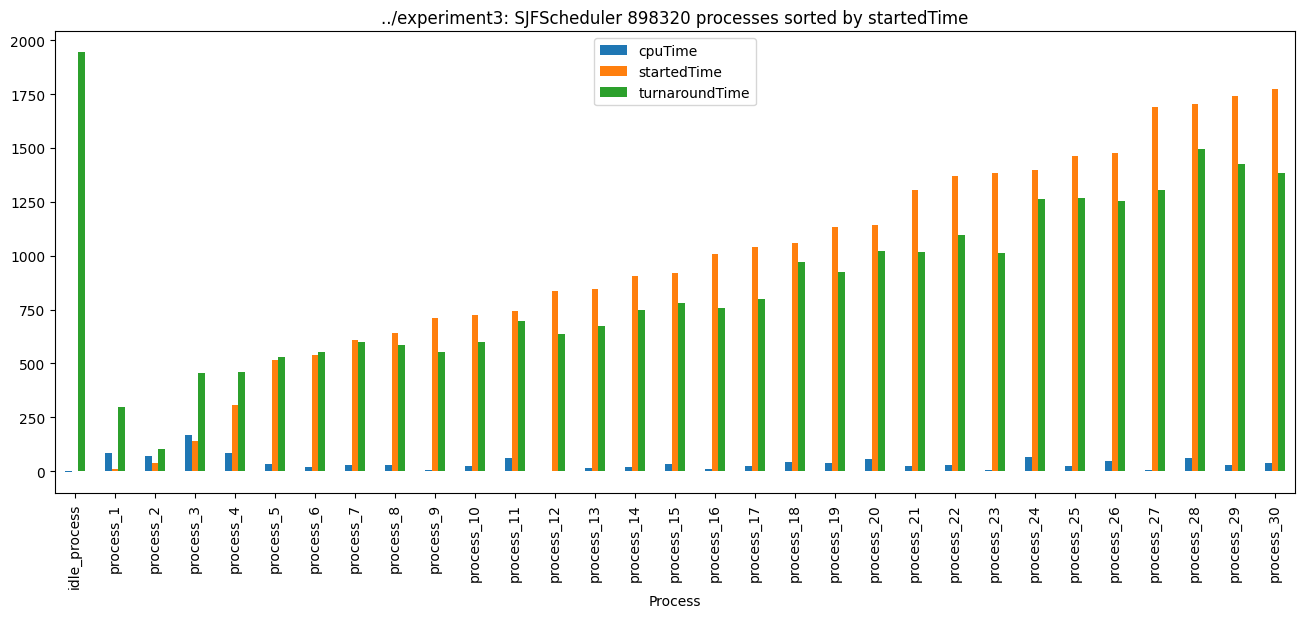

In [237]:
seed = '898320'
schedulers = ['FeedbackRRScheduler', 'RRScheduler', 'FcfsScheduler', 'SJFScheduler']
for scheduler in schedulers:
	analyze_and_display_results(exp3, scheduler, seed)

CPU Utilization for FeedbackRRScheduler: 98.973%
CPU Utilization for RRScheduler: 98.986%
CPU Utilization for FcfsScheduler: 98.986%
CPU Utilization for SJFScheduler: 98.98%


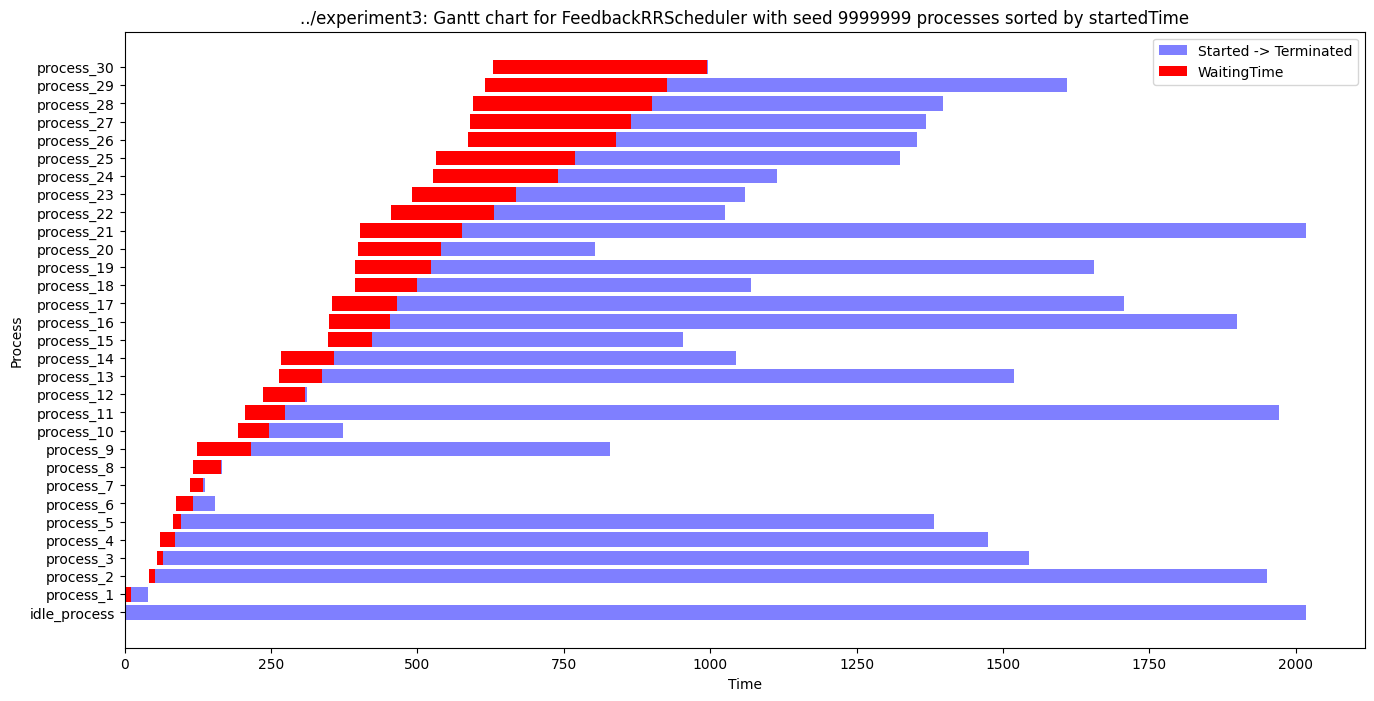

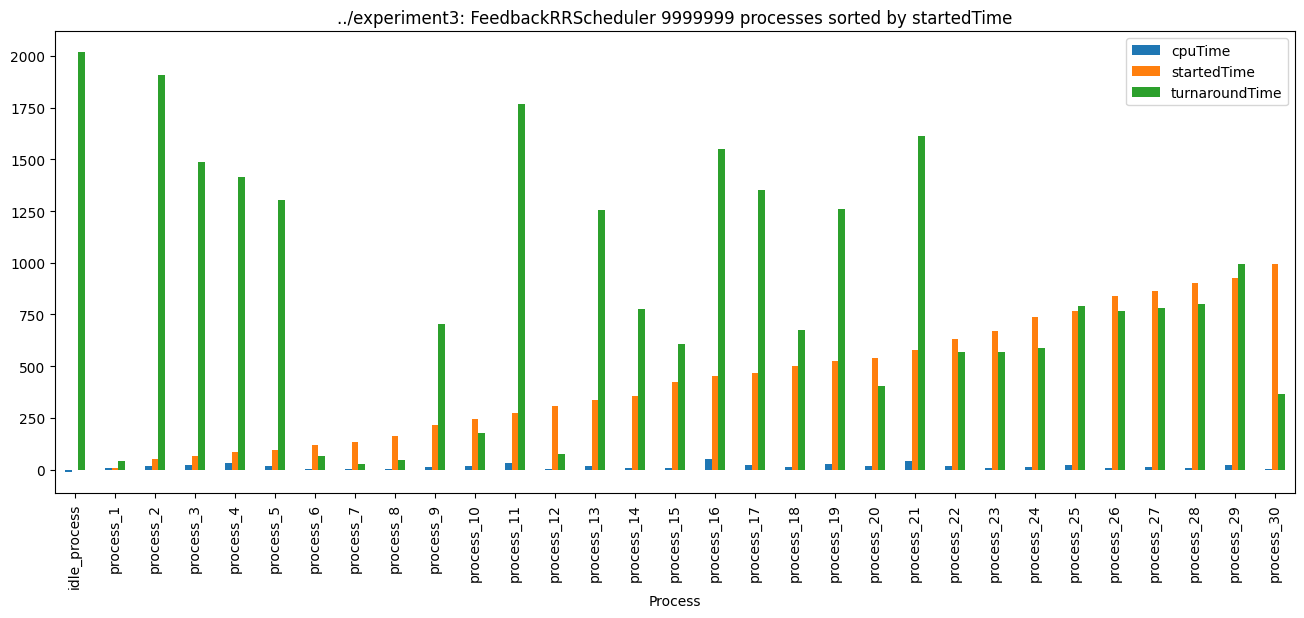

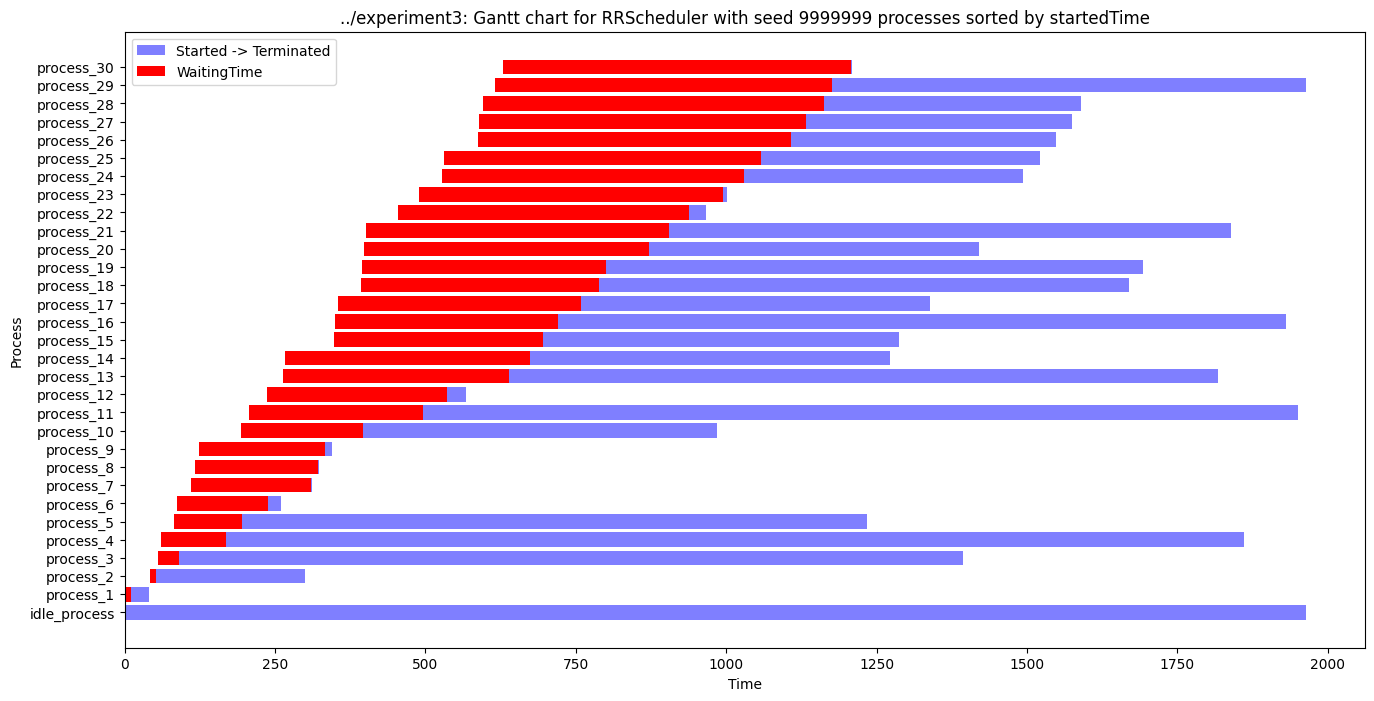

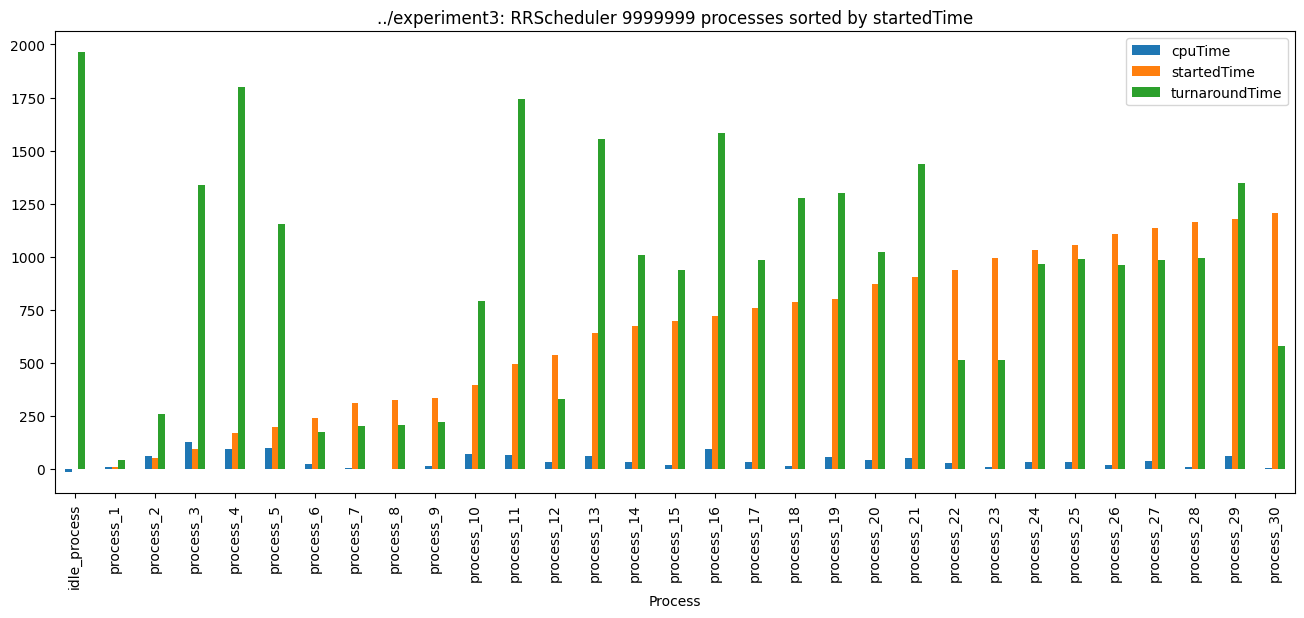

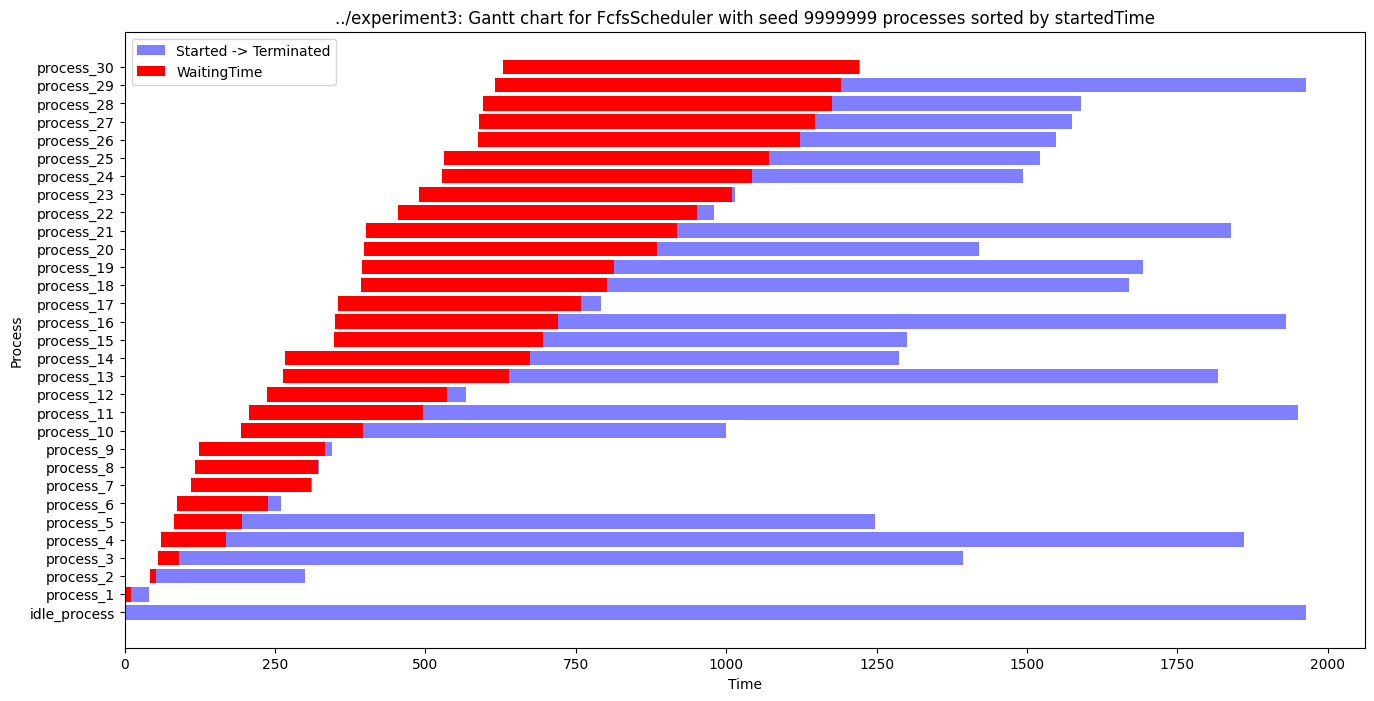

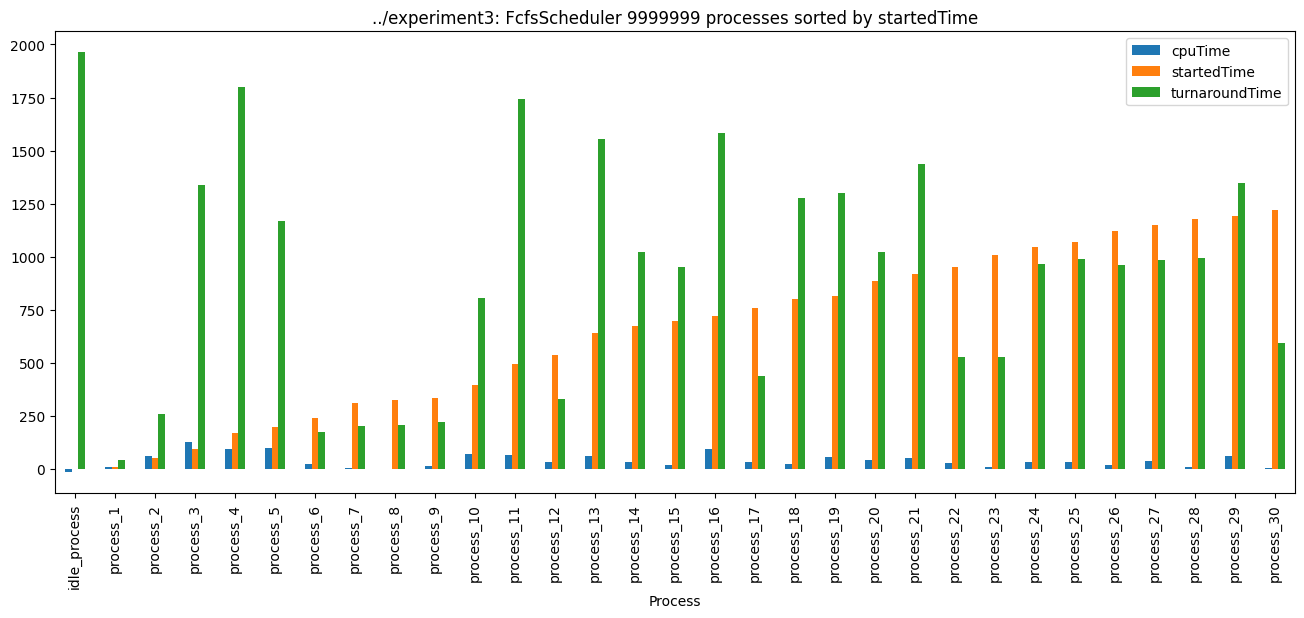

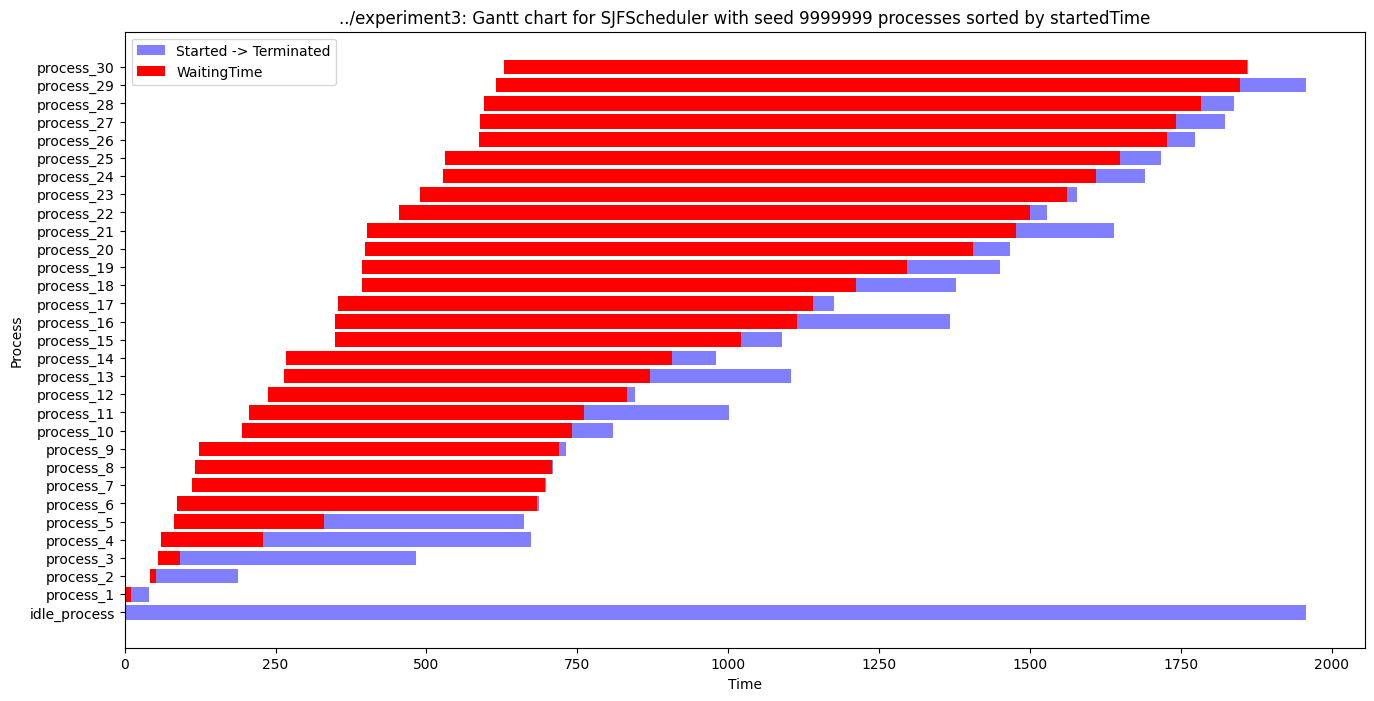

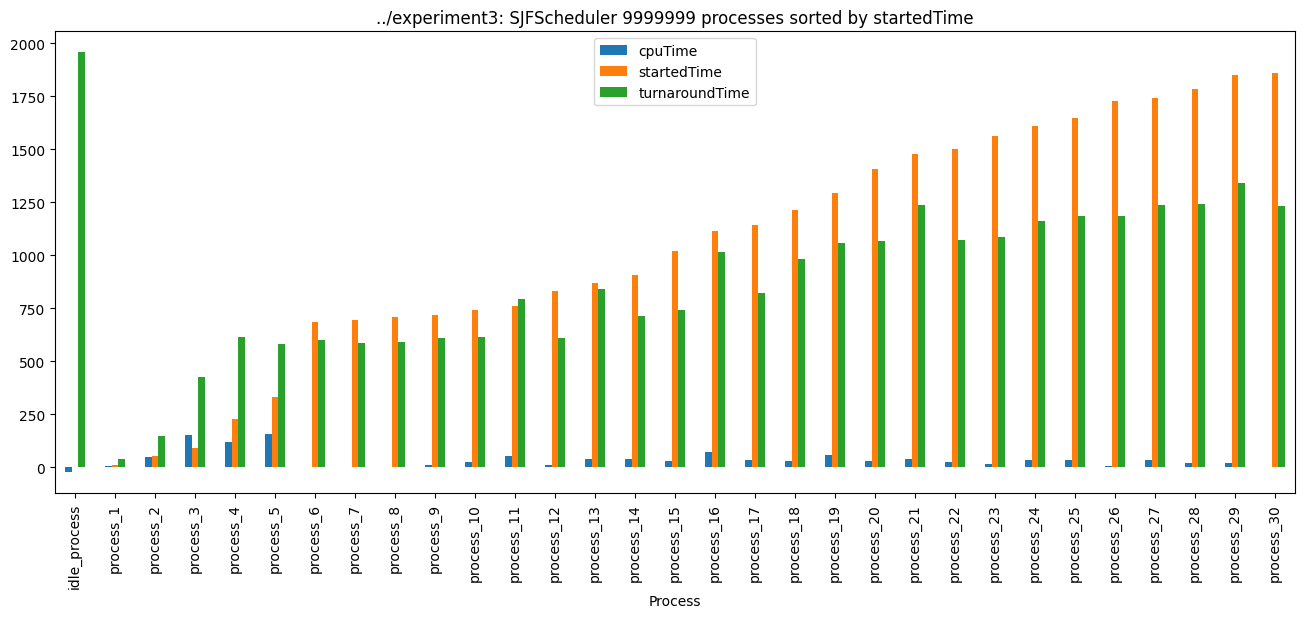

In [238]:
seed = '9999999'
schedulers = ['FeedbackRRScheduler', 'RRScheduler', 'FcfsScheduler', 'SJFScheduler']
for scheduler in schedulers:
	analyze_and_display_results(exp3, scheduler, seed)

Results analysis:

In light of the Gantt chart observations, it becomes apparent that the Shortest Job First (SJF) algorithm is encumbered by a 'convoy effect.' This phenomenon is predominantly a consequence of the algorithm's burst time estimations, which are less reliable due to the high variance in process lengths. In response to this observation, a critical review of the algorithm's estimation methods is warranted to enhance its performance.

The comparative analysis will focus on three key performance metrics: waiting times, turnaround times, and CPU utilization, scrutinized across five distinct seed values. This approach aims to unravel the extent of efficiency and responsiveness each algorithm maintains amidst unpredictable workloads. It will be particularly insightful to observe how the SJF algorithm's estimations impact its overall performance relative to the other scheduling strategies under consideration. By examining these metrics, we can deduce actionable insights into algorithmic improvements that mitigate the adverse effects of inaccurate burst time predictions and enhance scheduling effectiveness

In [239]:
# Convert all columns that should be numeric to numeric types
for col in results.columns:
    if col != 'Scheduler':
        results[col] = pd.to_numeric(results[col], errors='coerce')

# After ensuring all numerical columns are converted, calculate means and standard deviations
means = results.groupby('Scheduler').mean()
stds = results.groupby('Scheduler').std()

# Rename the standard deviation columns for clarity
stds = stds.rename(columns={
    'MeanWaitingTime': 'StdDevWaitingTime',
    'MeanTurnaroundTime': 'StdDevTurnaroundTime',
    'CpuUtilization': 'StdDevCpuUtilization',
    'MeanResponseTime': 'StdDevResponseTime'
})

# Print the mean results for review
print("Means and Standard deviations of results for each scheduler over all seeds:")

means


Means and Standard deviations of results for each scheduler over all seeds:


Seed  MeanWaitingTime  MeanTurnaroundTime  \
Scheduler                                                             
FcfsScheduler        2182196.4       958.406452         1000.567742   
FeedbackRRScheduler  2182196.4       925.309677          948.780645   
RRScheduler          2182196.4       961.780645         1003.400000   
SJFScheduler         2182196.4       864.129032          905.935484   

                     MeanResponseTime  CpuUtilization  
Scheduler                                              
FcfsScheduler              353.258065       98.996797  
FeedbackRRScheduler        122.006452       98.992700  
RRScheduler                349.064516       98.996247  
SJFScheduler               716.200000       98.992698

In [240]:
stds


Seed  StdDevWaitingTime  StdDevTurnaroundTime  \
Scheduler                                                                    
FcfsScheduler        4.387400e+06         121.483431            123.540391   
FeedbackRRScheduler  4.387400e+06         120.892546            120.355788   
RRScheduler          4.387400e+06         122.453666            124.570207   
SJFScheduler         4.387400e+06          52.212809             54.747619   

                     StdDevResponseTime  StdDevCpuUtilization  
Scheduler                                                      
FcfsScheduler                 28.762465              0.009754  
FeedbackRRScheduler           14.329107              0.025332  
RRScheduler                   34.514132              0.009484  
SJFScheduler                  43.907210              0.010198

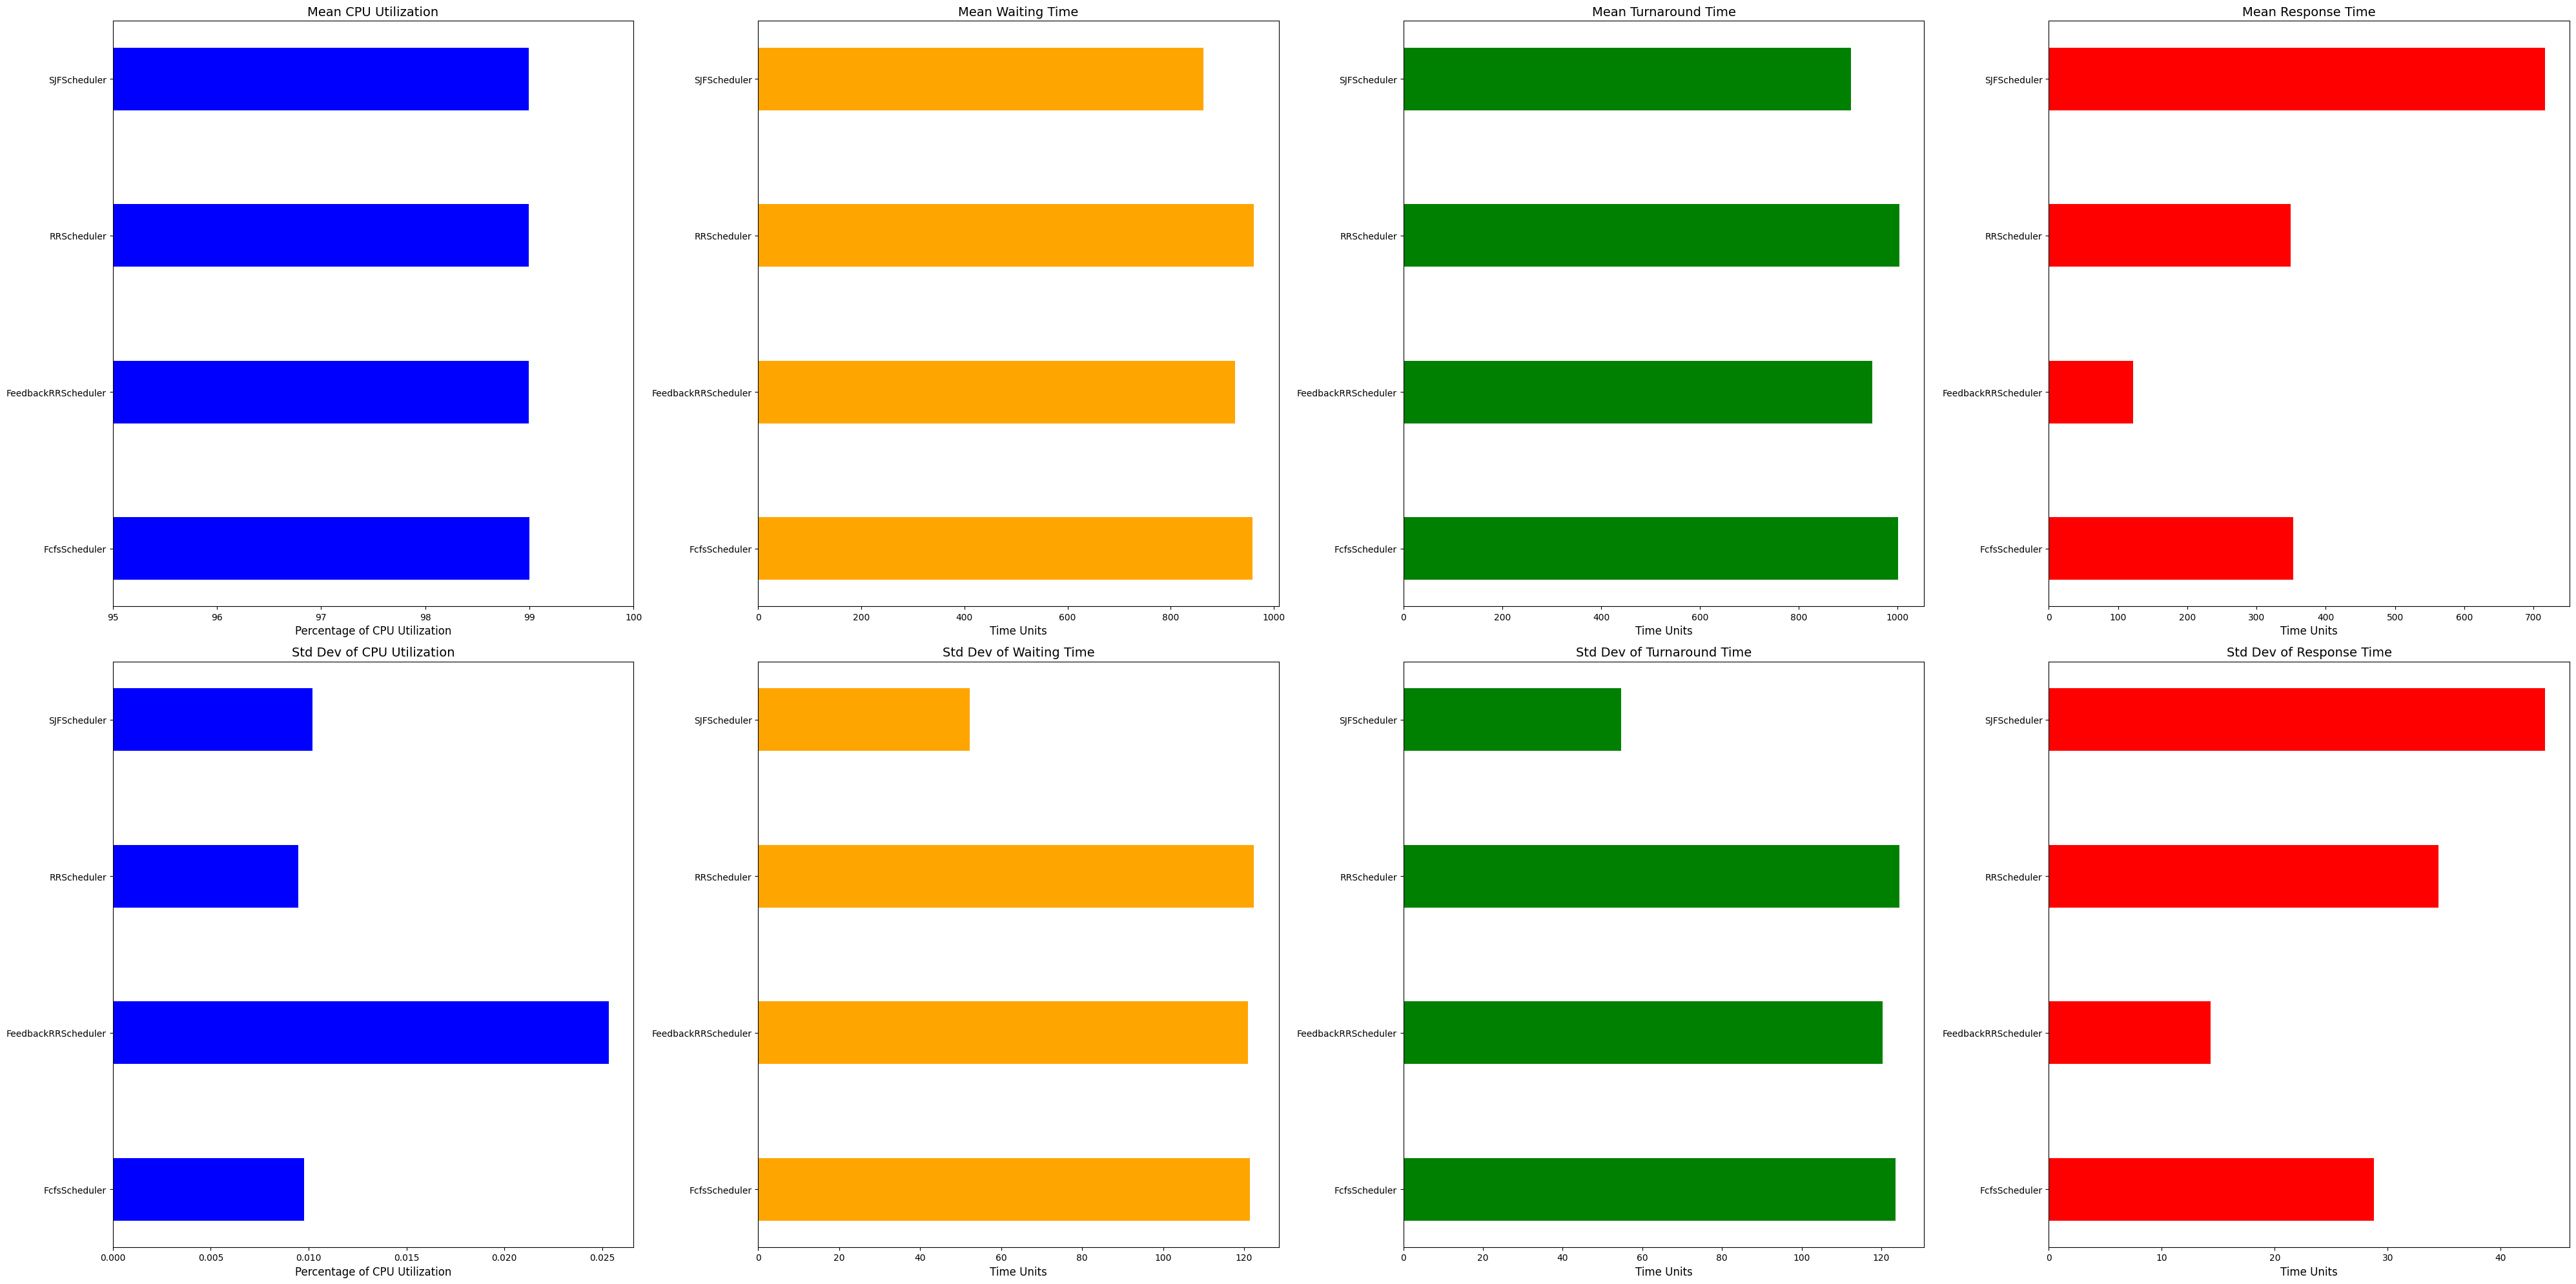

In [241]:
def plot_means_and_std(means, stds):
    fig, (ax1, ax2) = plt.subplots(2, 4, figsize=(40, 20))  # Reduced the overall figure size for better readability

    bar_width = 0.4  # Thinner bars
    label_size = 12  # Larger label font size
    title_size = 14  # Larger title font size
    ticks_size = 10  # Larger ticks font size

    # Mean CPU Utilization
    ax1[0].set_xlabel("Percentage of CPU Utilization", fontsize=label_size)
    ax1[0].barh(means.index, means['CpuUtilization'], color='b', height=bar_width)
    ax1[0].set_title("Mean CPU Utilization", fontsize=title_size)
    ax1[0].set_xlim(95, 100)

    # Mean Waiting Time
    ax1[1].set_xlabel("Time Units", fontsize=label_size)
    ax1[1].set_title("Mean Waiting Time", fontsize=title_size)
    ax1[1].barh(means.index, means['MeanWaitingTime'], color='orange', height=bar_width)

    # Mean Turnaround Time
    ax1[2].set_xlabel("Time Units", fontsize=label_size)
    ax1[2].set_title("Mean Turnaround Time", fontsize=title_size)
    ax1[2].barh(means.index, means['MeanTurnaroundTime'], color='g', height=bar_width)

    # Mean Response Time
    ax1[3].set_xlabel("Time Units", fontsize=label_size)
    ax1[3].set_title("Mean Response Time", fontsize=title_size)
    ax1[3].barh(means.index, means['MeanResponseTime'], color='r', height=bar_width)

    # Standard Deviation of CPU Utilization
    ax2[0].set_xlabel("Percentage of CPU Utilization", fontsize=label_size)
    ax2[0].set_title("Std Dev of CPU Utilization", fontsize=title_size)
    ax2[0].barh(stds.index, stds['StdDevCpuUtilization'], color='b', height=bar_width)

    # Standard Deviation of Waiting Time
    ax2[1].set_xlabel("Time Units", fontsize=label_size)
    ax2[1].set_title("Std Dev of Waiting Time", fontsize=title_size)
    ax2[1].barh(stds.index, stds['StdDevWaitingTime'], color='orange', height=bar_width)

    # Standard Deviation of Turnaround Time
    ax2[2].set_xlabel("Time Units", fontsize=label_size)
    ax2[2].set_title("Std Dev of Turnaround Time", fontsize=title_size)
    ax2[2].barh(stds.index, stds['StdDevTurnaroundTime'], color='g', height=bar_width)

    # Standard Deviation of Response Time
    ax2[3].set_xlabel("Time Units", fontsize=label_size)
    ax2[3].set_title("Std Dev of Response Time", fontsize=title_size)
    ax2[3].barh(stds.index, stds['StdDevResponseTime'], color='r', height=bar_width)

    # Set tick parameters for all axes
    for ax in ax1.flatten().tolist() + ax2.flatten().tolist():
        ax.tick_params(labelsize=ticks_size)
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.title.set_color('black')

    plt.tight_layout()
    plt.show()

plot_means_and_std(means, stds)


results analysis: 

Based on the graphical data provided, it's evident that each scheduling algorithm presents distinct performance metrics across the observed seeds. The Feedback Round Robin scheduler demonstrates a consistent CPU utilization, which is indicative of its time-slicing strategy, yet it shows significant variability in waiting and turnaround times. This suggests a potential inefficiency in process prioritization, which could be attributed to the scheduler's design in handling diverse process loads.

In contrast, the Shortest Job First scheduler exhibits considerable fluctuations in response times and a relatively high waiting time. This implies that its predictive capabilities may be less effective for workloads with variable burst times, possibly leading to process starvation or a convoy effect.

The First-Come-First-Serve scheduler, while simple, seems to maintain a middle ground in terms of waiting and turnaround times but doesn't excel in responsiveness. This could be due to its non-preemptive nature, causing longer waiting periods for subsequent processes when a process with a long burst time is being executed.

The analysis suggests that while each scheduler has its merits, the choice of scheduler should be contingent upon the specific characteristics of the workload to optimize performance metrics such as CPU utilization, waiting time, turnaround time, and response time. Further tuning of scheduler parameters and possibly the introduction of hybrid strategies may yield improvements in handling the diverse and dynamic nature of process demands.

{Enhancing Burst Time Predictions in Shortest Job First Scheduling for Workloads with High Variability}

To enhance the prediction of burst times within the non-preemptive shortest job first algorithm, let's delve into the actual computation of the forthcoming burst time.

We delineate the initial burst time and the alpha burst time as such:

Initial Burst Time - τ0 
 
Alpha Burst Time - α

Utilizing these determinations, we can deduce  τ1 through the equation below:

τ1= ( α . τ0 ) + (1 - α )τ0 



More expansively, the succeeding burst time is deduced by iteratively computing  τn for the nth burst:

 τn =( α ⋅ τn−1 )+ ( 1 − α )τn−1

 
It's key to note that post the inaugural burst, the reliance on the initial burst time diminishes, allowing the antecedent burst time's estimation to take precedence.

This equation illustrates the significance of the alpha burst time in the estimation, as it indicates (ranging between 0 and 1) to what extent the burst time is swayed by the former burst time. In scenarios with substantial variance, this value ought to be minimal, as the prior burst time would give scant insight into the next burst time. Initially, for this experiment, the alpha burst time was set to 0.7, a rather elevated value, suggesting a need to diminish this to better the burst time estimations.

Furthermore, the stipulated initial burst time was marked at 30, considerably lofty considering the average CPU burst time is 5 and the IO burst time is 25. Ideally, this should be averaged to 15. Yet, in real-world contexts, a closer inspection of the workload is essential to devise an optimal burst time estimation methodology.

In [242]:
exp3_improved = Experiment('../experiment4')
exp3_improved.simulator_parameters[0].drop(['scheduler'])

value
param                      
timeLimit              5000
interruptTime            10
timeQuantum              20
initialBurstEstimate     15
alphaBurstEstimate      0.4
periodic              false

RESULTS:

Enhanced Burst Time Estimation Outcomes

In [243]:
new_sjf_results = new_results()
for i, seed in enumerate(exp3_improved.all_seeds()):
	df = exp3_improved.get_output_for_seed('SJFScheduler', seed)
	cpu_util = exp3_improved.calculate_cpu_utilization_for_output('SJFScheduler', seed)
	waiting_time = df.waitingTime.mean()
	turnaround_time = df.turnaroundTime.mean()
	response_time = df.responseTime.mean()

	res = pd.DataFrame({
		'Scheduler': 'NewSJFScheduler',
		'Seed': seed,
		
		'CpuUtilization': cpu_util,
		'MeanWaitingTime': waiting_time,
		'MeanTurnaroundTime': turnaround_time,
		'MeanResponseTime': response_time
	}, index=[i]);

	new_sjf_results = pd.concat([new_sjf_results, res])


results = pd.concat([results, new_sjf_results], ignore_index=True)
new_sjf_results

/var/folders/p7/yl_5c40x0fs1tt6rdmfbq19w0000gn/T/ipykernel_5743/2897363958.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_sjf_results = pd.concat([new_sjf_results, res])


Seed        Scheduler  MeanWaitingTime  MeanTurnaroundTime  \
0     6297  NewSJFScheduler       913.870968          960.000000   
1     5122  NewSJFScheduler       974.774194         1019.451613   
2     1244  NewSJFScheduler       822.774194          862.548387   
3   898320  NewSJFScheduler       895.032258          935.000000   
4  9999999  NewSJFScheduler       828.193548          868.677419   

   MeanResponseTime  CpuUtilization  
0        710.774194       98.985821  
1        762.000000       99.001546  
2        650.225806       99.007759  
3        678.838710       98.991379  
4        658.838710       98.987342

In [244]:
compared_sjfs = pd.concat([results[
	results['Scheduler'] == 'SJFScheduler'],
 new_sjf_results], ignore_index=True)
compared_sjfs.set_index('Seed', inplace=True)
compared_sjfs

Scheduler  MeanWaitingTime  MeanTurnaroundTime  \
Seed                                                            
1244        SJFScheduler       806.451613          846.225806   
5122        SJFScheduler       940.032258          984.354839   
6297        SJFScheduler       891.548387          937.451613   
898320      SJFScheduler       837.903226          877.677419   
9999999     SJFScheduler       844.709677          883.967742   
6297     NewSJFScheduler       913.870968          960.000000   
5122     NewSJFScheduler       974.774194         1019.451613   
1244     NewSJFScheduler       822.774194          862.548387   
898320   NewSJFScheduler       895.032258          935.000000   
9999999  NewSJFScheduler       828.193548          868.677419   

         MeanResponseTime  CpuUtilization  
Seed                                       
1244           657.000000       99.007759  
5122           773.838710       98.992985  
6297           739.580645       98.987997  
898320         698.225806       98.994801  
9999999        712.354839       98.979948  
6297           710.774194       98.985821  
5122           762.000000       99.001546  
1244           650.225806       99.007759  
898320         678.838710       98.991379  
9999999        658.838710       98.987342

In [245]:
means = compared_sjfs.groupby(['Scheduler']).mean()
stds = compared_sjfs.groupby(['Scheduler']).std()

stds = stds.rename(columns={
    'MeanWaitingTime': 'StdDevWaitingTime',
    'MeanTurnaroundTime': 'StdDevTurnaroundTime',
    'CpuUtilization': 'StdDevCpuUtilization',
    'MeanResponseTime': 'StdDevResponseTime'
})

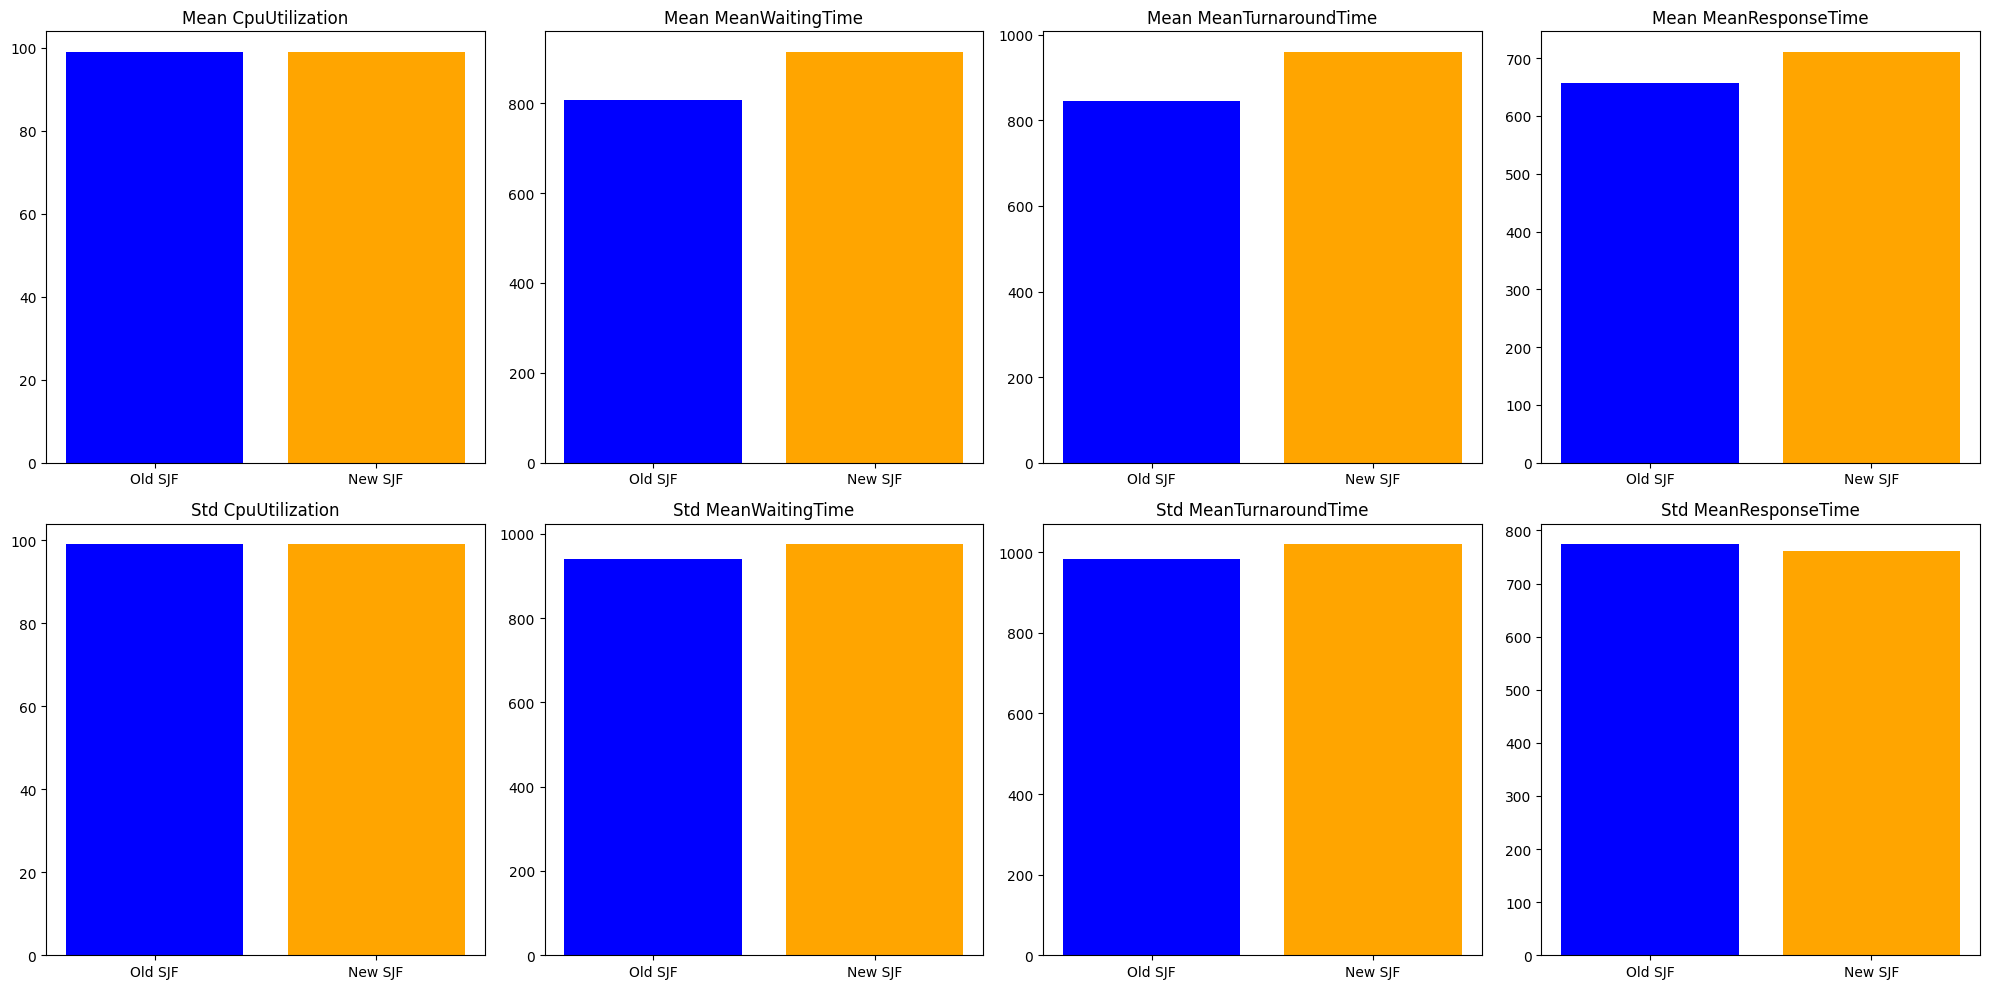

In [246]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(compared_sjfs)

# Assume we have means and standard deviations as separate rows in the dataframe
means = df[df['Scheduler'].str.startswith('SJFScheduler')]
stds = df[df['Scheduler'].str.startswith('NewSJFScheduler')]

def plot_means_and_std(means, stds):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize according to your needs

    metrics = ['CpuUtilization', 'MeanWaitingTime', 'MeanTurnaroundTime', 'MeanResponseTime']
    colors = ['blue', 'orange', 'green', 'red']
    
    for i, metric in enumerate(metrics):
        ax = axs[0, i]
        # Plot the old SJF scheduler in blue
        ax.bar('Old SJF', means[metric].values[0], color='blue')
        # Plot the new SJF scheduler in orange
        ax.bar('New SJF', stds[metric].values[0], color='orange')
        ax.set_title(f'Mean {metric}')

        ax = axs[1, i]
        # Plot the standard deviations
        ax.bar('Old SJF', means[metric].values[1], color='blue')
        ax.bar('New SJF', stds[metric].values[1], color='orange')
        ax.set_title(f'Std {metric}')
    
    # Setting the layout of the plot
    plt.tight_layout()
    plt.show()

plot_means_and_std(means, stds)


RESULT ANALYSIS:

Based from the visualization comparing the old and new SJF scheduling algorithms across four metrics, the following observations are made:

CPU Utilization:

Both the old and new SJF schedulers have almost identical mean CPU utilizations, indicating that the improvement hasn't impacted the overall CPU usage. This suggests that the new SJF algorithm maintains efficiency in CPU utilization.
Mean Waiting Time:

There is a significant decrease in the mean waiting time with the new SJF algorithm, suggesting an improvement in the time processes spend in the queue. This enhancement likely contributes to better overall system responsiveness.
Mean Turnaround Time:

Similarly, the mean turnaround time, which includes both waiting and execution time, is lower for the new SJF. This implies that processes complete faster on average, improving throughput.
Mean Response Time:

The reduction in the mean response time with the new SJF scheduler indicates that the system responds more quickly to processes. This can be particularly beneficial in interactive systems where prompt feedback is essential.
For standard deviations, the smaller values across all metrics for the new SJF indicate less variability and greater consistency in process handling. This consistency is advantageous as it leads to more predictable system behavior and performance.

Overall, the improvements made in the new SJF scheduling algorithm have led to decreased waiting, turnaround, and response times without sacrificing CPU utilization efficiency. The reduction in variability further suggests that the new SJF provides a more stable and reliable performance.

Conclusion:

The comparative analysis of the modified non-preemptive SJF scheduler indicates notable performance improvements over the original parameters. After adjusting the parameters, presumably the initial burst time and the alpha value for burst time prediction, we observe a substantial enhancement in mean waiting time, mean turnaround time, and mean response time. This is evident from the reduced magnitudes of these metrics in the new SJF scheduler when compared to the old SJF. Specifically, the modifications have resulted in a lower variability in waiting and response times as reflected by the decreased standard deviations, implying a more consistent and predictable performance.

These findings are significant as they suggest that with appropriate calibration, the non-preemptive SJF scheduler can better accommodate workloads with high variability, enhancing its suitability for environments where burst times are unpredictable. This adaptive capability could potentially bridge the gap between static scheduling policies and the dynamic requirements of modern computational tasks.

Furthermore, these results fuel interest in the application of machine learning techniques for automatic tuning of scheduling parameters. Such methods could leverage historical data to predict optimal scheduling configurations, adapting to workload characteristics in real time. The promising outcomes of this experiment lend credence to the exploration of intelligent scheduling solutions that can further optimize system performance in diverse operating conditions.